In [2]:
###Loading Initial libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')


In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset initial observations**

In [4]:
LS=pd.read_csv('/content/drive/My Drive/GL Capstone Project/Main Works/Lead Scoring.csv')
LS.head()

Prospect ID  ...  Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  ...               Modified
1  2a272436-5132-4136-86fa-dcc88c88f482  ...           Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  ...           Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  ...               Modified
4  3256f628-e534-4826-9d63-4a8b88782852  ...               Modified

[5 rows x 37 columns]

In [5]:
print("Number of Rows in Dataset=",LS.shape[0],"and number of Columns in dataset=",LS.shape[1])

Number of Rows in Dataset= 9240 and number of Columns in dataset= 37


# #Replacing the space in column names by '_' and converting to lower case

In [6]:

LS.columns = LS.columns.str.lower().str.strip().str.replace(' ','_')
LS.rename(columns = {'totalvisits':'total_visits'},inplace = True)
LS.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

#### Datatypes

In [7]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   prospect_id                                    9240 non-null   object 
 1   lead_number                                    9240 non-null   int64  
 2   lead_origin                                    9240 non-null   object 
 3   lead_source                                    9204 non-null   object 
 4   do_not_email                                   9240 non-null   object 
 5   do_not_call                                    9240 non-null   object 
 6   converted                                      9240 non-null   int64  
 7   total_visits                                   9103 non-null   float64
 8   total_time_spent_on_website                    9240 non-null   int64  
 9   page_views_per_visit                           9103 

In [8]:

Cat=[]
Num=[]
for i in LS.columns:
    if LS[i].dtype=='float64' or LS[i].dtype=='int64':
        Num.append(i)
    else :
        Cat.append(i)

In [9]:
print("The Numerical features in the dataset are ",Num)

The Numerical features in the dataset are  ['lead_number', 'converted', 'total_visits', 'total_time_spent_on_website', 'page_views_per_visit', 'asymmetrique_activity_score', 'asymmetrique_profile_score']


In [10]:
print("The categorical features in the dataset are ",Cat)

The categorical features in the dataset are  ['prospect_id', 'lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'last_activity', 'country', 'specialization', 'how_did_you_hear_about_x_education', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 'tags', 'lead_quality', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'lead_profile', 'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity']


# **describe() - Five point summary and inferences**

Calculating Five-number summary for numerical columns:

In [11]:
LS.describe()

lead_number  ...  asymmetrique_profile_score
count    9240.000000  ...                 5022.000000
mean   617188.435606  ...                   16.344883
std     23405.995698  ...                    1.811395
min    579533.000000  ...                   11.000000
25%    596484.500000  ...                   15.000000
50%    615479.000000  ...                   16.000000
75%    637387.250000  ...                   18.000000
max    660737.000000  ...                   20.000000

[8 rows x 7 columns]

The Inferences from the 5 point summary are-

1. **Lead Number** is a  unique Id generated for each customer. It will not add any value to the model as the statistical summary will not add  any insight or pattern .

2. **Converted**- This is our target variable with only 0 and 1 as values.

3. **Total Visits**- The distribution is right skewed because interested    individuals tend to visit the website more number of times.
As per the values, 1st quartile(1 visit per person) of the visits come from people  who tend to visit the site once and never come back. The second and third quartiles(1-5 visit per person) of the visits come from customers who want to gain an idea about Z education.Lastly, the people whose number of  total visits lie in the last quartile are the most engaged customers, with upto a max of 251 visits to the website.
Here the highest visits are outliers for the feature.

4. **Total Time Spent on Website**- The distribution is right skewed because interested individuals tend to visit the website for longer duration of time.
As per the values, the low 25 percentile engagement of the website comes from people  who tend to spend less time on the website. The second and third quartiles define an average of the engagement, 487 minutes. This comes from customers who want to gain an idea about X education. Lastly, the people whose time spent on the website lies in the last quartile are the most engaged customers.
Here there are no outliers above IQR region.

5. **Page Views Per Visit**-The distribution is right skewed because interested individuals tend to the visit more number of  pages on  the website.
As per the values,25%(1 visit) of the page visits come  from people  who tend to visit only the landing page. 50-75 %(2-3 visit) of the page  visits come from customers who search for few courses but do not engage with X education. Lastly, the people whose number of page visits lie in the last quartile are the most engaged customers.
Here the highest page visits are outliers for the feature.



6. **Asymmetrique Activity Score** and 	**Asymmetrique Profile Score** are discrete values.Hence statistical summary will not add any insight. However, we will perform Univariate /Bivariate Analysis with other 'asymmetrique' features.


# **Lead Number and Prospect ID to be dropped.**
It will not be of use for any insight, hence we will drop them

In [12]:

print(LS['lead_number'].nunique())
print(LS['prospect_id'].nunique())

LS=LS.drop(['lead_number'],axis=1)
LS=LS.drop(['prospect_id'],axis=1)

9240
9240


# Grouping for categorical features:

In [13]:
LS['lead_origin']=LS['lead_origin'].replace(['Lead Import','Quick Add Form'],'others')
LS['lead_source']=LS['lead_source'].replace(['NC_EDM','Pay per Click Ads','testone','youtubechannel','youtubechannel','welearnblog_Home','blog','WeLearn','Welingak Website','WeLearn','Live Chat','Referral Sites','Facebook','bing','Click2call','Social Media','Press_Release'],'others')
LS['last_activity']=LS['last_activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Received','Email Marked Spam','View in browser link Clicked','Approached upfront','Had a Phone Conversation','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed'],'others')

LS['country']=LS['country'].replace(['Vietnam','Indonesia','Sri Lanka','Switzerland','Russia','Malaysia','Denmark','Tanzania','Liberia','Kenya','Italy','China','Bangladesh','Asia/Pacific Region','Belgium','Netherlands','Uganda','Philippines','Ghana','Sweden','Canada','South Africa','Germany','Nigeria','Kuwait','unknown','Oman','France','Bahrain','Hong Kong','Qatar','Australia','United Kingdom','Saudi Arabia','United States','United Arab Emirates','Singapore'],'Non Indian')

LS['specialization']=LS['specialization'].replace(['Services Excellence','E-Business ','Rural and Agribusiness','Retail Management','E-COMMERCE','Hospitality Management','Travel and Tourism','Media and Advertising','International Business','Healthcare Management'],'others')


LS['how_did_you_hear_about_x_education']=LS['how_did_you_hear_about_x_education'].replace(['Email','SMS','Other','Multiple Sources' ,'Advertisements','Social Media' ],'others')

LS['what_is_your_current_occupation']=LS['what_is_your_current_occupation'].replace(['Other','Businessman','Housewife'],'others')

LS['what_matters_most_to_you_in_choosing_a_course']=LS['what_matters_most_to_you_in_choosing_a_course'].replace(['Flexibility & Convenience','Other'],'Flexibility & Convenience')

LS['tags']=LS['tags'].replace(['Recognition issue (DEC approval)','Shall take in the next coming month','University not recognized','Lateral student','Interested in Next batch','In confusion whether part time or DLP','Want to take admission but has financial problems','Still Thinking','Lost to Others','in touch with EINS','number not provided','opp hangup','wrong number given','invalid number','Diploma holder (Not Eligible)','Graduation in progress','Interested  in full time MBA','Not doing further education','Closed by Horizzon','switched off','Busy','Lost to EINS'],'others')

LS['lead_quality'] = LS['lead_quality'].replace(np.nan, 'Not Sure')

LS['lead_profile']=LS['lead_profile'].replace(['Student of SomeSchool','Lateral Student','Dual Specialization Student'],'others')
LS['last_notable_activity']=LS['last_notable_activity'].replace(['Email Marked Spam','Email Received','Approached upfront' ,'Form Submitted on Website' ,'Resubscribed to emails',   'View in browser link Clicked'],'others')


In [14]:
LS['lead_origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
others                       56
Name: lead_origin, dtype: int64

# **Null Value Analysis**



In [15]:
Null_Count=LS.isnull().sum()
Null_Count

lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
total_visits                                      137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                   

Although there are many columns with no null values,some of the columns do have high number of Null values present.
Hence here treatment have to be done.

In [16]:
Null_yes=[]
for i in LS.columns:
      if LS[i].isnull().sum()>0:
            print(i," ",LS[i].dtype," ",((LS[i].isnull().sum())/(len(LS[i])))*100)
            Null_yes.append(i)

lead_source   object   0.38961038961038963
total_visits   float64   1.4826839826839828
page_views_per_visit   float64   1.4826839826839828
last_activity   object   1.1147186147186148
country   object   26.634199134199132
specialization   object   15.562770562770561
how_did_you_hear_about_x_education   object   23.885281385281385
what_is_your_current_occupation   object   29.11255411255411
what_matters_most_to_you_in_choosing_a_course   object   29.318181818181817
tags   object   36.28787878787879
lead_profile   object   29.318181818181817
city   object   15.367965367965366
asymmetrique_activity_index   object   45.64935064935065
asymmetrique_profile_index   object   45.64935064935065
asymmetrique_activity_score   float64   45.64935064935065
asymmetrique_profile_score   float64   45.64935064935065


The above output shows the percentage of Null values present in the features  along with its Datatype

In [17]:
Null_values=[]
for i in Null_Count.index:
  if i in Null_Count:
    Null_values.append(LS[i].isnull().sum())

In [18]:
df_Null=pd.DataFrame(Null_values,index=Null_Count,columns=['Nulls'])
df_Null.head(2)

Nulls
0       0
36     36

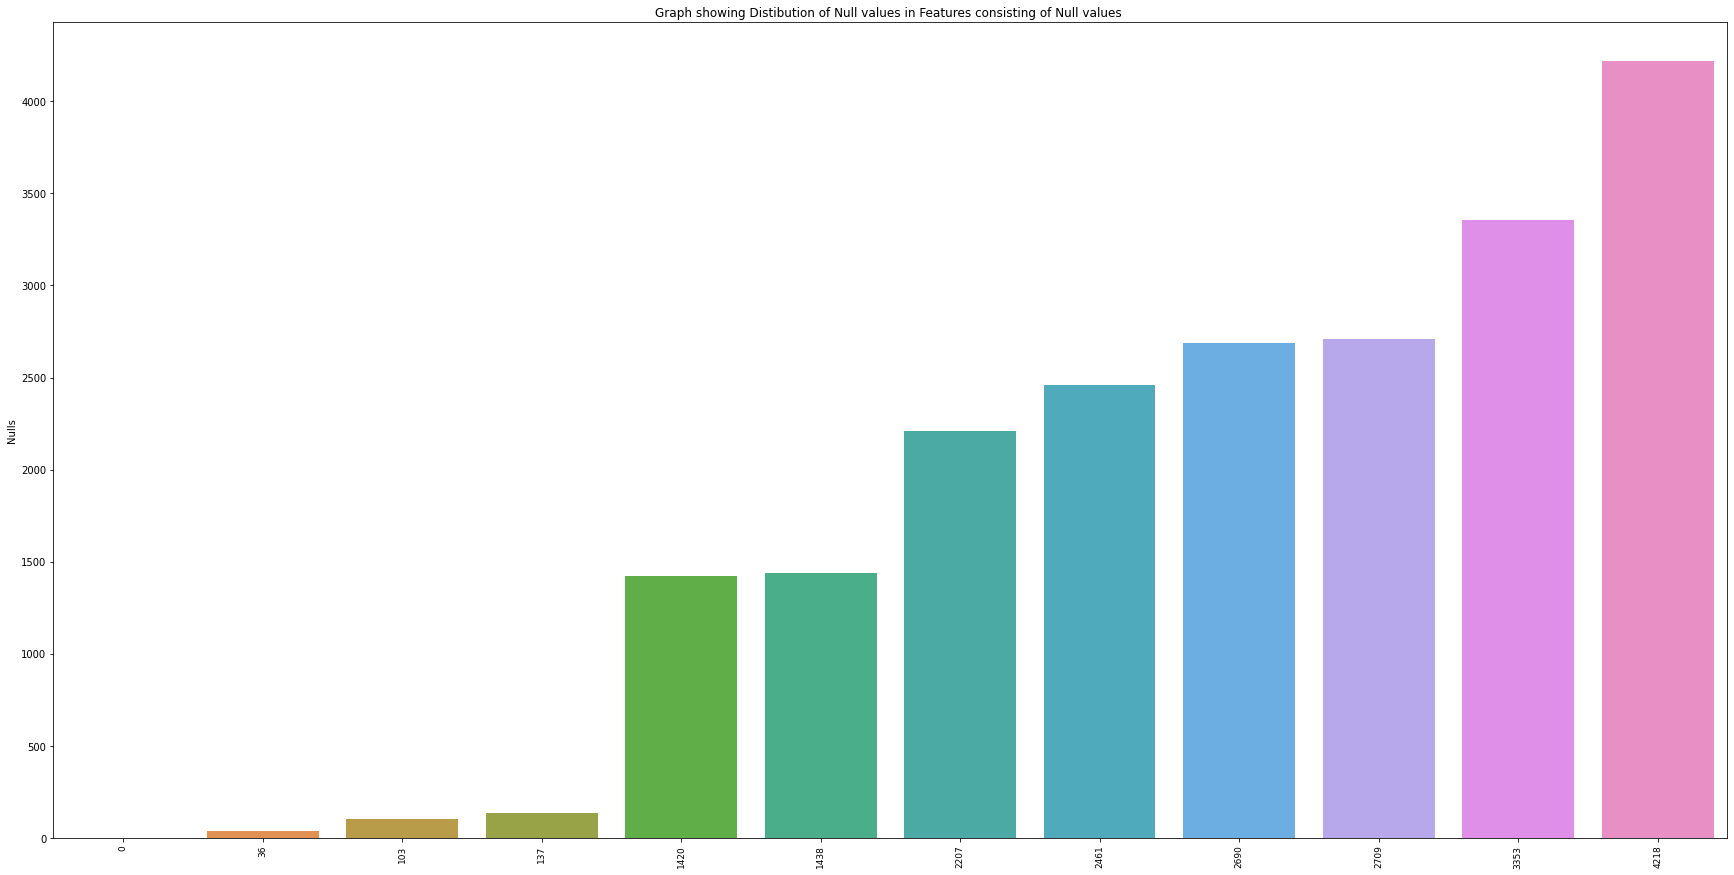

In [19]:
plt.figure(figsize=(30,15))
sns.barplot(y=df_Null['Nulls'],x=df_Null.index)
plt.title('Graph showing Distibution of Null values in Features consisting of Null values ')
plt.xticks(rotation =90,fontsize =9)
plt.show()

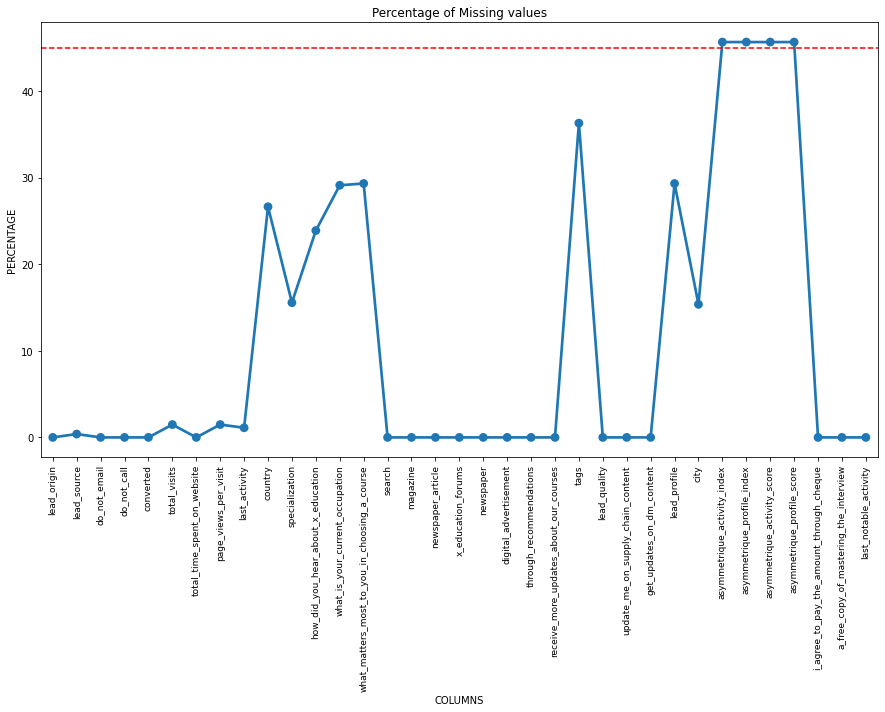

In [20]:
fig = plt.figure(figsize=(15,8))
null_lead = ((LS.isnull().sum())*100/LS.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(45, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

# **Null Value Treatment**



In [21]:
LS['lead_source'].describe()

count       9204
unique         7
top       Google
freq        2868
Name: lead_source, dtype: object

In [22]:
LS['country'].describe()

count      6779
unique        2
top       India
freq       6492
Name: country, dtype: object

In [23]:
LS['lead_origin'].value_counts()/len(LS['lead_origin'])*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
others                      0.606061
Name: lead_origin, dtype: float64

In [24]:
LS['city'].value_counts()/len(LS['city'])*100 

Mumbai                         34.870130
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: city, dtype: float64

------------------------------------------------------------

* Plot each variables wrt cat and num attributes.
* Deciding on which imputation to go about mean or mode.

* Plot the variable as is
* Then impute with mean and mode and plot again



In [25]:
LS.isna().sum()

lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
total_visits                                      137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                   

## Lead Source

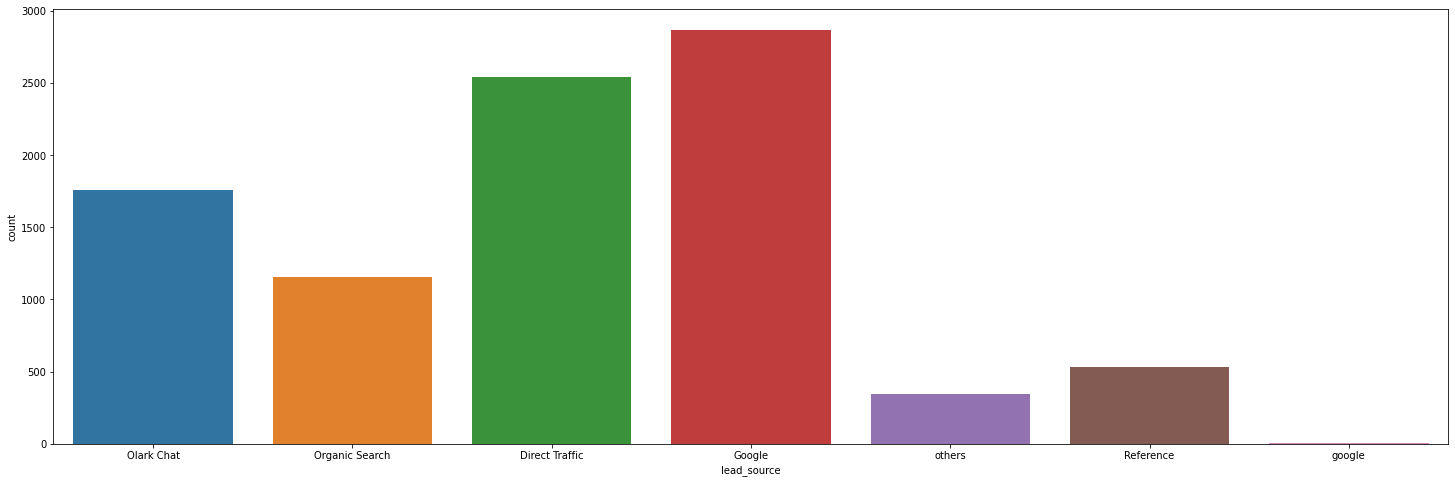

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
others             345
google               5
Name: lead_source, dtype: int64

In [26]:
plt.figure(figsize=(25,8))
sns.countplot(LS['lead_source'])
plt.show()

LS['lead_source'].value_counts()


Lead Source has 0.389 % of missing values and Google is the highest Lead Source generator. Hence we will be replacing missing values in Lead Source with Mode.

## **TotalVisits**

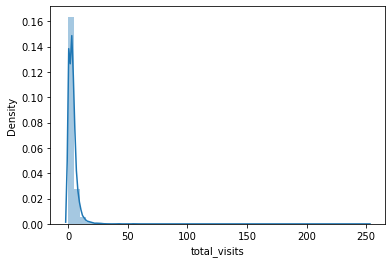

In [27]:
sns.distplot(LS['total_visits'])
plt.show()


From the distribution plot of Total Visits we see that the data is Right Skewed and if we replace it with mean it would become more Skewed.Hence,we replace it with Median.

## Page Views Per Visit

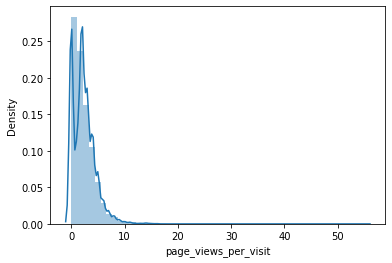

In [28]:
sns.distplot(LS['page_views_per_visit'])
plt.show()


From the distribution plot of Total Visits we see that the data is Right Skewed and if we replace it with mean it would become more Skewed.Hence,we replace it with Median.

## **Last Activity**

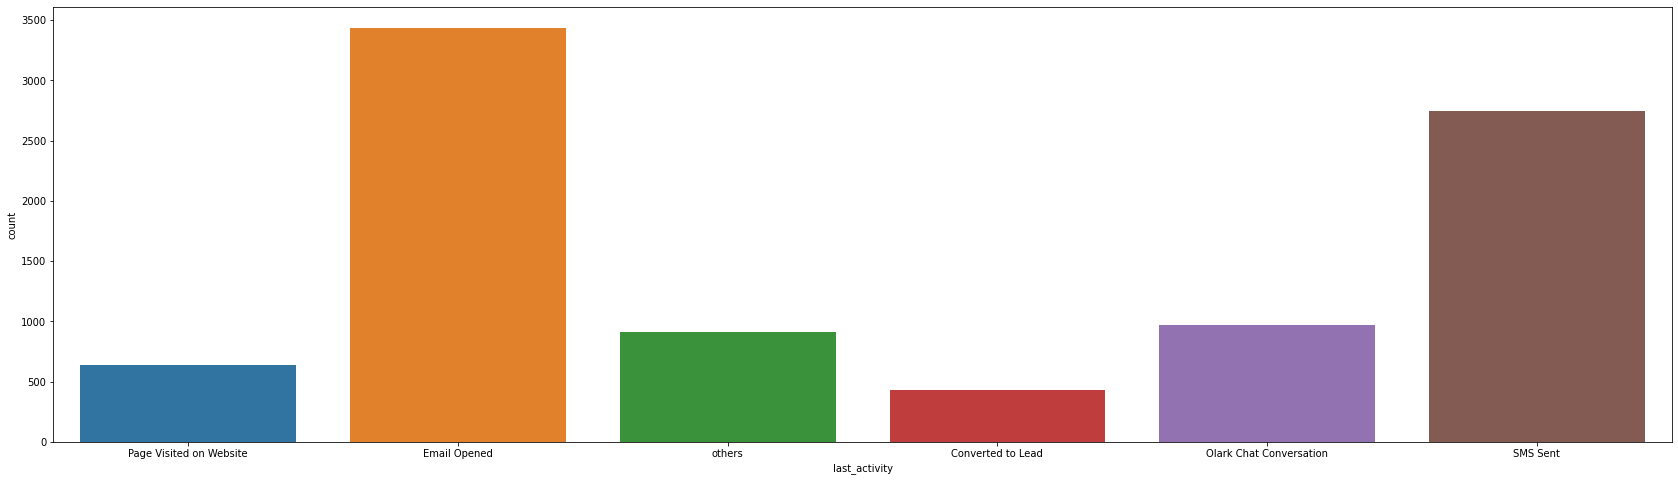

In [29]:
plt.figure(figsize=(29,8))
sns.countplot(LS['last_activity'])
plt.show()                                 


Last Activity has 1.114% of missing values and Email Opened is most highest Last Activity. Hence,we will be replacing missing values in Last Activity with Mode.

## **Country**

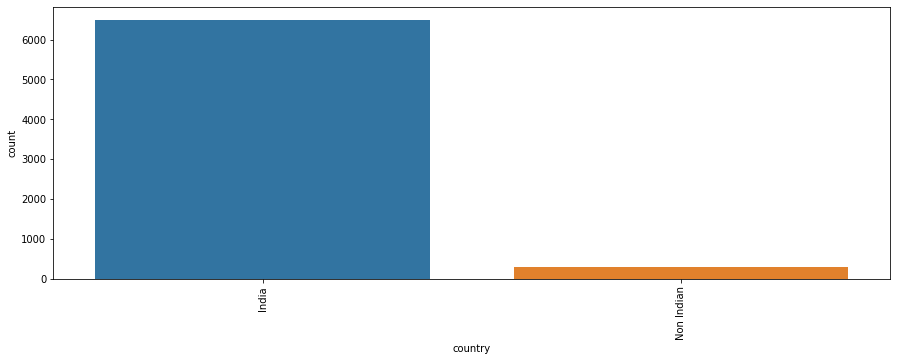

In [30]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS.country)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


Country has 26.63% of missing values and most of them are India, replacing it with Mode or with bfill method,it doesn't make much difference in the distribution . Hence, we replace it with Back Fill.

## **Specialization**

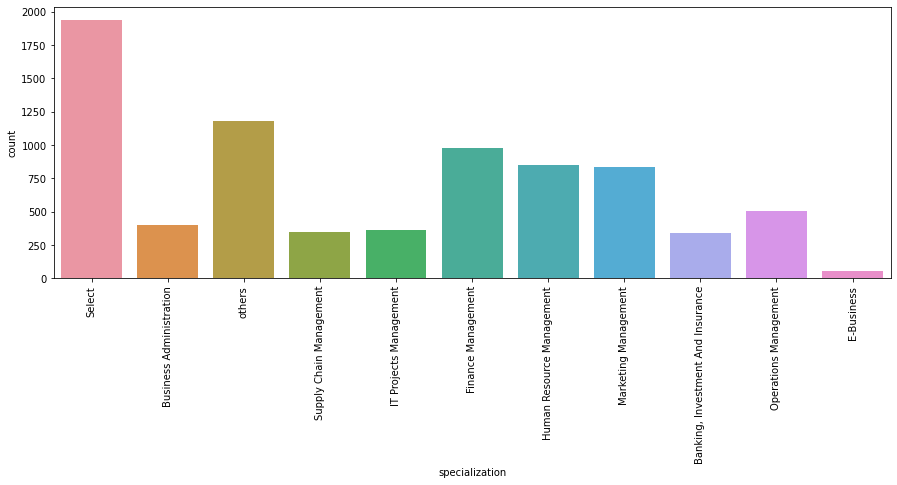

In [31]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS.specialization)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


For this column,we can see mostly values goes to select and we will be assuming select as nan value and replacing with mode is not a good idea. So we will be using method to fill null values.

##  **How did you hear about X Education**

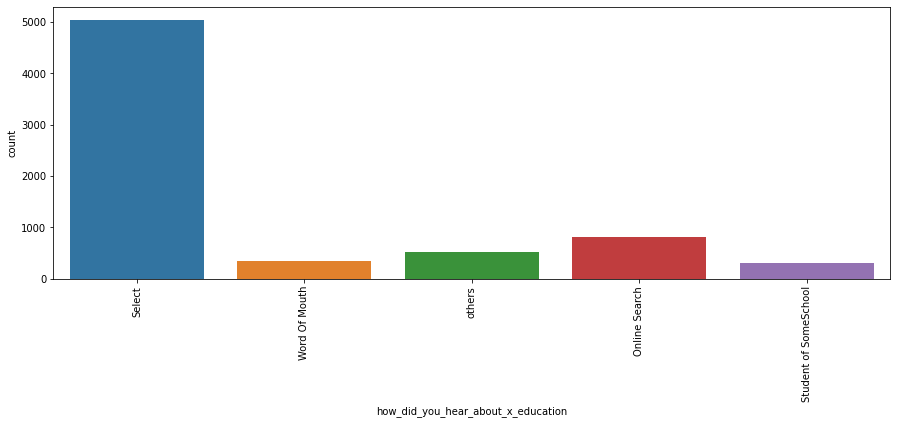

In [32]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS['how_did_you_hear_about_x_education'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


We can see mostly values goes to select and we will be assuming select as nan value and replacing with method is not a good idea because it doesn't fill all the null values. So we will be using mode to fill null values.

## **What is your current occupation**


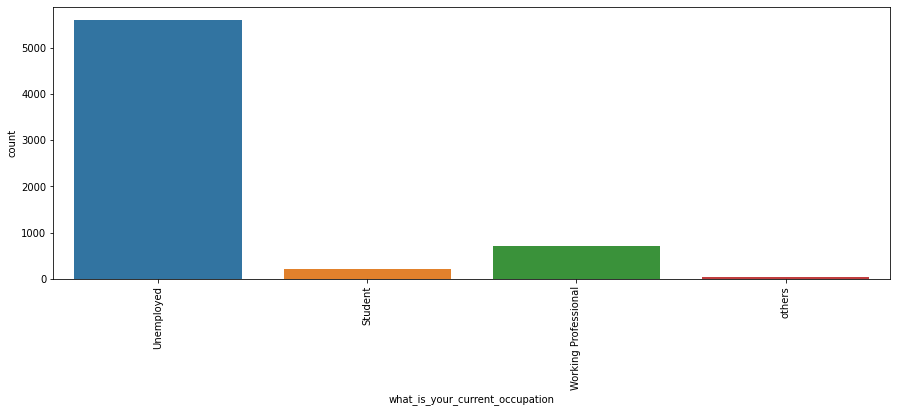

In [33]:

plt.figure(figsize=(15,5))
s1=sns.countplot(LS['what_is_your_current_occupation'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


Replacing with mode is not a good idea. So we will be using method to fill null values.

## **What matters most to you in choosing a course**

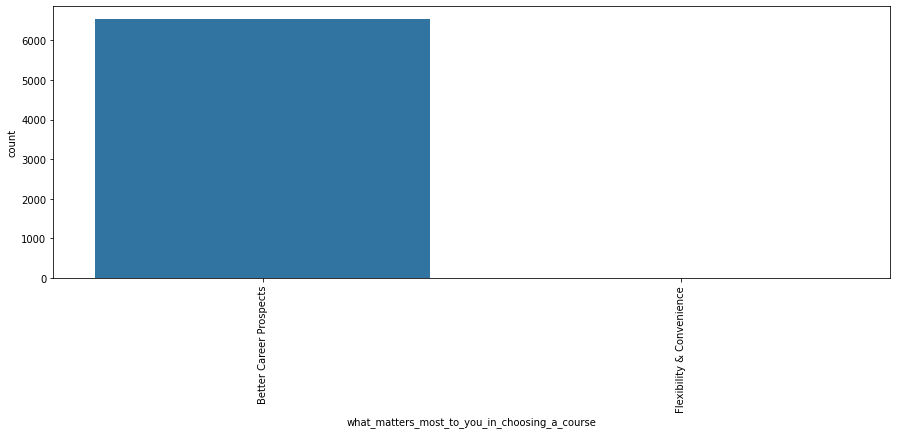

In [34]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS['what_matters_most_to_you_in_choosing_a_course'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()



Here 29.3% are missing values and replacing with mode is not a good idea because the data will become more skewed. So we will be using method to fill null values.

## **Tags:**

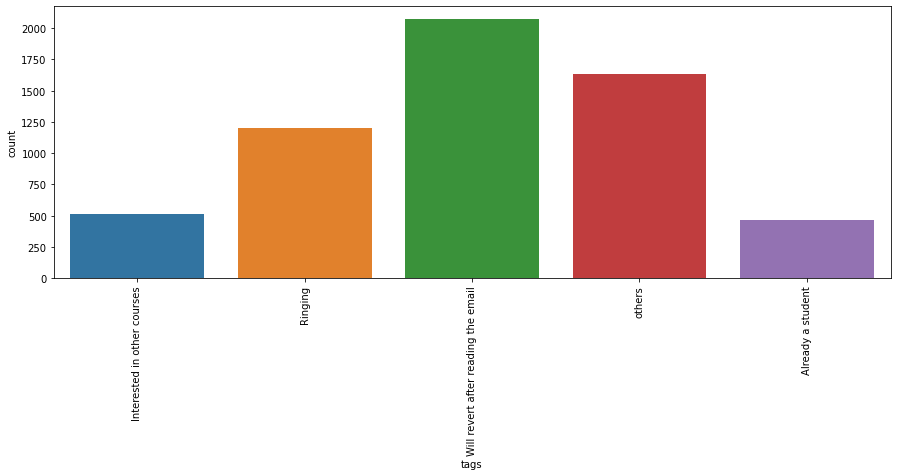

0.19013935759354045

In [35]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS['tags'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

LS['tags'].value_counts().skew()


Here 36.28% are missing values and replacing with mode is not a good idea because the data will become more skewed. So we will be using method to fill null values.


## **Lead Quality**

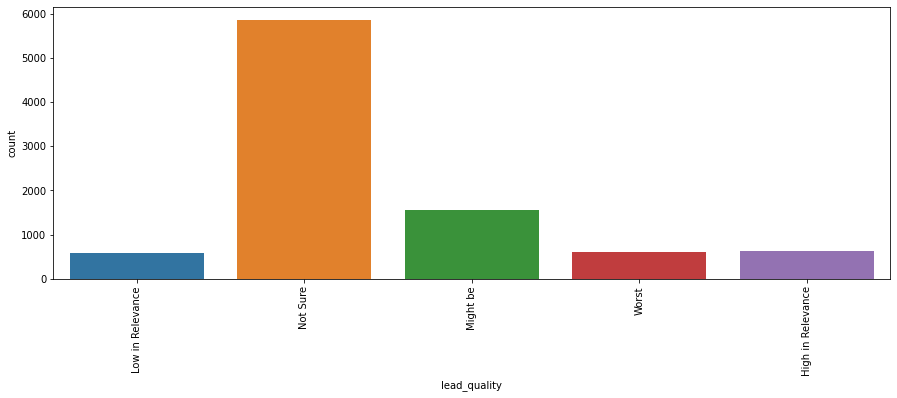

In [36]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS['lead_quality'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


51% are missing values.Lead Quality gives an idea about the conversion of lead.So replacing it with mode is not appropriate.We will be replacing it with 'not sure' only for EDA and in future we will drop this column


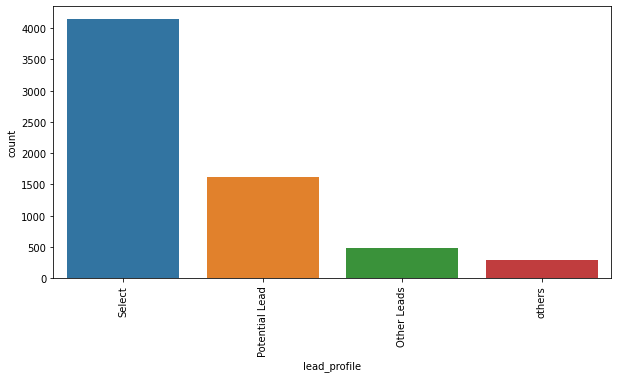

In [37]:
plt.figure(figsize=(10,5))
s1=sns.countplot(LS['lead_profile'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# **Lead Profile**
29% values are missing in Lead Profile.We will be using ffill method to replace null values

## **City**

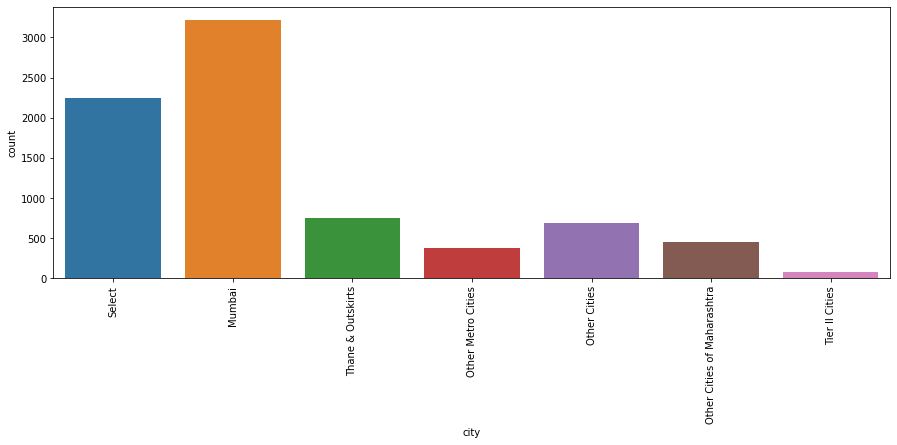

In [38]:

plt.figure(figsize=(15,5))
s1=sns.countplot(LS['city'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


15% are missing values in city column.So we will be using fillna method to replace nan values.First we will be replacing 'select' into 'nan'.As we can't infer anything from select value.

# Replaced 'google' to 'Google' in Lead Score Column

In [39]:
LS['lead_source'].replace({'google':'Google'},inplace=True)
LS = LS.replace('Select', np.nan)

## **Replacing Null Values**

 **Lead source:**
1.	Where lead_origin = lead add form update lead_source as ‘reference’ for null values (33 rows). Mode value with 534 value counts of referencs labels
2.	Where lead_origin = others we are going to update it with ‘others’ (modal value) (2 rows)
3.	Where lead_origin = Landing page submission lead_source will be imputed with because with lead_origin as LPS of the 4886 rows ‘Direct Traffic’ has value counts of 2433 

In [40]:
for value in list(LS['lead_origin'].unique()):
    if value == 'Lead Add Form':
        LS.loc[(LS.lead_origin == value), 'lead_source'] = 'Reference'
    if value == 'others':
        LS.loc[(LS.lead_origin == value), 'lead_source'] = 'others'
    if value == 'Landing Page Submission':
        LS.loc[(LS.lead_origin == value), 'lead_source'] = 'Direct Traffic'



 **Last Activity**
1.	When lead_origin = Lead Add Form, lead_source = Reference and last_notable activity = Modified we are replacing it with ‘SMS Sent’(modal value)

2.	When lead_origin = others, lead_source = others and last_notable activity = Modified we are replacing it with ‘Email Opened’(modal value)

3.	When lead_origin = others, lead_source = others and last_notable activity = Email Opened we are replacing it with ‘Email Opened’(modal value)

In [41]:
for value in list(LS['lead_origin'].unique()):
    if value == 'Lead Add Form':
        LS.loc[(LS.lead_origin == value) & (LS.lead_source=='Reference') & (LS.last_notable_activity=='Modified') , 'last_activity'] = 'SMS Sent'
    if value == 'others':
        LS.loc[(LS.lead_origin == value) & (LS.lead_source=='others') & (LS.last_notable_activity=='Modified'), 'last_activity'] = 'Email Opened'
    if value == 'others':
        LS.loc[(LS.lead_origin == value) & (LS.lead_source=='others') & (LS.last_notable_activity=='Email Opened'), 'last_activity'] = 'Email Opened'

In [42]:
LS['last_activity'].value_counts()

Email Opened               3416
SMS Sent                   2917
Olark Chat Conversation     972
others                      872
Page Visited on Website     635
Converted to Lead           428
Name: last_activity, dtype: int64

# Specialization

In [43]:
LS['specialization']=LS['specialization'].fillna(method='bfill')

In [44]:
LS['specialization'].isna().sum()

0

In [45]:
LS['total_visits']=LS['total_visits'].fillna(LS['total_visits'].median())
LS['page_views_per_visit']=LS['page_views_per_visit'].fillna(LS['page_views_per_visit'].median())

LS['country']=LS['country'].fillna(method='bfill')
LS['specialization']=LS['specialization'].fillna(method='bfill')
LS['how_did_you_hear_about_x_education']=LS['how_did_you_hear_about_x_education'].fillna(LS['how_did_you_hear_about_x_education'].mode()[0])
LS['what_is_your_current_occupation']=LS['what_is_your_current_occupation'].fillna(method='bfill')
LS['what_matters_most_to_you_in_choosing_a_course']=LS['what_matters_most_to_you_in_choosing_a_course'].fillna(method='bfill')
LS['tags']=LS['tags'].fillna(method='bfill')
LS['lead_quality'] = LS['lead_quality'].replace(np.nan, 'not sure')
# We drop this column later 
LS['lead_profile']=LS['lead_profile'].fillna(method='bfill')
LS['city']=LS['city'].fillna(method='bfill')



In [46]:
LS.isna().sum()

lead_origin                                         0
lead_source                                         0
do_not_email                                        0
do_not_call                                         0
converted                                           0
total_visits                                        0
total_time_spent_on_website                         0
page_views_per_visit                                0
last_activity                                       0
country                                             0
specialization                                      0
how_did_you_hear_about_x_education                  0
what_is_your_current_occupation                     0
what_matters_most_to_you_in_choosing_a_course       0
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                   

# **Separating Numerical and categorical columns:**

In [47]:
LS_num=LS.select_dtypes(include=np.number)
LS_num=LS_num.iloc[:, 1:-2] 
LS_num.head()

total_visits  total_time_spent_on_website  page_views_per_visit
0           0.0                            0                   0.0
1           5.0                          674                   2.5
2           2.0                         1532                   2.0
3           1.0                          305                   1.0
4           2.0                         1428                   1.0

In [48]:
LS_cat=LS.select_dtypes(include=object)
LS_cat.head()


lead_origin  ... last_notable_activity
0                      API  ...              Modified
1                      API  ...          Email Opened
2  Landing Page Submission  ...          Email Opened
3  Landing Page Submission  ...              Modified
4  Landing Page Submission  ...              Modified

[5 rows x 29 columns]

# ** Outlier treatment (for numerical columns)**

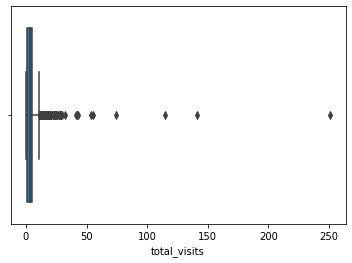

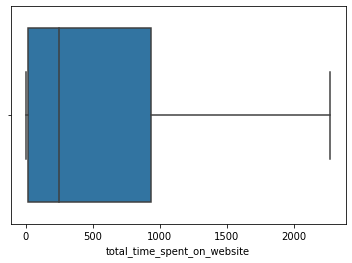

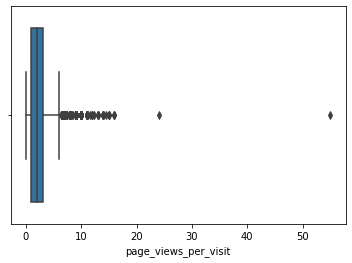

In [49]:
for i in LS_num.columns:
    sns.boxplot(LS[i])
    plt.show()

In [50]:
q1=LS_num['total_visits'].quantile(0.25)
q3=LS_num['total_visits'].quantile(0.75)
IQR=q3-q1
UB=q3+IQR*1.5
LB=q1-IQR*1.5

In [54]:
#(LS_num[LS_num['total_visits']>UB].value_counts()) /9240

total_visits  total_time_spent_on_website  page_views_per_visit
251.0         49                           1.48                    0.000108
13.0          1219                         2.17                    0.000108
14.0          171                          7.00                    0.000108
              148                          14.00                   0.000108
              143                          1.56                    0.000108
                                                                     ...   
17.0          119                          2.83                    0.000108
              104                          3.40                    0.000108
              96                           5.67                    0.000108
              75                           3.40                    0.000108
12.0          9                            1.71                    0.000108
Length: 267, dtype: float64

In [ ]:
list1= LS[LS['total_visits']>UB]['lead_source'].unique()
label=[]

for value in list1:
    label.append(LS[LS['lead_source']==value])

In [ ]:
label[0][['total_visits','page_views_per_visit']]

total_visits  page_views_per_visit
2              2.0                  2.00
3              1.0                  1.00
4              2.0                  1.00
6              2.0                  2.00
8              2.0                  2.00
...            ...                   ...
9235           8.0                  2.67
9236           2.0                  2.00
9237           2.0                  2.00
9238           3.0                  3.00
9239           6.0                  3.00

[4996 rows x 2 columns]

In [ ]:
for col in LS_num:
    q1=LS_num[col].quantile(0.25)
    q3=LS_num[col].quantile(0.75)
    IQR=q3-q1
    UB=q3+IQR*1.5
    LB=q1-IQR*1.5
    #list1= LS[LS['total_visits'].isnull()]['lead_origin'].unique()
    #label=[]
    for i in  LS['lead_source'].unique():
        LS_num.loc[(LS_num[col] > UB ) , col] = LS[LS['lead_source']==i][col].quantile(0.99)
        LS_num.loc[(LS_num[col] < LB ) , col] = LS[LS['lead_source']==i][col].quantile(0.01)

In [ ]:
#for col in LS_num[['total_visits', 'page_views_per_visit']]:
 #   q1=LS_num[col].quantile(0.25)
  #  q3=LS_num[col].quantile(0.75)
   # IQR=q3-q1
    #UB=q3+IQR*1.5
    #LB=q1-IQR*1.5
    #LS_num[LS_num[col]>UB]= LS_num[col].quantile(0.99)
    #LS_num[LS_num[col]<LB]= LS_num[col].quantile(0.01)

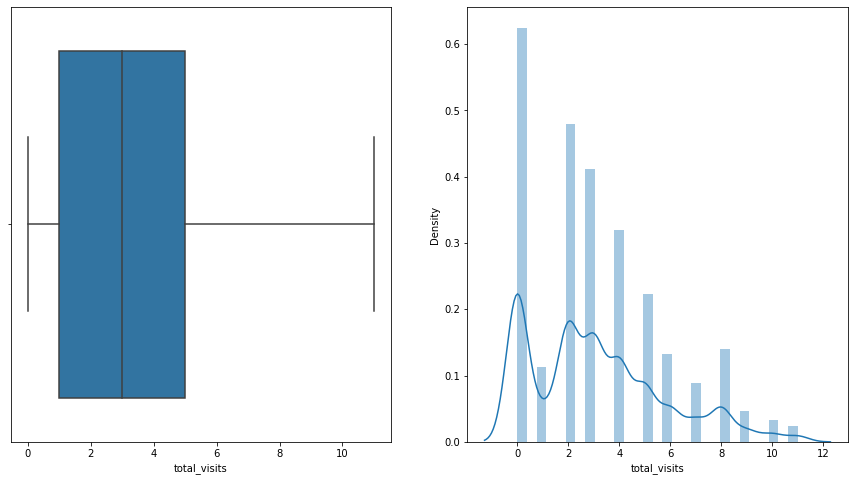

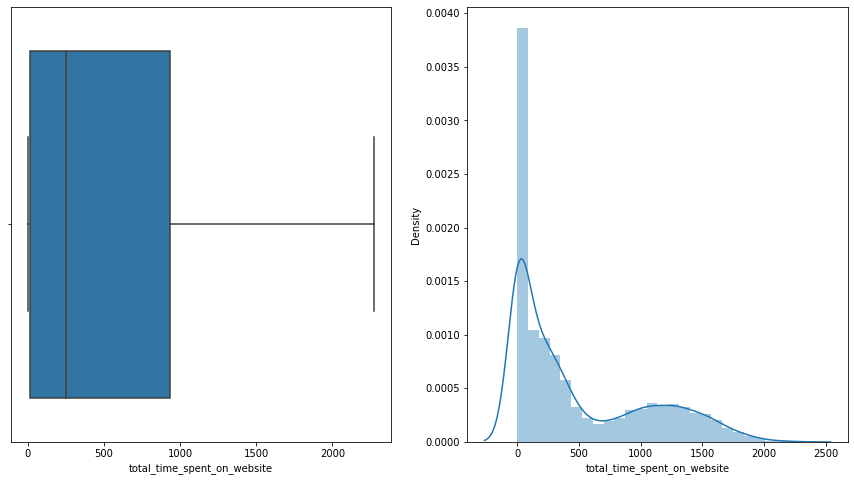

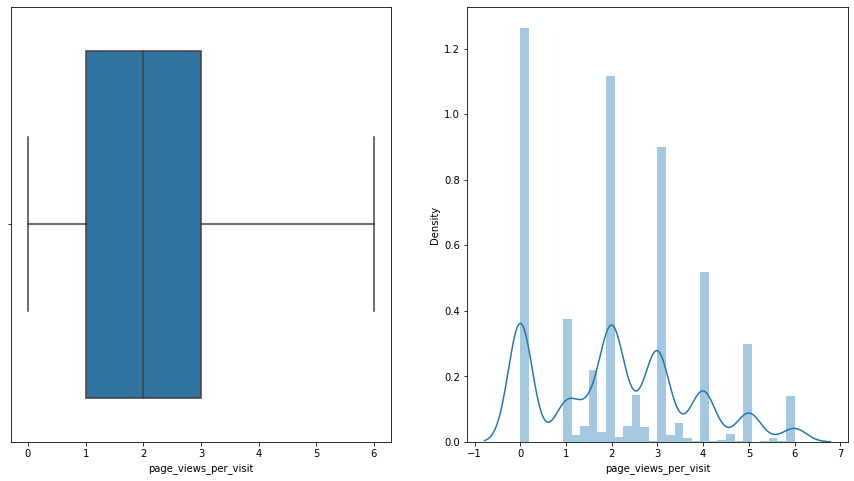

In [ ]:
for col in LS_num:
    fig, ax= plt.subplots(1,2, figsize=(15,8))
    sns.boxplot(LS_num[col], ax=ax[0])
    sns.distplot(LS_num[col], ax=ax[1])
    plt.show()

# **Creating file for Tableau Dashboard**

In [ ]:

LS1=pd.concat([LS_num,LS_cat],axis=1)

In [ ]:
LS1.columns


Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'last_activity', 'country', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [ ]:
LS1.head(2)

total_visits  ...  last_notable_activity
0           0.0  ...               Modified
1           5.0  ...           Email Opened

[2 rows x 32 columns]

In [ ]:
Exporting CSV file
LS1.to_csv("LS1.xls")
from google.colab import files
files.download("LS1.xls")

SyntaxError: ignored

# **Univariate Analysis**

## **'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'**

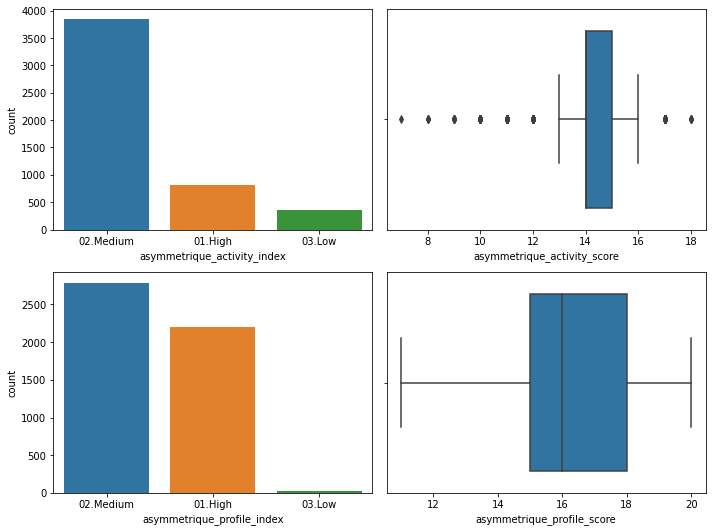

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(LS['asymmetrique_activity_index'], ax = ax[0,0])
plt2 = sns.boxplot(LS['asymmetrique_activity_score'], ax = ax[0,1])
plt3 = sns.countplot(LS['asymmetrique_profile_index'], ax = ax[1,0])
plt4 = sns.boxplot(LS['asymmetrique_profile_score'], ax = ax[1,1])
plt.tight_layout()
plt.show()

These variables are a customized index and respective scores generated from the activity/profile of a lead. 

Asymmetrique Activity Index and Asymmetrique Activity Score are assigned once a lead is assessed by X education on basis of other features like TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity.

1. 'Asymmetrique Activity Index'- Leads with 01.High and 03.Low activity index are low in numbers as these leads generally do not spend too much time on the website. Maximum leads spend a good amount of time on the website and are of index 02.Medium

2. 'Asymmetrique Activity Score'- The combination of activity actions are assigned numerical values for each lead. As the index 02.Medium has highest count, consequently, activity scores lie in  13 to 16. The 01.High index leads generate the outliers above the IQR and 03.Low index leads generate the outliers below the IQR 


Asymmetrique Profile Index and Asymmetrique Profile Score are assigned once a lead is assessed by X education on basis of other features like specialization, current occupation and what matters most in choosing a course.

3. 'Asymmetrique Profile Index' - Leads with 03.Low profile index are low in numbers as we have few leads coming from a non-relevant background. Generally, people with relevant background visit the website to upskill and are indexed as 01.High and people with semi-relevant background visit the website to garner more skills.

4. 'Asymmetrique Profile Score'- The combination of profile features of a lead are assigned numerical values. As the index 02.Medium has highest count, consequently, activity scores lie in  15 to 18. 01.High index profiles are having a score above 18


45% of the records do not have these values assigned, so we need to drop these columns as it is not reliable to impute any value in it. 


In [ ]:
#LS =LS.drop(['asymmetrique_activity_index','asymmetrique_activity_score','asymmetrique_profile_index','asymmetrique_profile_score'],1)
#LS_cat =LS_cat.drop(['asymmetrique_activity_index','asymmetrique_profile_index'],1)
#LS_num=LS_num.drop(['asymmetrique_activity_score','asymmetrique_profile_score'],axis=1)

In [ ]:
LS1.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'last_activity', 'country', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

## **'Do Not Call', 'Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums','Through Recommendations'**

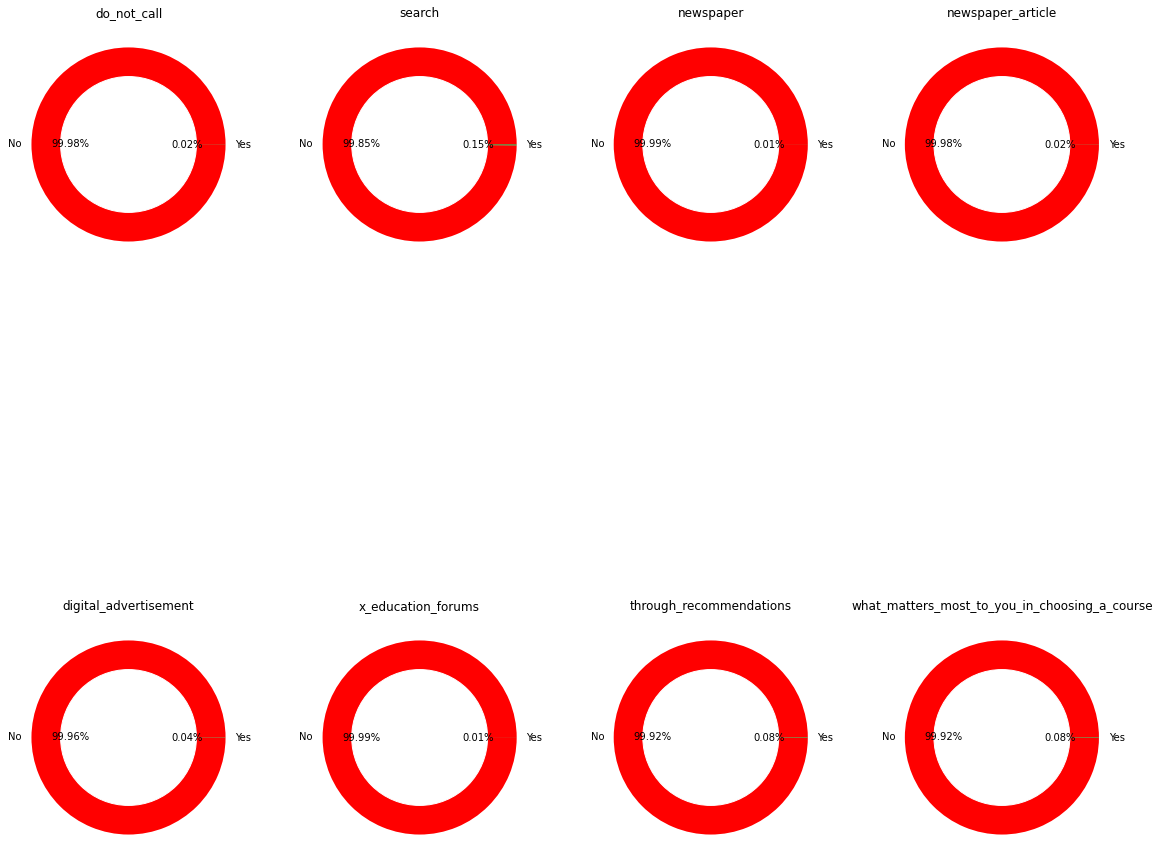

In [ ]:

def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = LS[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['red','green'],autopct='%1.2f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

col = ['do_not_call', 'search', 'newspaper', 'newspaper_article', 'digital_advertisement', 'x_education_forums','through_recommendations','what_matters_most_to_you_in_choosing_a_course']
plt.figure(figsize = (20,20))
i=1
for each_col in col:
    plt.subplot(2,4 ,i)
    pieplot(each_col)
    i+=1

For the above columns Do Not Call, Search, Newspaper, Newspaper Article, Digital Advertisement, X Education Forums, Through Recommendations:  maximum values are same, so we cannot generate any insight for lead conversion from this data. Hence, we will drop these columns.

In [ ]:
LS_cat= LS_cat.drop(['do_not_call', 'search', 'newspaper', 'newspaper_article', 'digital_advertisement', 'x_education_forums', 'through_recommendations','what_matters_most_to_you_in_choosing_a_course'],1)

## **Categorical Columns**

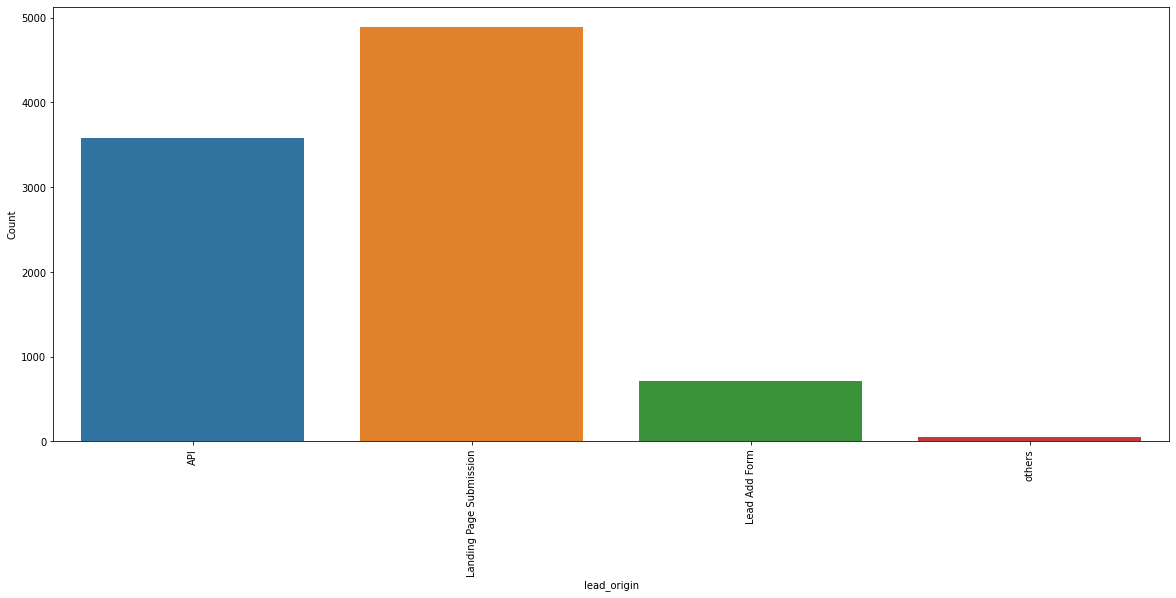

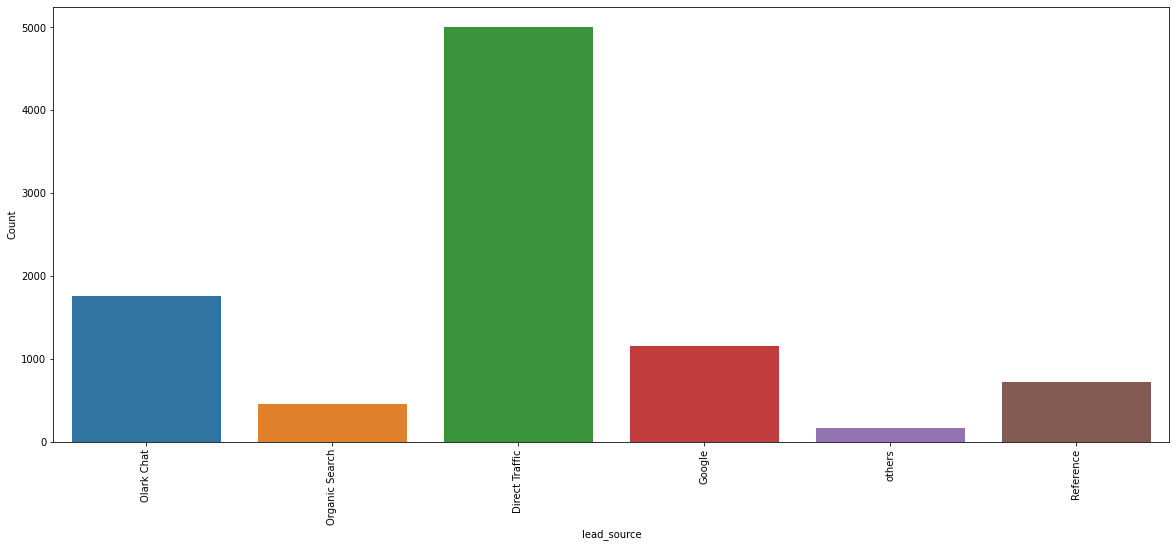

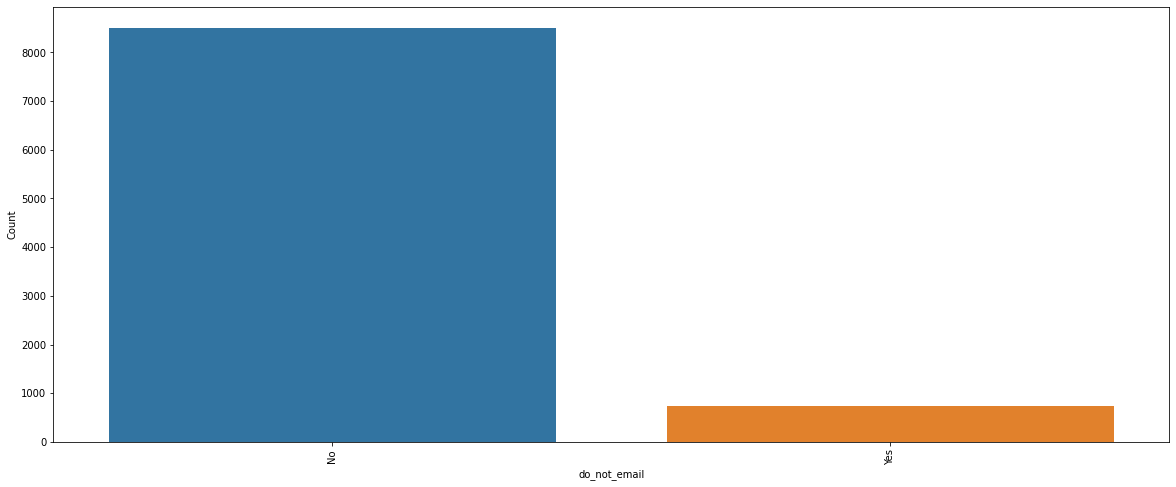

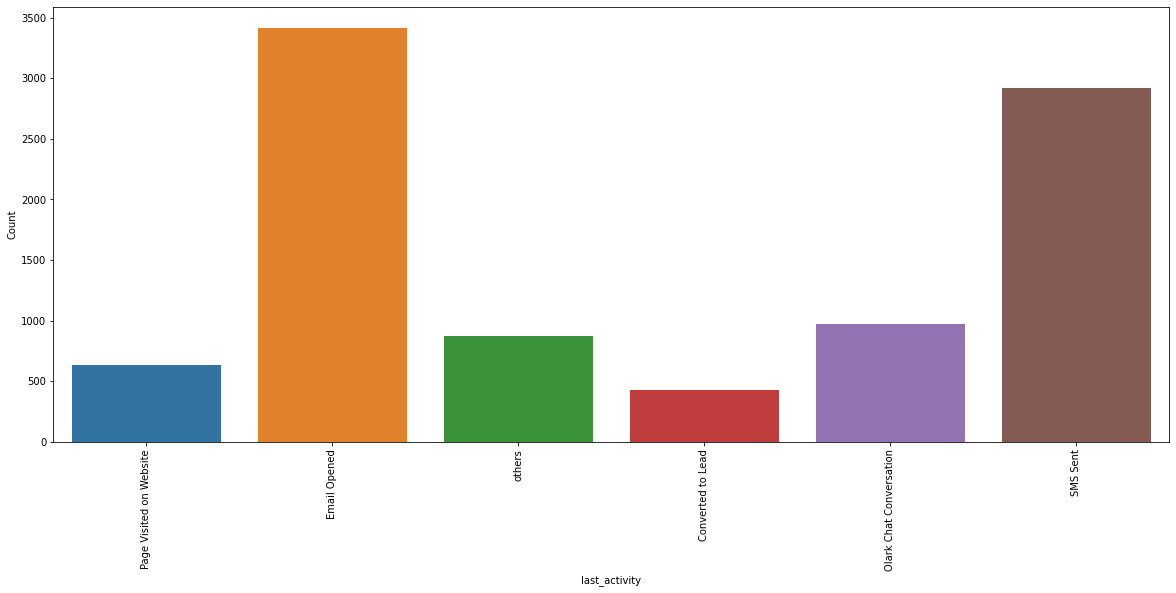

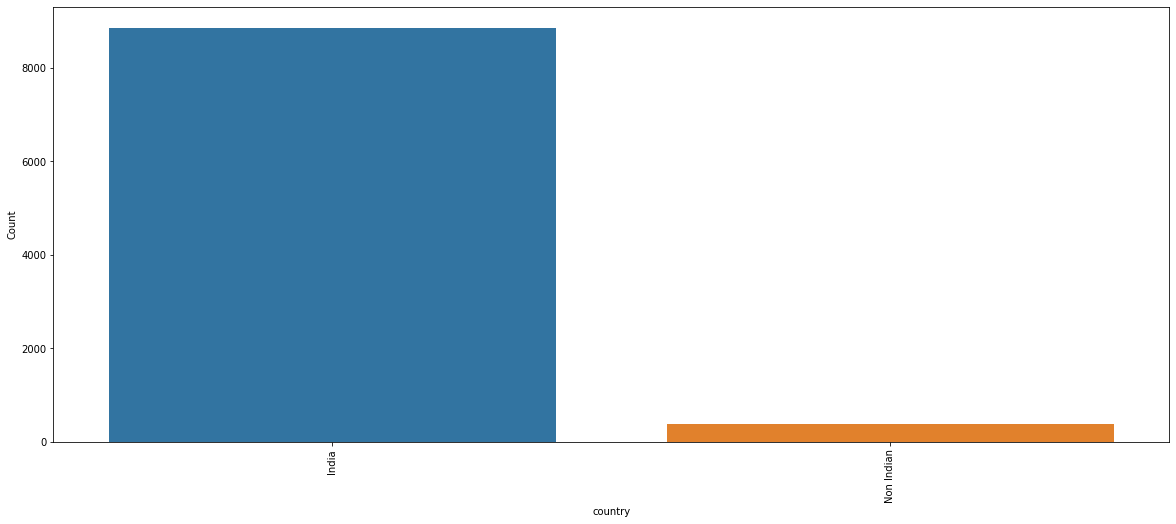

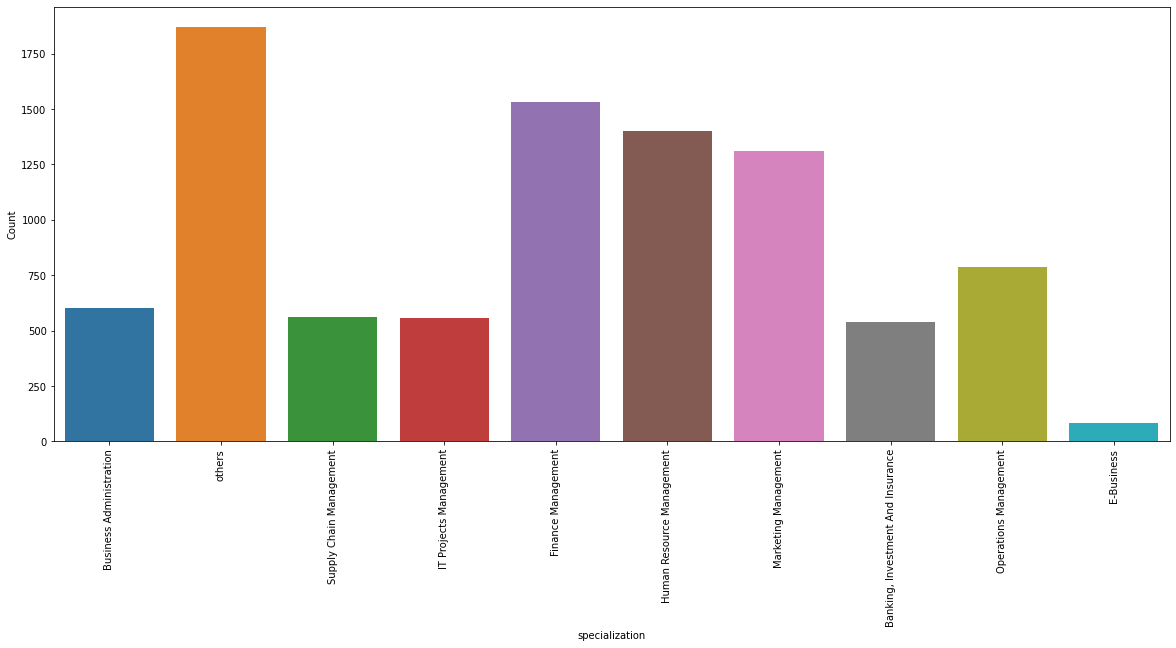

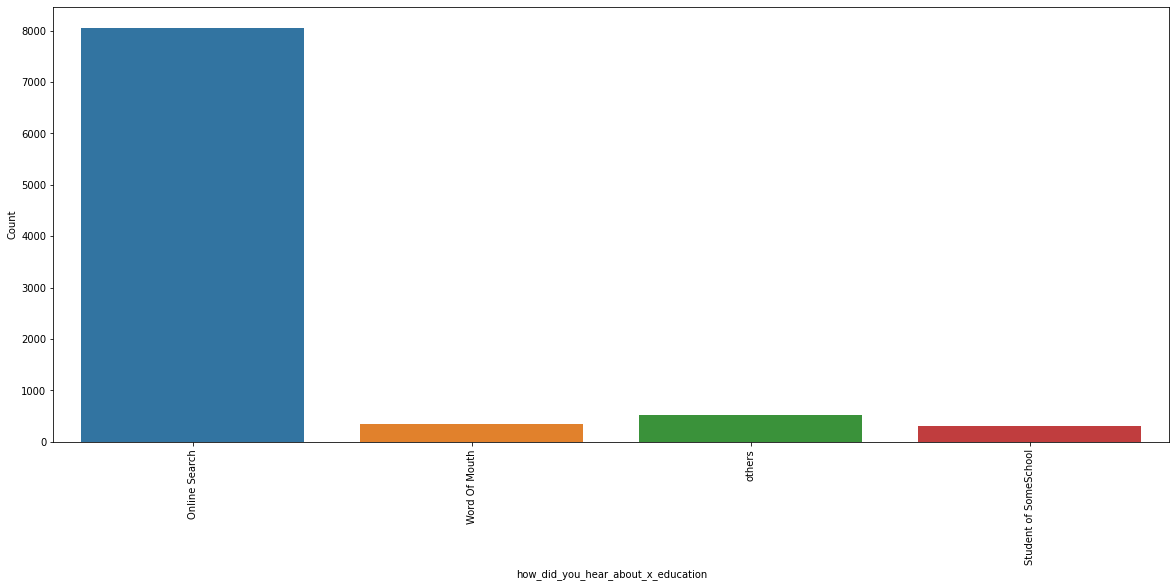

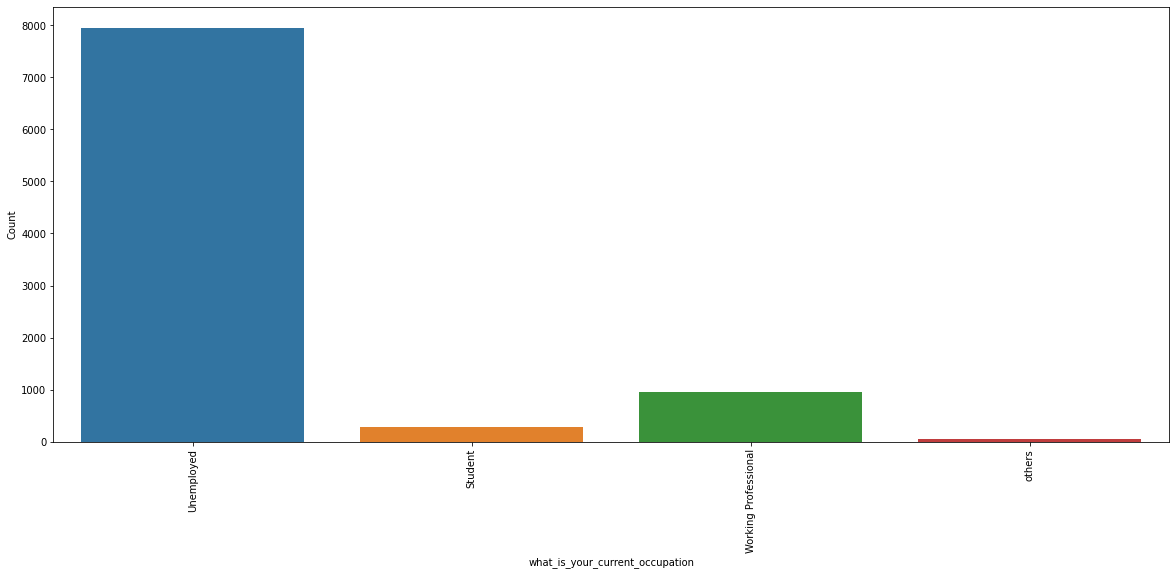

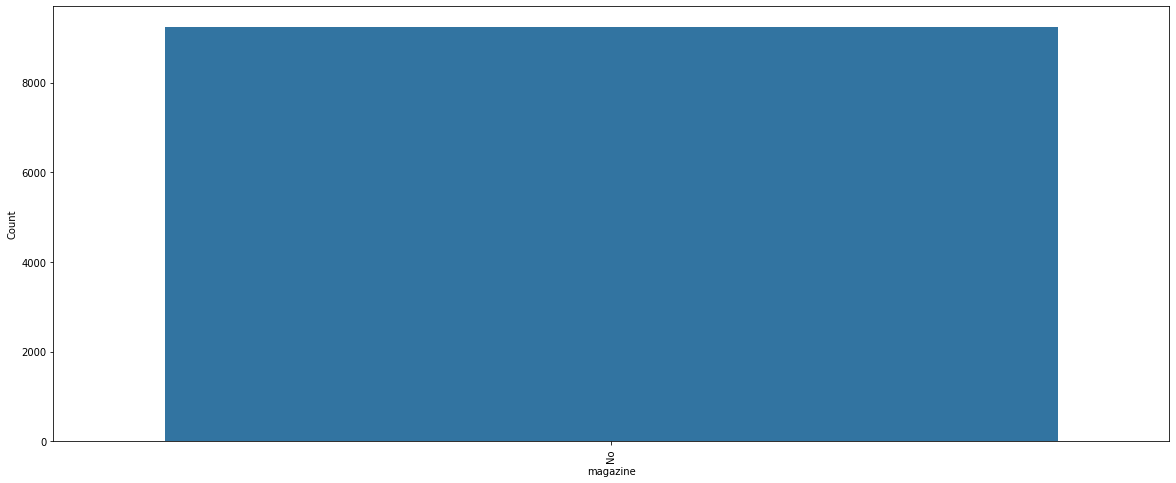

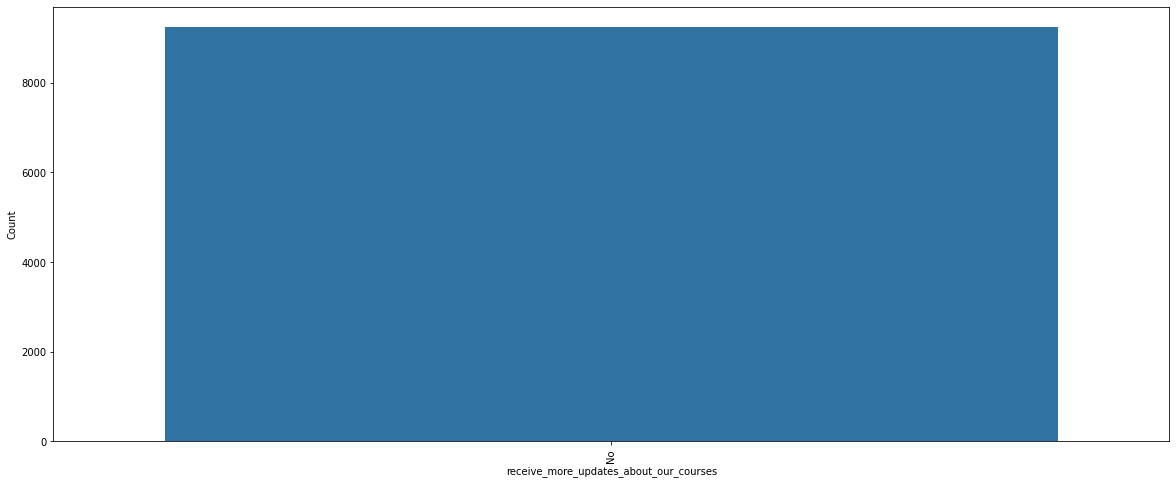

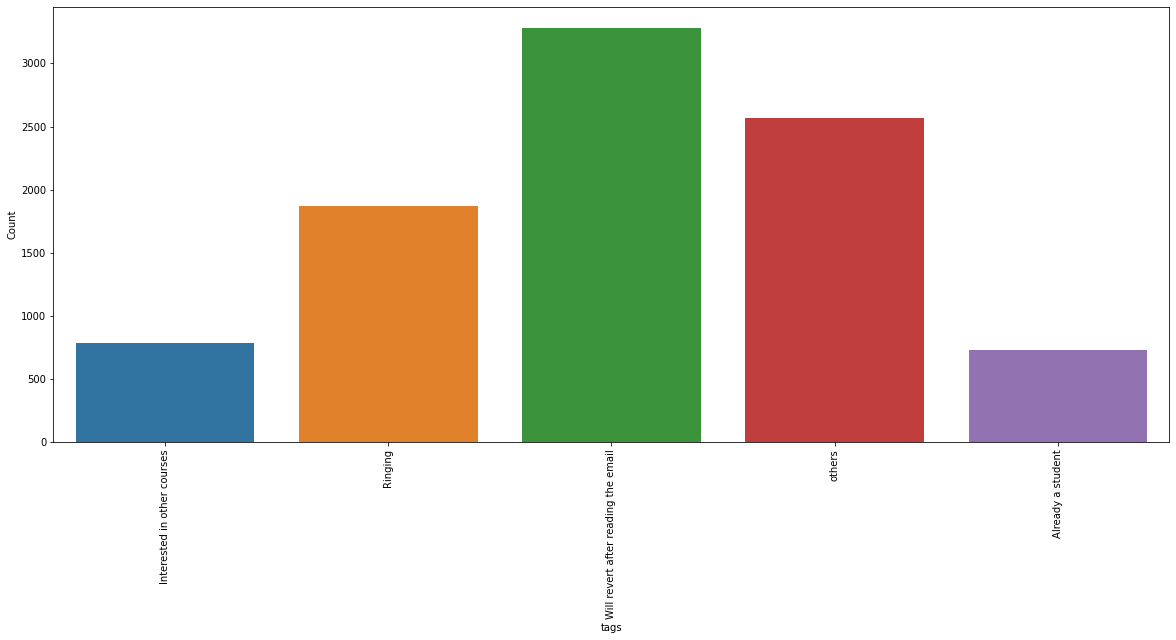

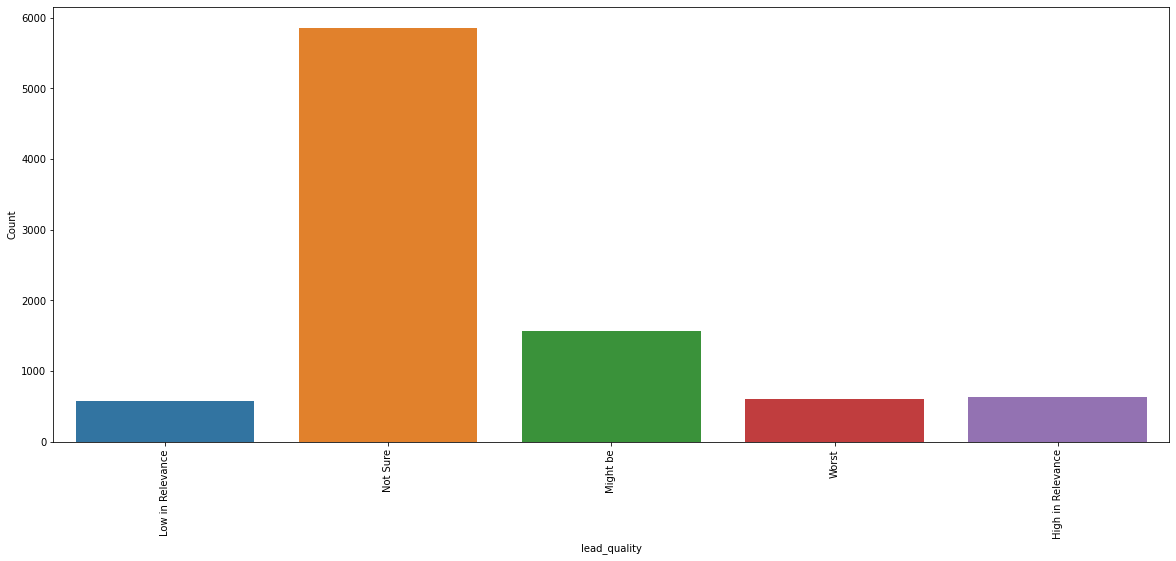

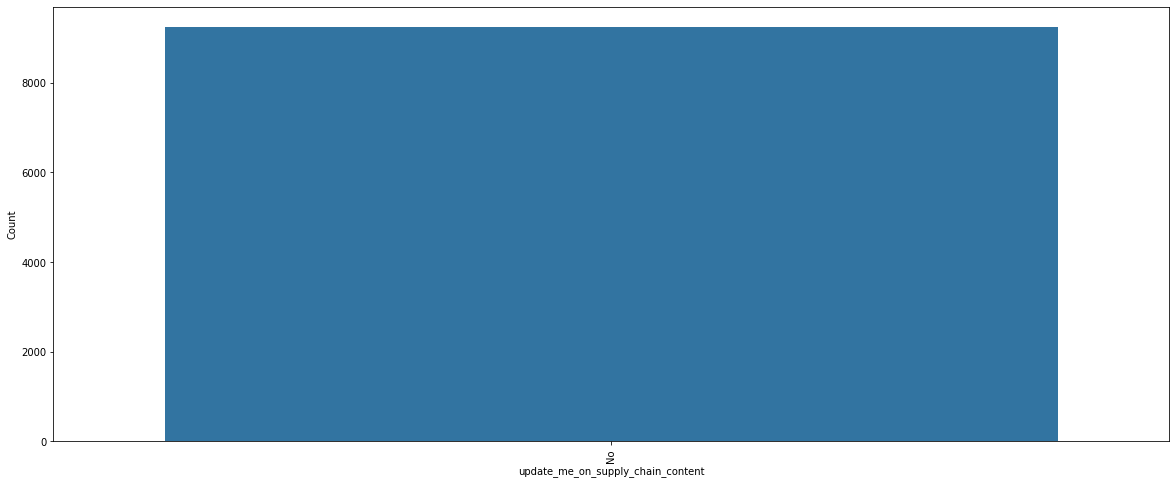

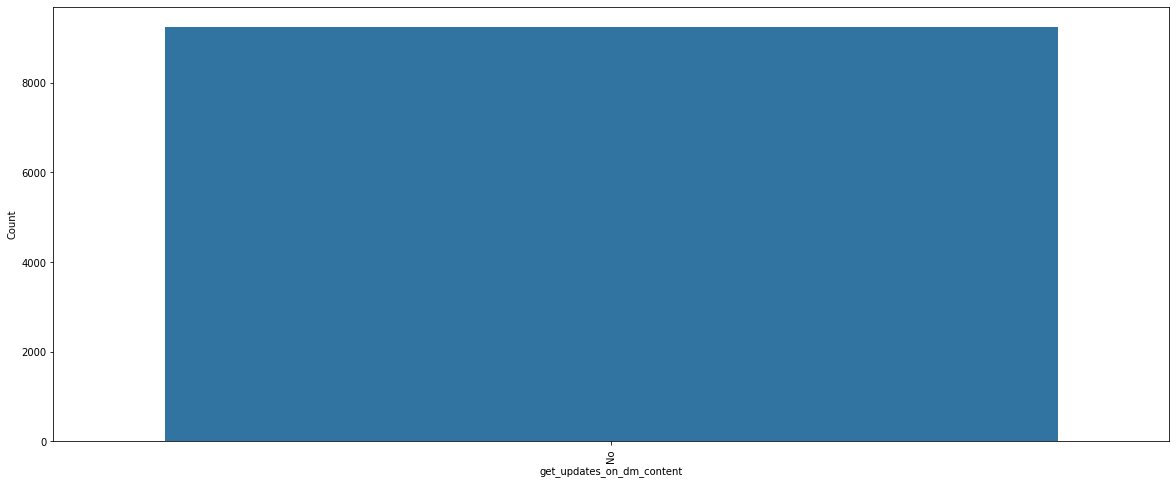

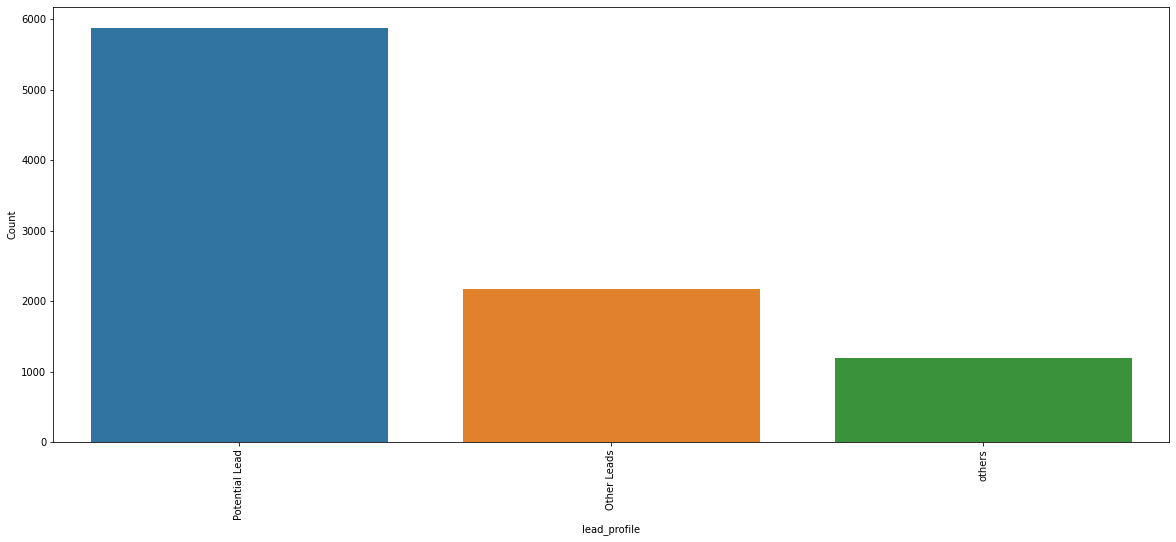

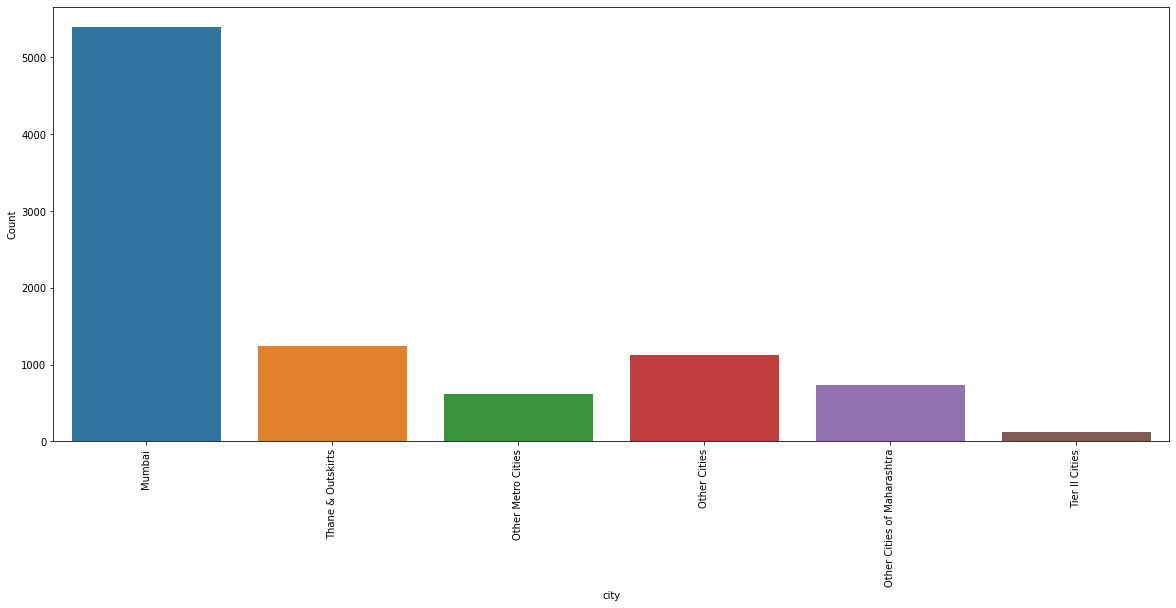

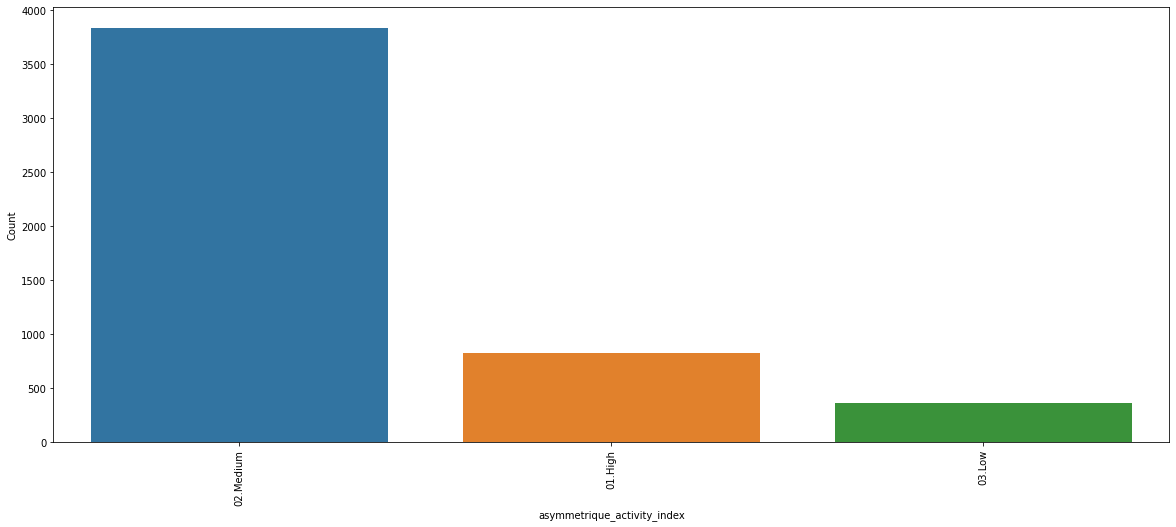

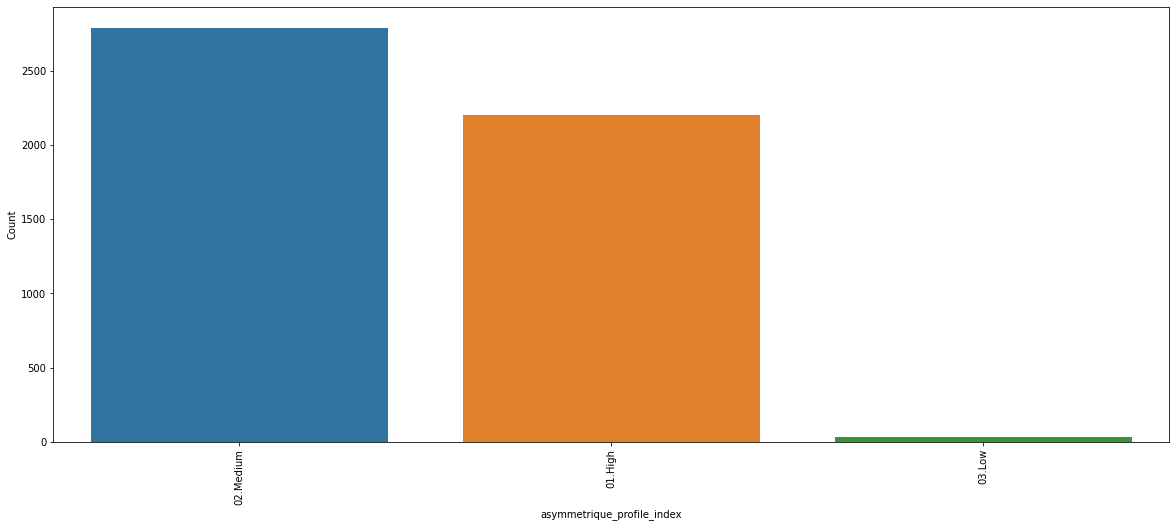

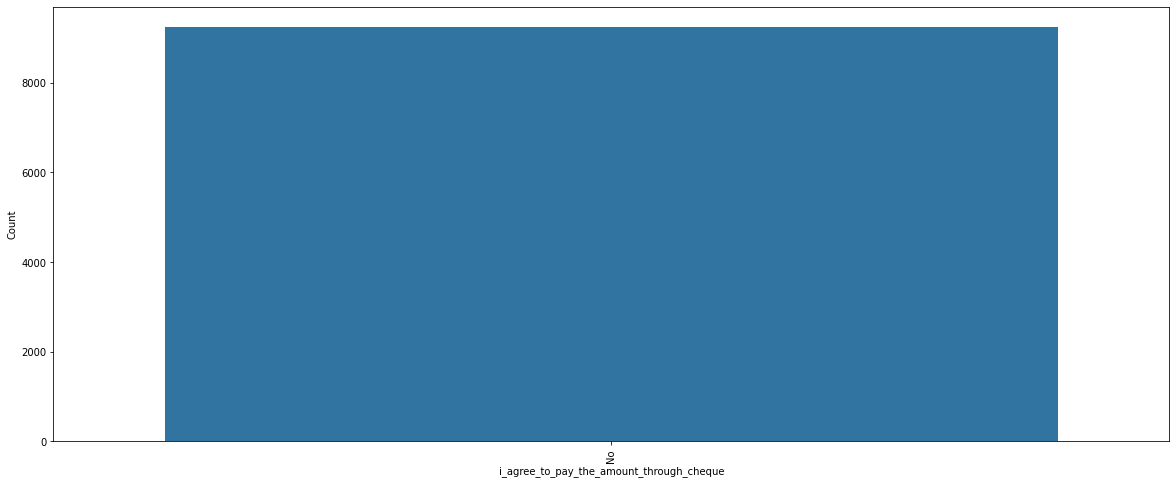

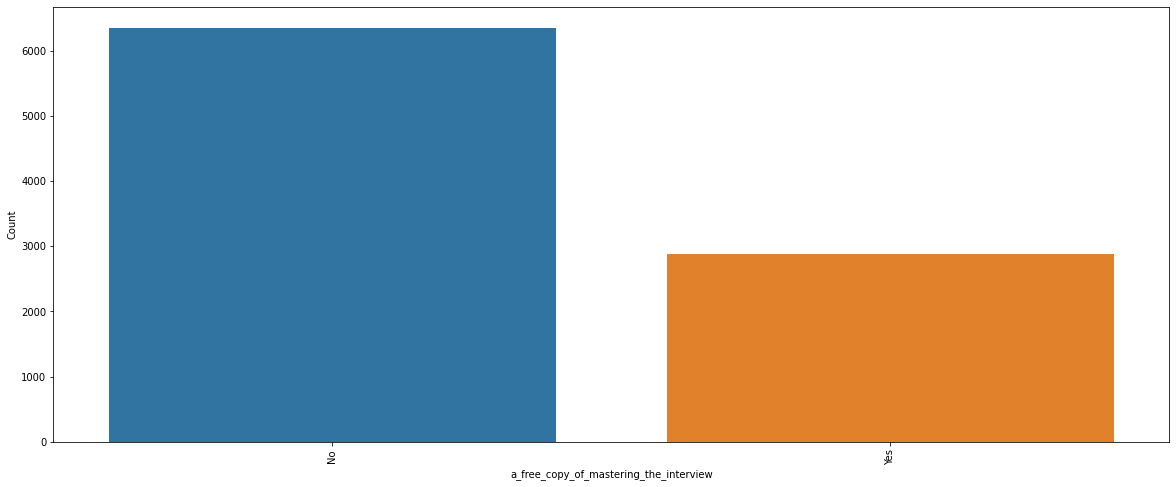

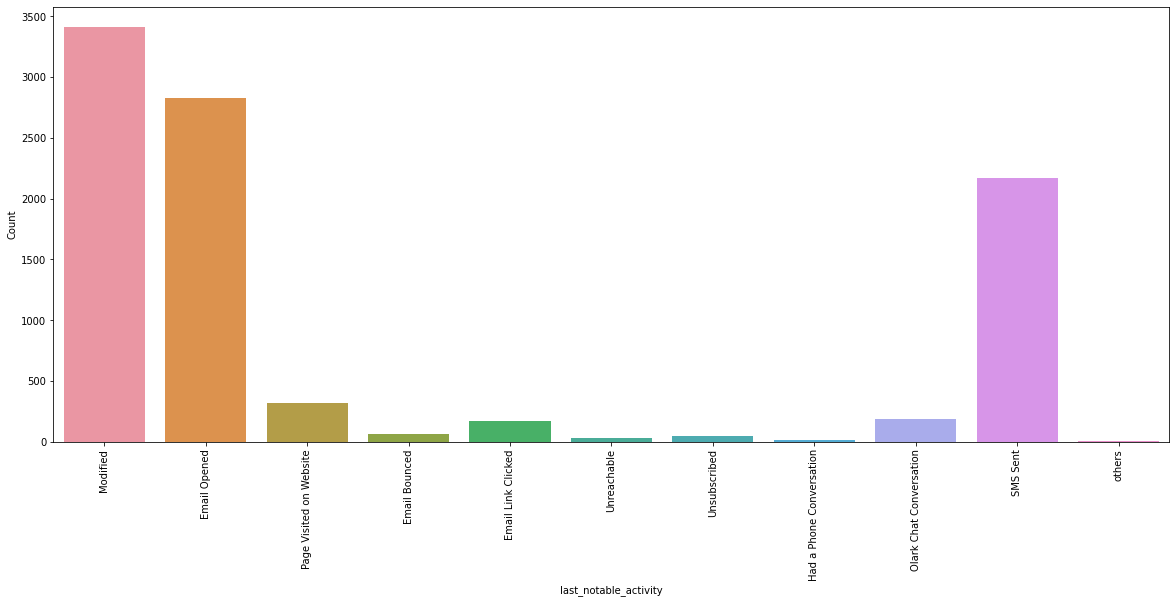

In [ ]:
for i in LS_cat.columns:
    plt.subplots(figsize=(20,8))
    sns.countplot(LS_cat[i])
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

1. **LEAD ORIGIN**- The maximum number of leads are generated through Landing Page Submission.Others generates the lowest number of leads
The main lead generators are Landing Page Submission (4886),
API (3580).

2. **LEAD SOURCE**- The leads are generated from 6 different sources, highest of which are generated through Direct Traffic(5000) , Olark Chart(1755), and Google(1500).

3. **DO NOT EMAIL**- Majority of the people are ok with receiving email (~92%)
People who are ok with email has conversion rate of 40%
People who have opted out of receive email has lower rate of conversion (only 15%)

4. **LAST ACTIVITY**- The last activity by leads was majorly on Email Opened(3437), SMS Sent(2745) and Olark Chat Conversation(973)

5. **COUNTRY**- The highest leads are generated from India(8861) and other countries(387)

6. **SPECIALIZATION**- Others and Finance Management is most common specialization  which people searched for on the website.

7. **How Did you hear about X Education**- The maximum leads are generated through Online Search(8058). Others are Word of Mouth ,others and Student of Some School


8. **What is your current occupation**- Maximum leads  are generated from people who are unemployed(~85%)

9. **What matters most to you in choosing this course**-  Maximum leads have mentioned that better career prospect matters the most.

10. **Magazine**- It only contains No, so will not generate any insight. Hence, we will drop this column.

11. **Receive More Updates About Our Courses**- - It only contains no. So will not generate any insight. Hence, we will drop this column.

12. **Tags**- The maximum leads generated do revert after reading email(3170) and others 

13. **Lead Quality**- Most of the candidates are assessed as  Not Sure(5872) ,Might be(1760),and High in Relevance(837) leads.

14. **Update me on Supply Chain Content**:No customer wants updates on Supply Chain Content. It only contains no. So will not generate any insight. Hence, we will drop this column.

15. **Get updates on DM Content**:No customer wants updates on the DM Content.It only contains no. So will not generate any insight. Hence, we will drop this column.

16. **Lead Profile**:A lead level assigned to each customer based on their profile. 5875 customer has highest potential lead

17. **City**:Mostly customers belong to Mumbai(6891)

18. **I agree to pay the amount through cheque**:No body has agreed to pay the amount through cheque. Hence, we will drop this column

19. **A free copy of Mastering The Interview**- Most leads (~68%) opt out of free copy of the book Mastering The Interview

20. **Last Notable Activity**- Most notable activities of the leads were account Modified(36.8%), Email Opened(30.5%) and SMS Sent (23.5%)

In [ ]:
LS_cat.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation', 'magazine',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [ ]:
## Dropping 3,5,10,11,14,15,18,19
LS_cat= LS_cat.drop(['do_not_email','country','magazine','receive_more_updates_about_our_courses','update_me_on_supply_chain_content','get_updates_on_dm_content','i_agree_to_pay_the_amount_through_cheque','a_free_copy_of_mastering_the_interview'],1)

In [ ]:
LS_cat.head()

lead_origin  ... last_notable_activity
0                      API  ...              Modified
1                      API  ...          Email Opened
2  Landing Page Submission  ...          Email Opened
3  Landing Page Submission  ...              Modified
4  Landing Page Submission  ...              Modified

[5 rows x 13 columns]

## **Numerical Columns**

In [ ]:
LS_num.head()

total_visits  total_time_spent_on_website  page_views_per_visit
0           0.0                          0.0                   0.0
1           5.0                        674.0                   2.5
2           2.0                       1532.0                   2.0
3           1.0                        305.0                   1.0
4           2.0                       1428.0                   1.0

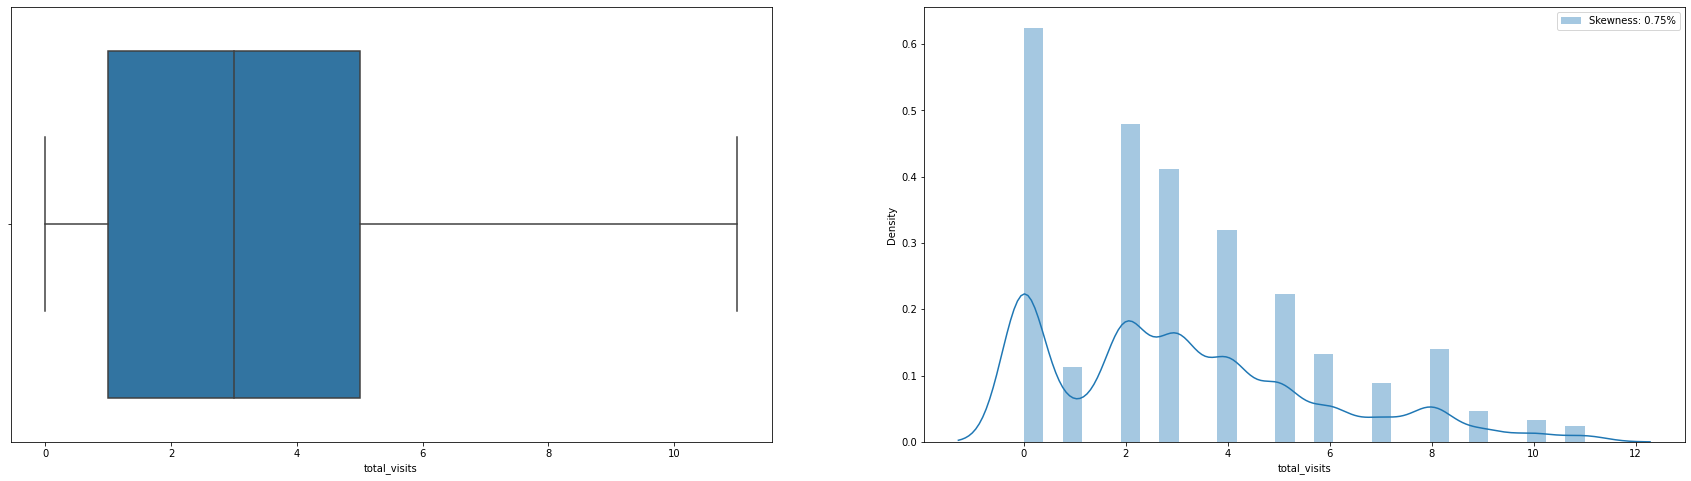

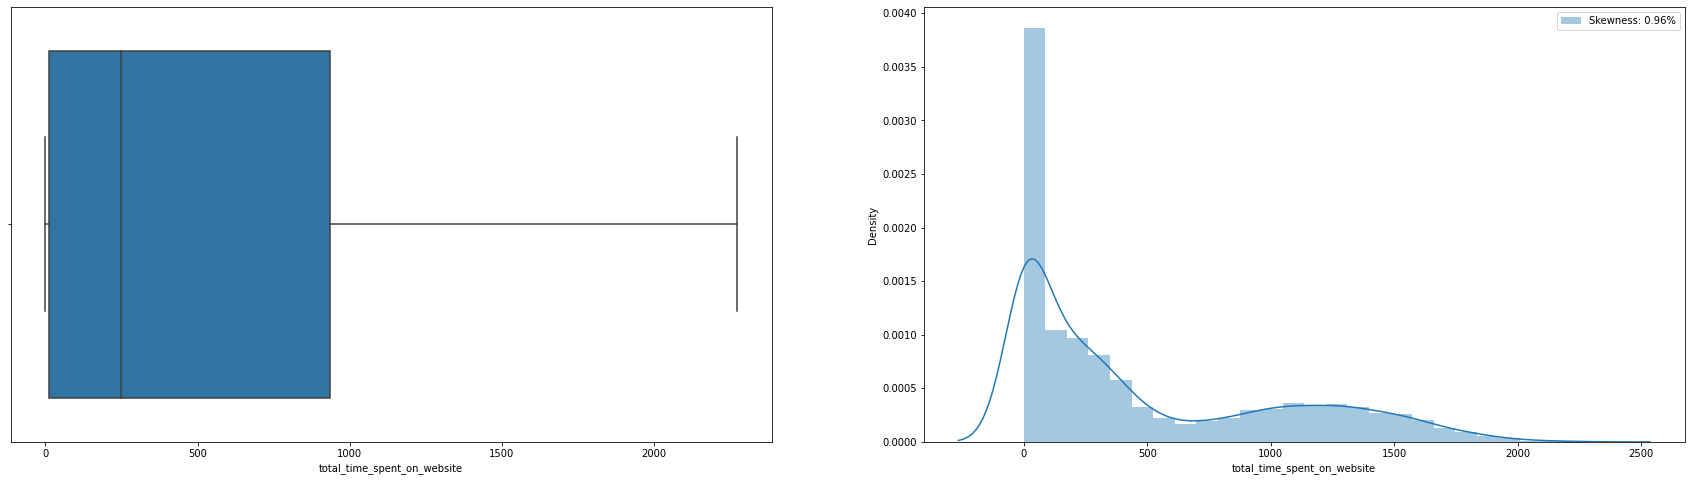

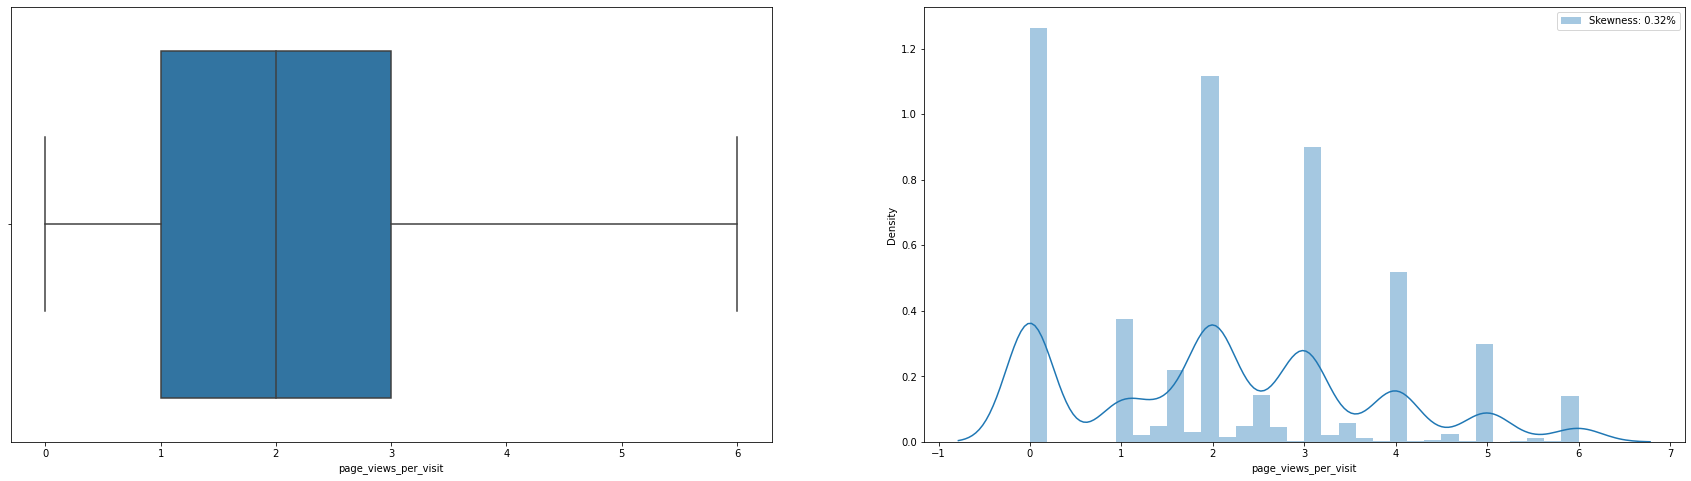

In [ ]:
for col in LS_num:
  fig, ax=  plt.subplots(1, 2, figsize=(30,8))
  sns.boxplot(LS_num[col], ax=ax[0])
  sns.distplot(LS_num[col], ax=ax[1], label='Skewness: %.2f%%'%(LS_num[col].skew()))
  plt.legend()
  plt.show()

1. **Total Visits**
The distribution is slightly right skewed with 0.75 skewness.
As per the distribution, less visits come from people  who tend to visit the site once and never come back. The customers who want to gain an idea about X education  visit 1-5 times. The highest visits come from the most engaged customers, creating the skewness in the distribution.


2. **Total Time Spent on Website**
The distribution is right skewed with 0.96 skewness. 
As per the distribution, the least engagement of the website is from leads who tend to spend less time on the website. Quite a few leads spend upto 500 minutes. This comes from leads who want to gain an idea about X education. The people who spend 1000 minutes on the website are the most engaged leads.

3. **Page Views Per Visit**
The distribution is right skewed with 0.32 skewness. 
As per the distribution, maximum leads only visit the page 1-5 times and do not engage with X education. The leads whose number of page visits are the highest are the most engaged customers.

# **Bivariate Analysis**

## Categorical with Target

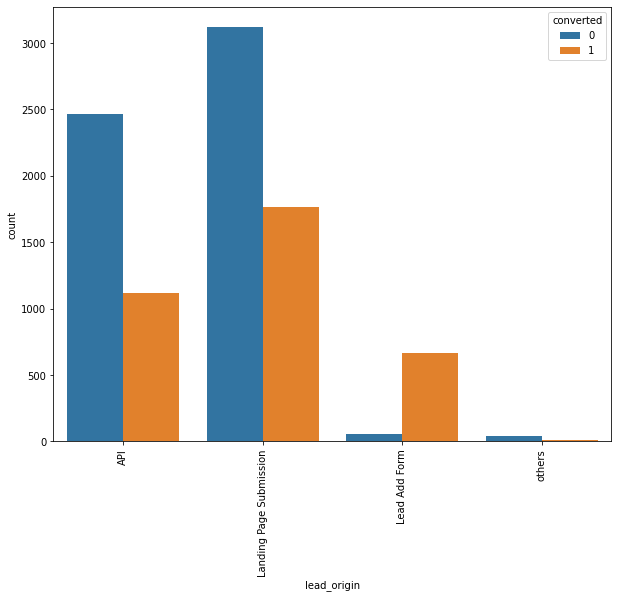

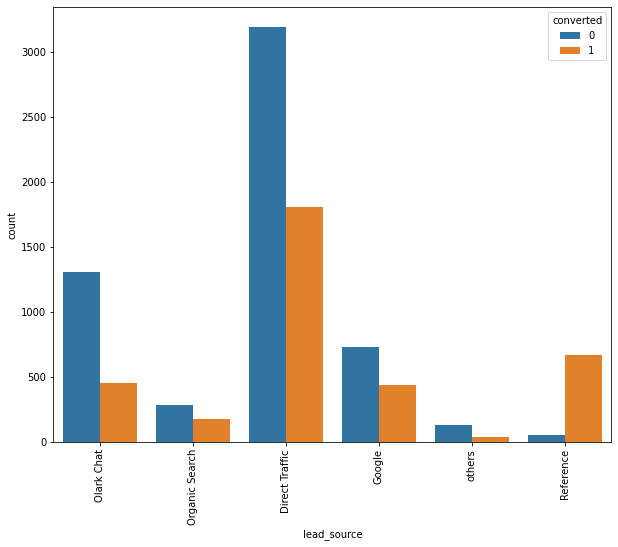

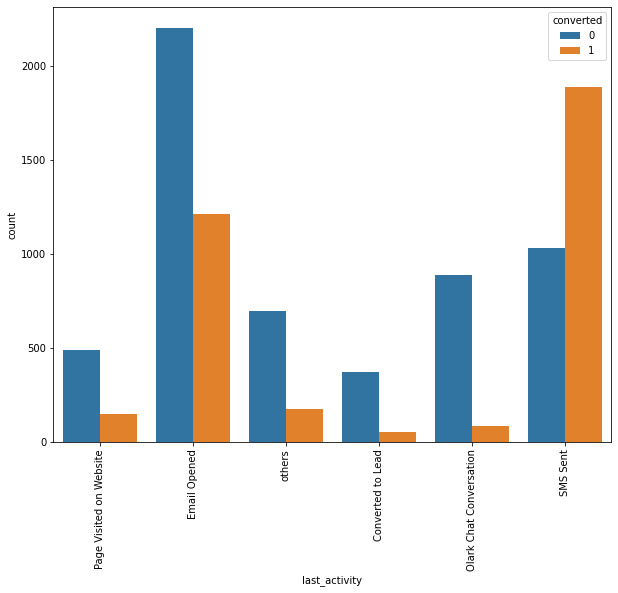

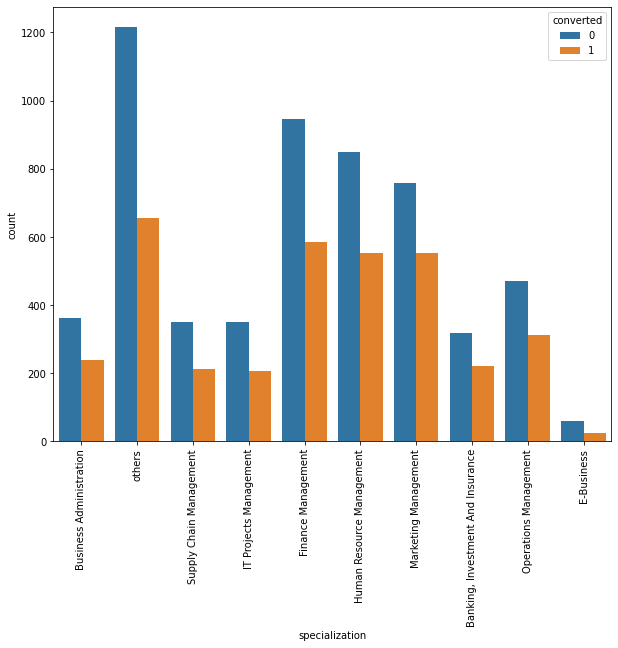

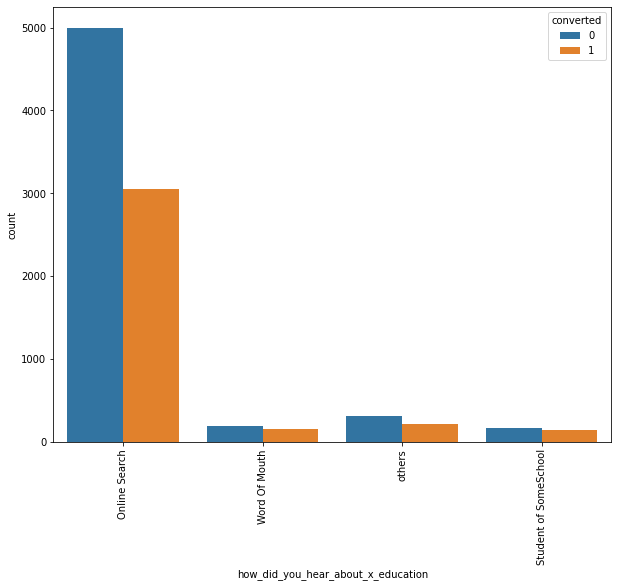

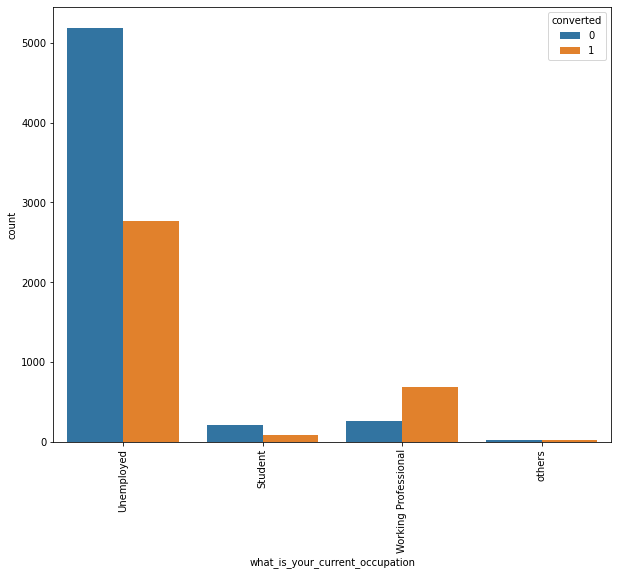

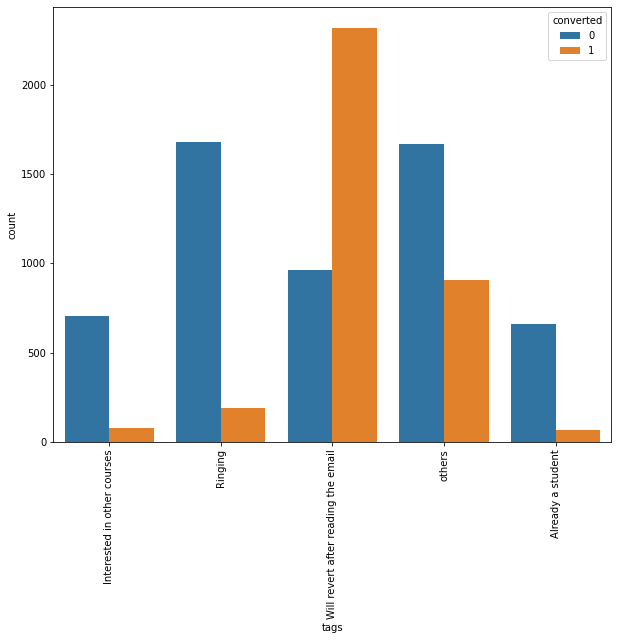

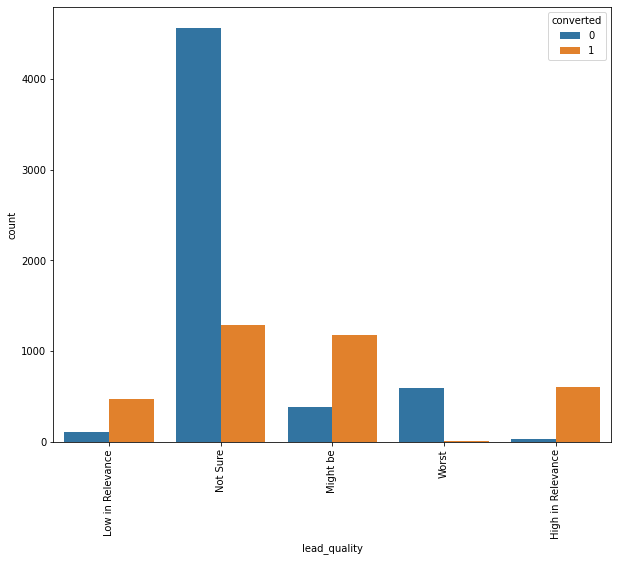

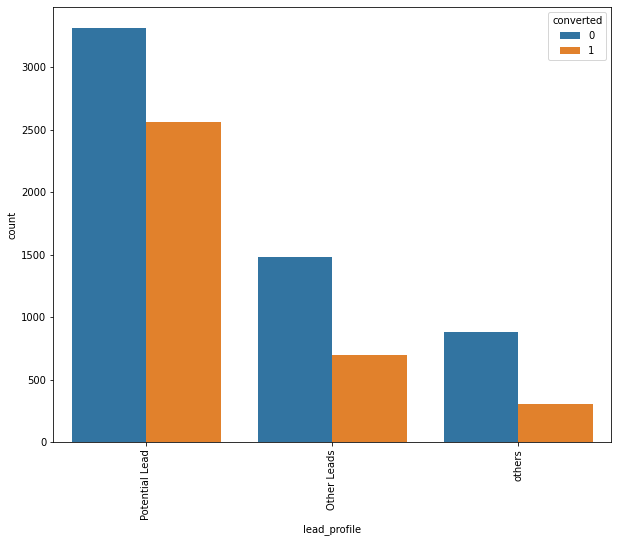

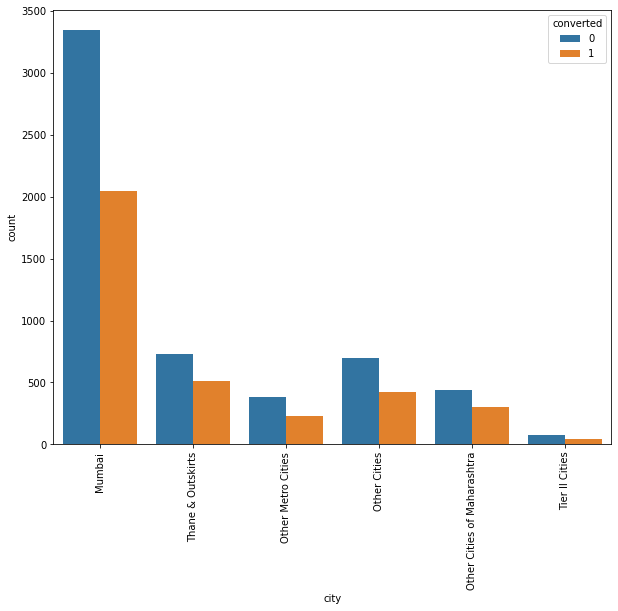

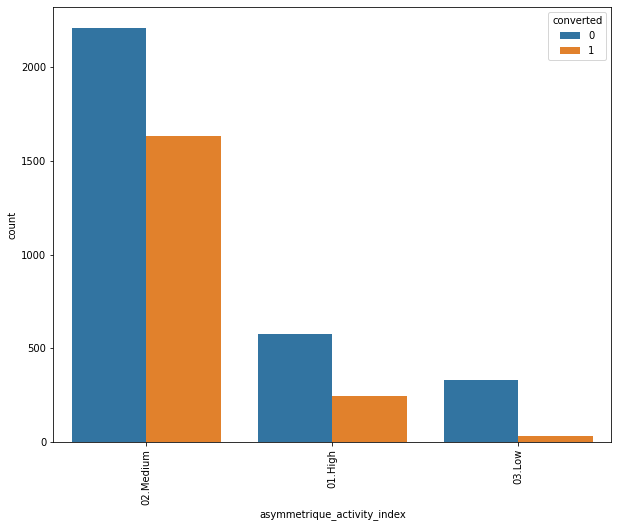

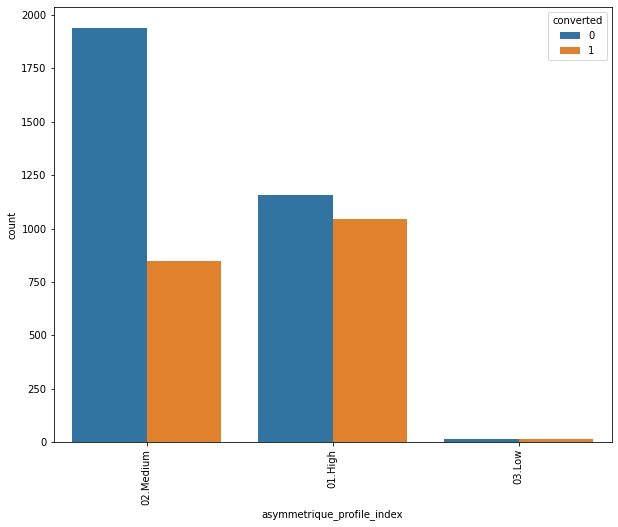

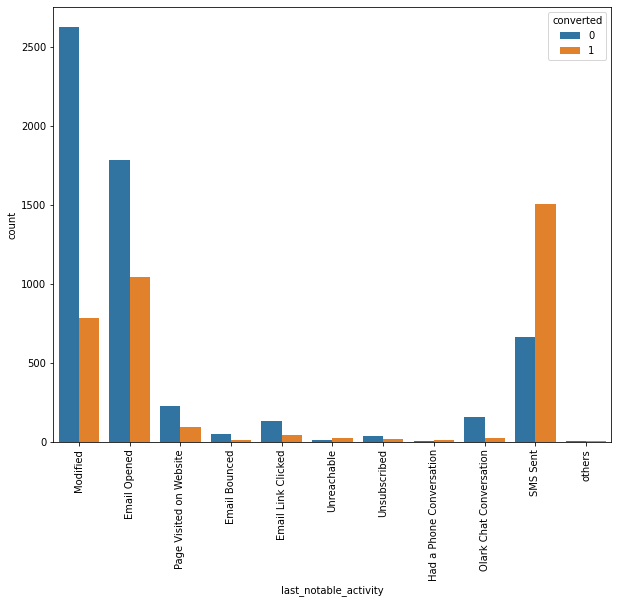

In [ ]:

for i in LS_cat.columns:
  plt.subplots(figsize=(10,8))
  sns.countplot(x = LS_cat[i], hue = "converted", data = LS)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
values= LS_cat['last_notable_activity'].unique()
for value in values:
    converted= LS_cat[(LS_cat['last_notable_activity']==value) & (LS['converted']==1)].shape[0] 
    total= LS[LS['last_notable_activity']==value].shape[0]
    print(value, converted/total)

Modified 0.22982095685353685
Email Opened 0.36929607357622923
Page Visited on Website 0.29245283018867924
Email Bounced 0.15
Email Link Clicked 0.26011560693641617
Unreachable 0.6875
Unsubscribed 0.2978723404255319
Had a Phone Conversation 0.9285714285714286
Olark Chat Conversation 0.1366120218579235
SMS Sent 0.6942909760589319
others 0.7142857142857143




 **Lead Origin:**
1.API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2.Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3.Others are very less in count.

 **Lead Source:**
1.Olark Chat and Direct traffic generates maximum number of leads.
2.Conversion Rate of Reference leads is high.

 

 **Last Activity:**
1.Most of the lead have their Email opened as their last activity.
2.Conversion rate for leads with last activity as SMS Sent is almost 60%.
3.Conversion rate for leads with last activity as Email Opened is almost 50%.



 **Specialization:**
1.Focus should be more on the Specialization with high conversion rate Finance Management, Human Resource Management  and Marketing management has greater than 50% conversion rate.
2.While for others count is high we have a conversion rate of less than 35%

 **How did you hear about X Education**
1.Student of SomeSchool, Word Of Mouth and Others has highest conversion rate of 45%
2.While for Online Search count is high we have a conversion rate of less than 35%

 **What is your current occupation**
1.80% conversion rate of Working Professional. Though Unemployed people have been contacted in the highest number, the conversion rate is low ~40%
2.We cannot combine smalled value categories as their conversion rate is very different. Combing them may provide wrong predictions.

 **Tags:**
Will revert after reading email has ~60% conversion rate. 
Others has ~40% conversion rate. 
Ringing has very low conversion rate as leads have not responded on calls at first touchpoint call

 **Lead Quality**
Lead Quality is assessed correctly except for 'Low in Relevance' as leads have a good conversion rate inspite of profie not aligned with the course.

 **Lead Profile**
Potential Leads has highest conversion of 50%.Other Leads and Others have ~40% conversion rate

 **City**
Most leads are from Mumbai with less than 30% conversion rate.
Thane & outskirts and other cities also have very less conversion rate

 

 **Last Notable Activity**
 SMS Sent has highest conversion rate of ~70%
 Email opened has good conversion rate of ~40%
 While for Modified count is high we have a conversion rate of ~20% as leads are modifying their accounts and not coming back to the website




## Numerical with target

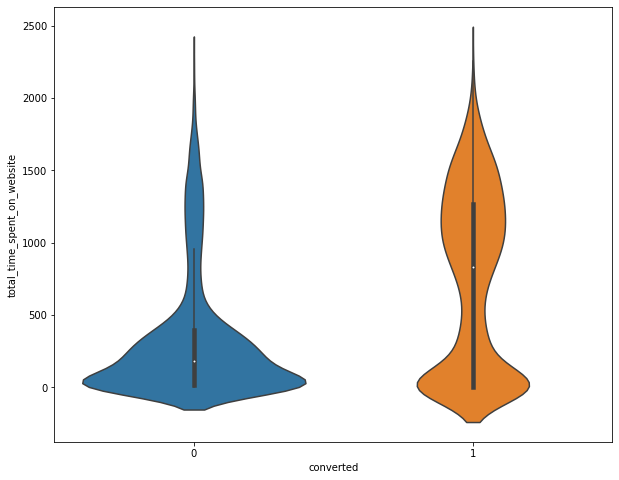

In [ ]:
plt.subplots(figsize=(10,8))
sns.violinplot(y = LS_num['total_time_spent_on_website'], x=LS['converted'])

plt.show()

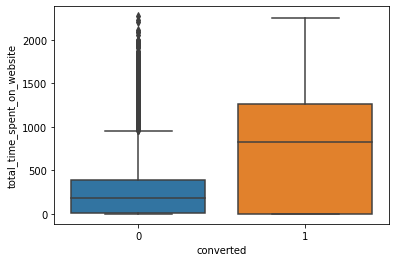

In [ ]:
sns.boxplot(y=LS_num['total_time_spent_on_website'],x=LS['converted'])

**TotalVisits:**
The page view per visit is totally dependent on the total visits by a lead.So with increase in totalvisit the page views also increased and conversion rate icreased for such types of leads.
After 7 visits , the conversion rate goes beyond 40%.


**Page Views Per Visit**
At 1.17 average page visit , the conversion rate is high due to leads who are most interested who upskill and immediately opt for the course.As the avg page visit increases, the conversion rate is also declining.These are the hot leads that X-education needs to work on.

**Total Time Spent on Website**
From 0-200, that is the default range of time spent on website.There conversion rate is very low.Leads who is spending time up to 750 are the people who are comparing the course provided at different website.Leads who are spending time up to 1200 , their conversion rate is very high.

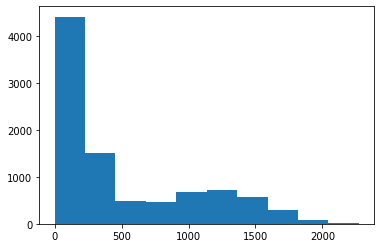

In [ ]:
plt.hist(LS_num['total_time_spent_on_website'],bins=10)
plt.show()

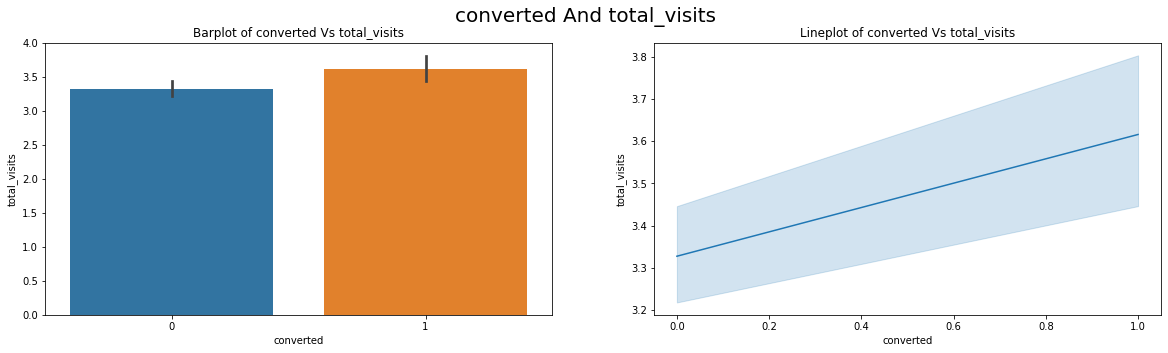

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=LS['converted'],y=LS['total_visits'],ax=ax[0])
ax[0].set_title('Barplot of converted Vs total_visits')
sns.lineplot(x=LS['converted'],y=LS['total_visits'],ax=ax[1])
ax[1].set_title('Lineplot of converted Vs total_visits')
plt.suptitle('converted And total_visits',fontsize = 20)
plt.show()

Inferences:
- The total number of visits made by the customer on the website is in the range of 0 to 251.
- Many convereted leads have visited the sites anywhere in between 0-50 times and so does the lead not being convereted.
- Hence the probability of a lead being converted doesn't really depend on the total_visits of the customer to the website.

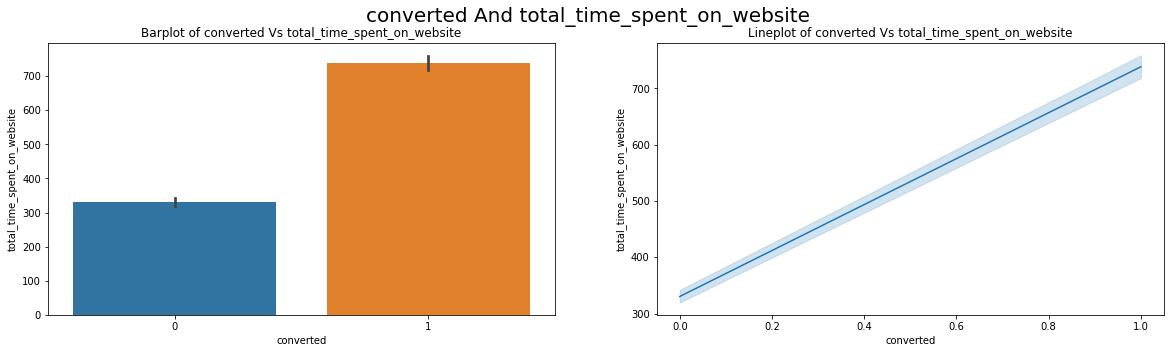

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=LS['converted'],y=LS['total_time_spent_on_website'],ax=ax[0])
ax[0].set_title('Barplot of converted Vs total_time_spent_on_website')
sns.lineplot(x=LS['converted'],y=LS['total_time_spent_on_website'],ax=ax[1])
ax[1].set_title('Lineplot of converted Vs total_time_spent_on_website')
plt.suptitle('converted And total_time_spent_on_website',fontsize = 20)
plt.show()

Inferences:
- The total_time_spent_on_website of the customer on the X Education website is in the range of 0 to 2272.
- From the Lineplot we can say that the more the amount of time a person spends on the website,the probability of that person being converted to a customer is more.There exists a Linear Relationship we can say.

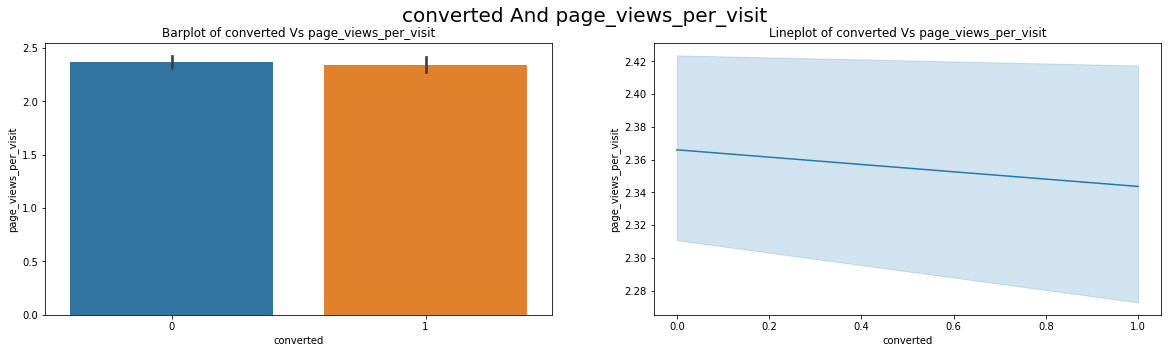

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=LS['converted'],y=LS['page_views_per_visit'],ax=ax[0])
ax[0].set_title('Barplot of converted Vs page_views_per_visit')
sns.lineplot(x=LS['converted'],y=LS['page_views_per_visit'],ax=ax[1])
ax[1].set_title('Lineplot of converted Vs page_views_per_visit')
plt.suptitle('converted And page_views_per_visit',fontsize = 20)
plt.show()

Inferences:
- The page_views_per_visit of the customer on the X Education website is in the range of 0 to 55.
- From the scatterplot we can see that a person being converted is really no that dependant on the Average number of pages on the X Education website viewed during the visits.
- From the Lineplot we can infer that the probabilty of a lead being converted into a customer actually increases with small decrease of page_views_per_visit from its mean value.

**Key Take-Aways:**
- From converted and total_visits plot : The probability of a lead being converted doesn't really depend on the total number of visits made by the customer on the website.
- From converted And total_time_spent_on_website : The more the amount of time a person spends on the website,the probability of that person being converted to a customer is more.
- From converted And page_views_per_visit : The probabilty of a lead being converted into a customer actually increases with small decrease of page_views_per_visit from its mean value.

## Numerical- Numerical

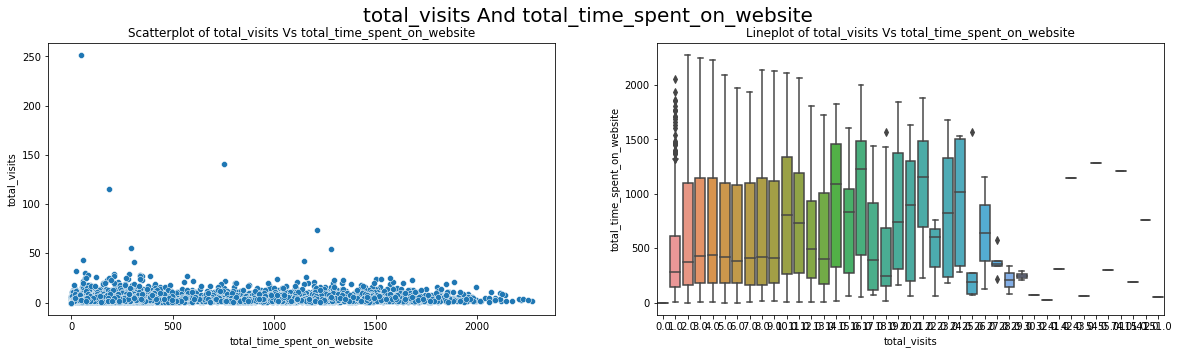

In [ ]:

f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['total_time_spent_on_website'],y=LS['total_visits'],ax=ax[0])
ax[0].set_title('Scatterplot of total_visits Vs total_time_spent_on_website')
sns.boxplot(x=LS['total_visits'],y=LS['total_time_spent_on_website'],ax=ax[1])
ax[1].set_title('Lineplot of total_visits Vs total_time_spent_on_website')
plt.suptitle('total_visits And total_time_spent_on_website',fontsize = 20)
plt.show()

Inferences:
- Not much inference can be drawn of these plots.Apart from the varying total_time_spent_on_website with total_visits

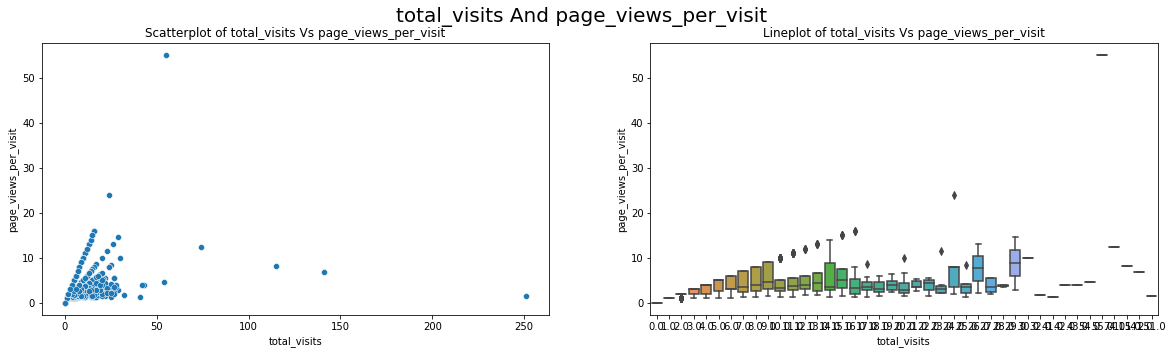

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['total_visits'],y=LS['page_views_per_visit'],ax=ax[0])
ax[0].set_title('Scatterplot of total_visits Vs page_views_per_visit')
sns.boxplot(x=LS['total_visits'],y=LS['page_views_per_visit'],ax=ax[1])
ax[1].set_title('Lineplot of total_visits Vs page_views_per_visit')
plt.suptitle('total_visits And page_views_per_visit',fontsize = 20)
plt.show()

Inferences:
- From the scatterplot we see that when the total number of visits made by the customer on the website lies between 0 to 25 the Average number of pages on the website viewed during the visits is anywhere in between 0 - 20
- Not much inference can be drawn from the Lineplot

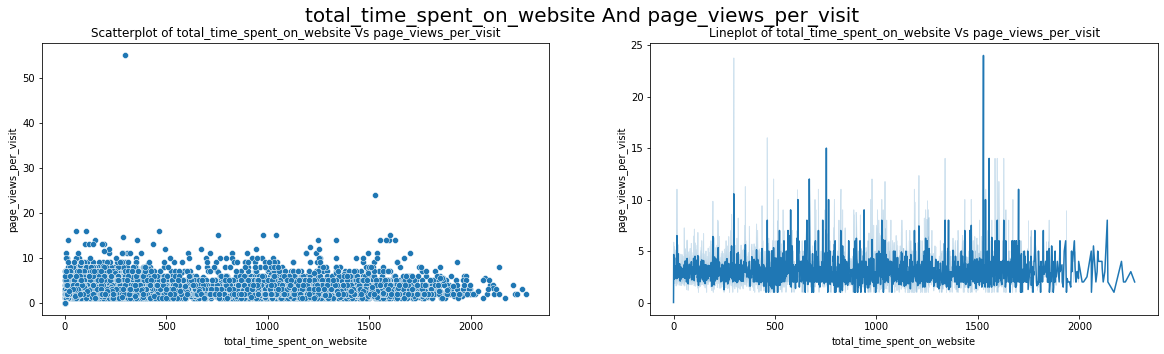

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['total_time_spent_on_website'],y=LS['page_views_per_visit'],ax=ax[0])
ax[0].set_title('Scatterplot of total_time_spent_on_website Vs page_views_per_visit')
sns.lineplot(x=LS['total_time_spent_on_website'],y=LS['page_views_per_visit'],ax=ax[1])
ax[1].set_title('Lineplot of total_time_spent_on_website Vs page_views_per_visit')
plt.suptitle('total_time_spent_on_website And page_views_per_visit',fontsize = 20)
plt.show()

Inferences:
- Those customers who tend to spend anywhere in between 0 - 500 minutes on the website visit around 0 to 15 number of pages on the website.
- From the scatterplot we see that the average number of pages on the website viewed by the customer during the visits is not that relevant with the total time spent by the customer on the website.

## Categorical-  Numerical

In [ ]:
LS_cat.columns

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city',
       'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'last_notable_activity'],
      dtype='object')

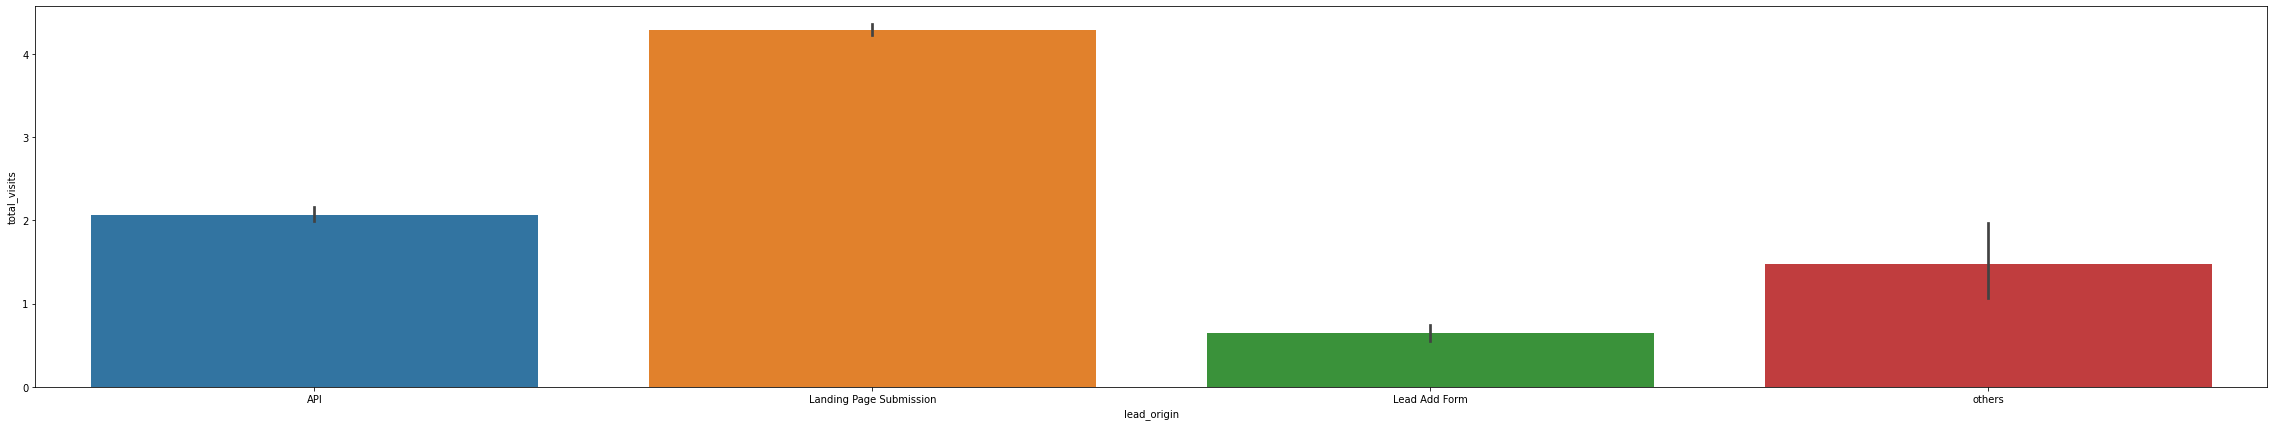

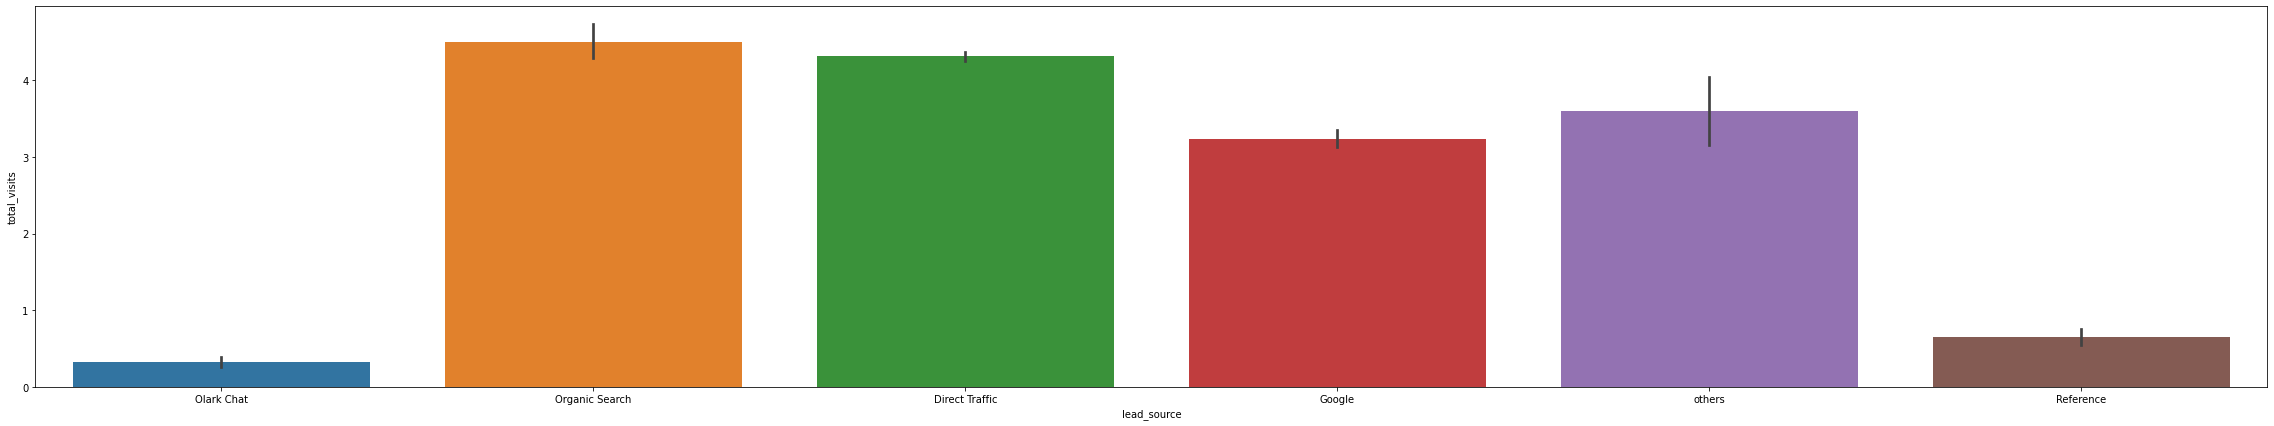

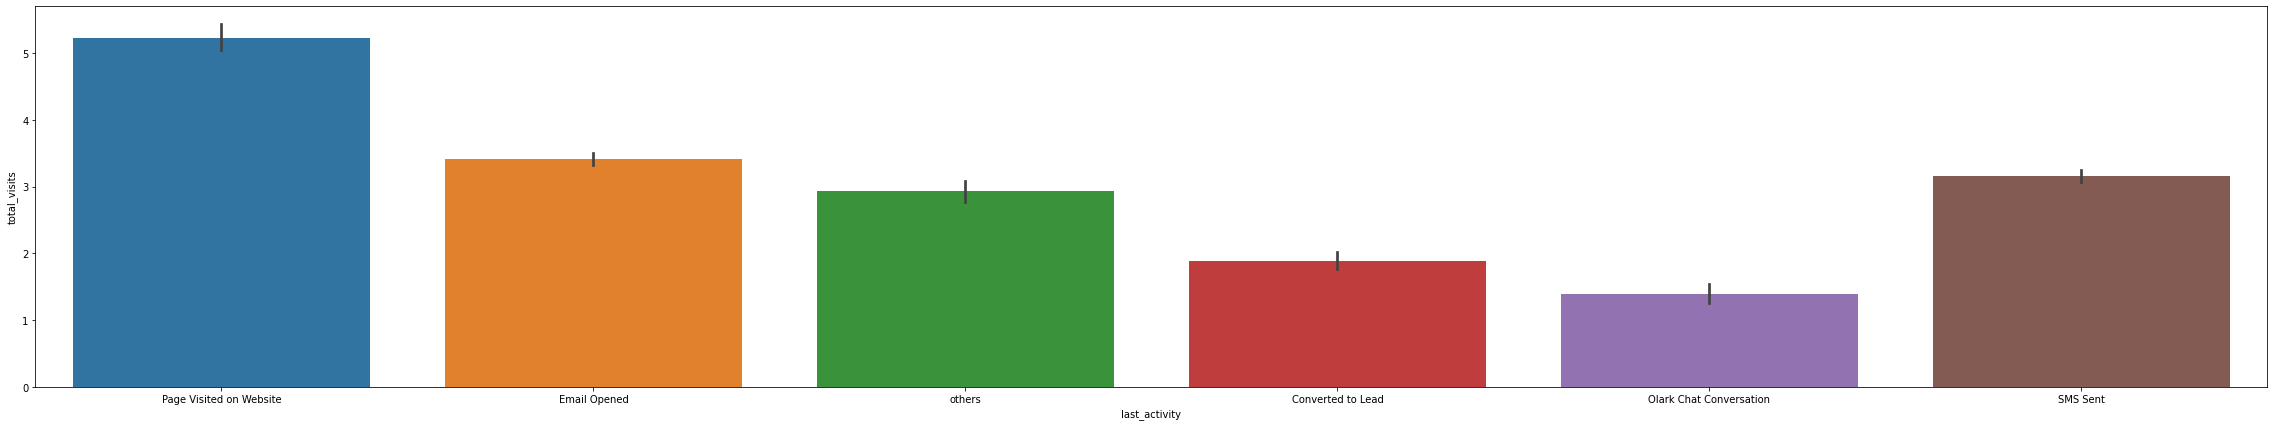

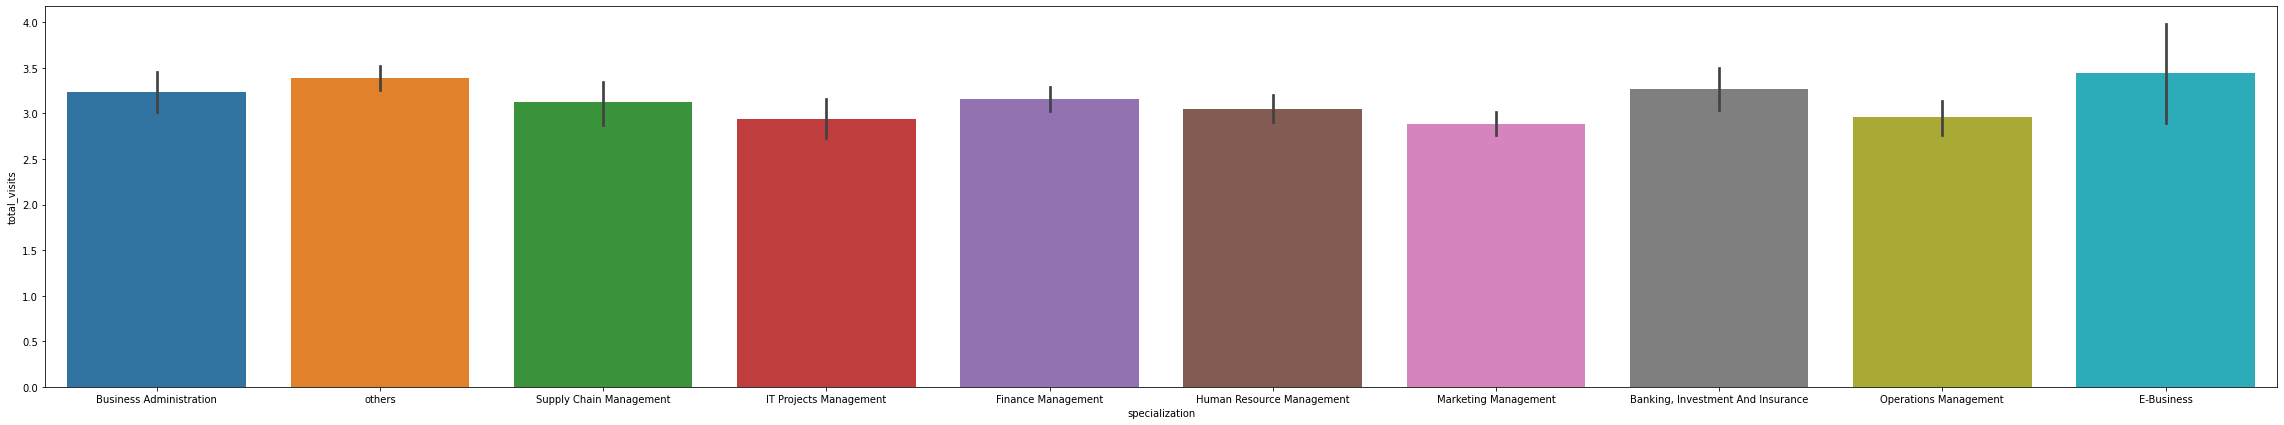

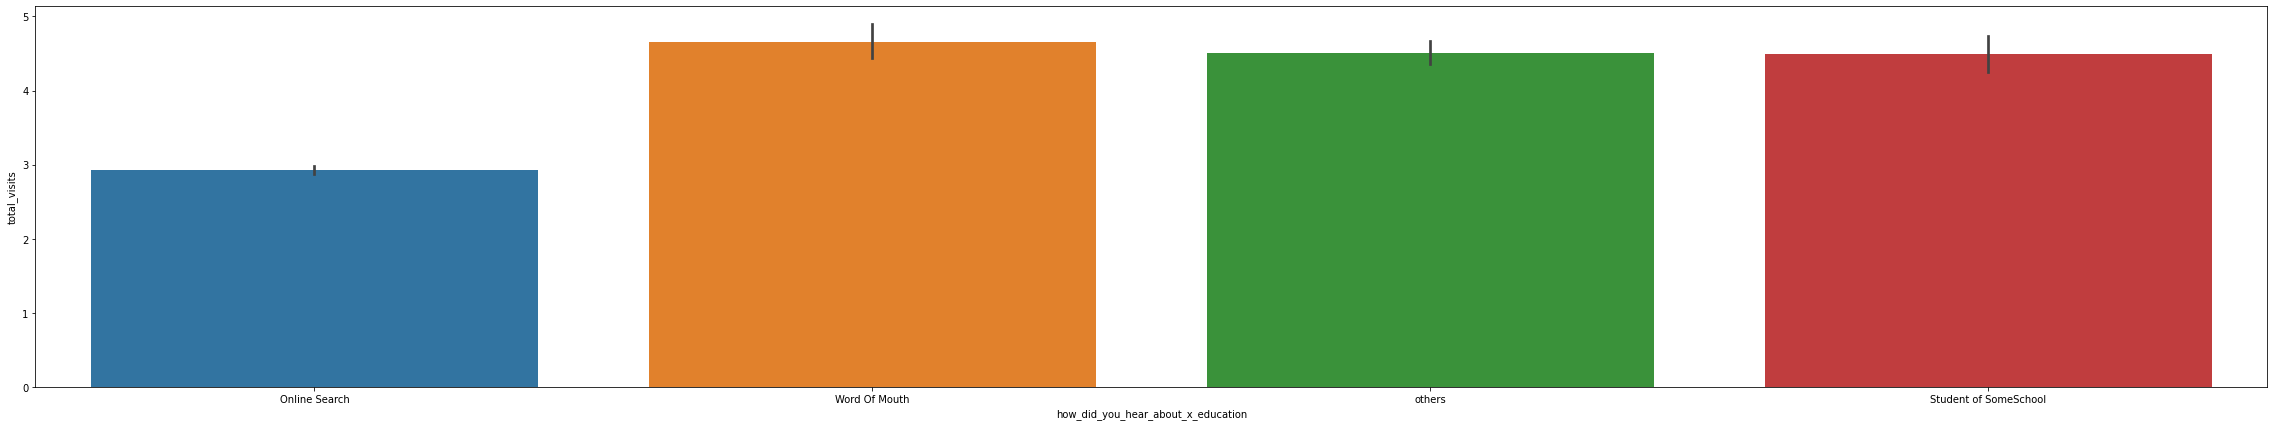

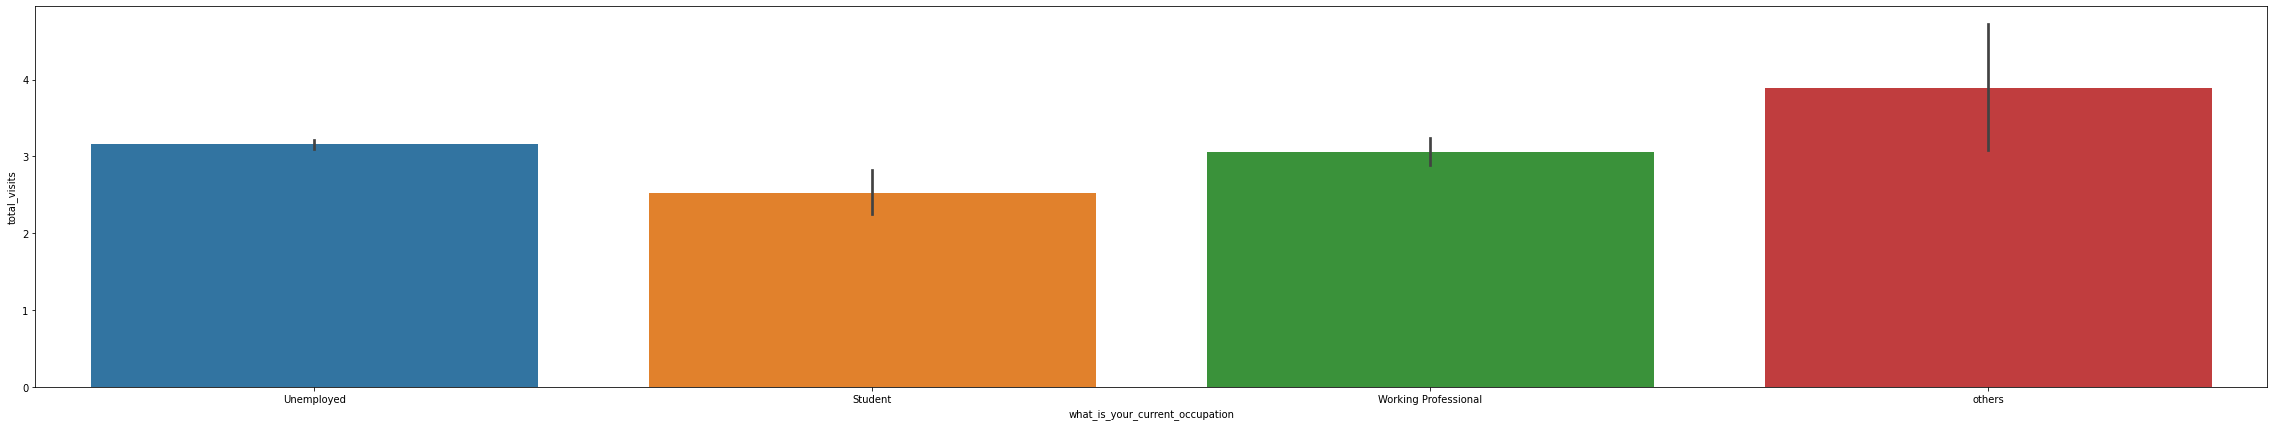

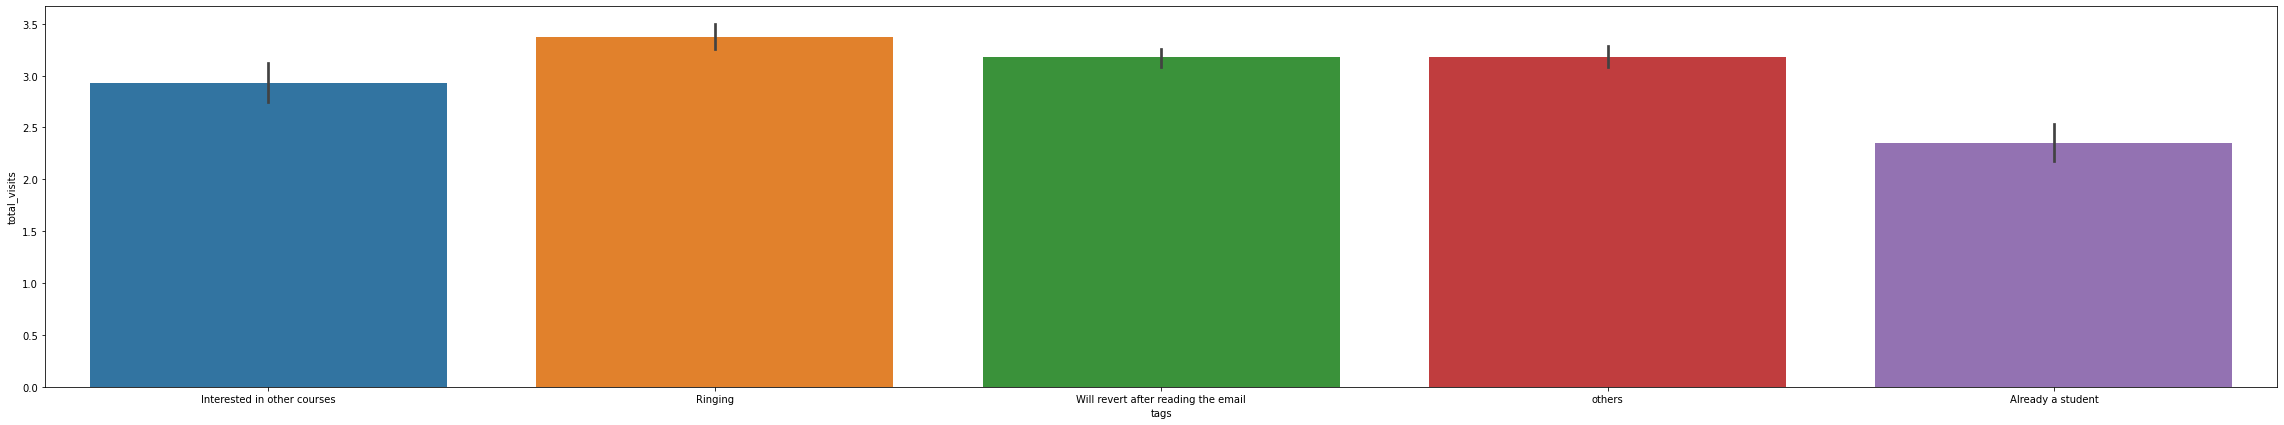

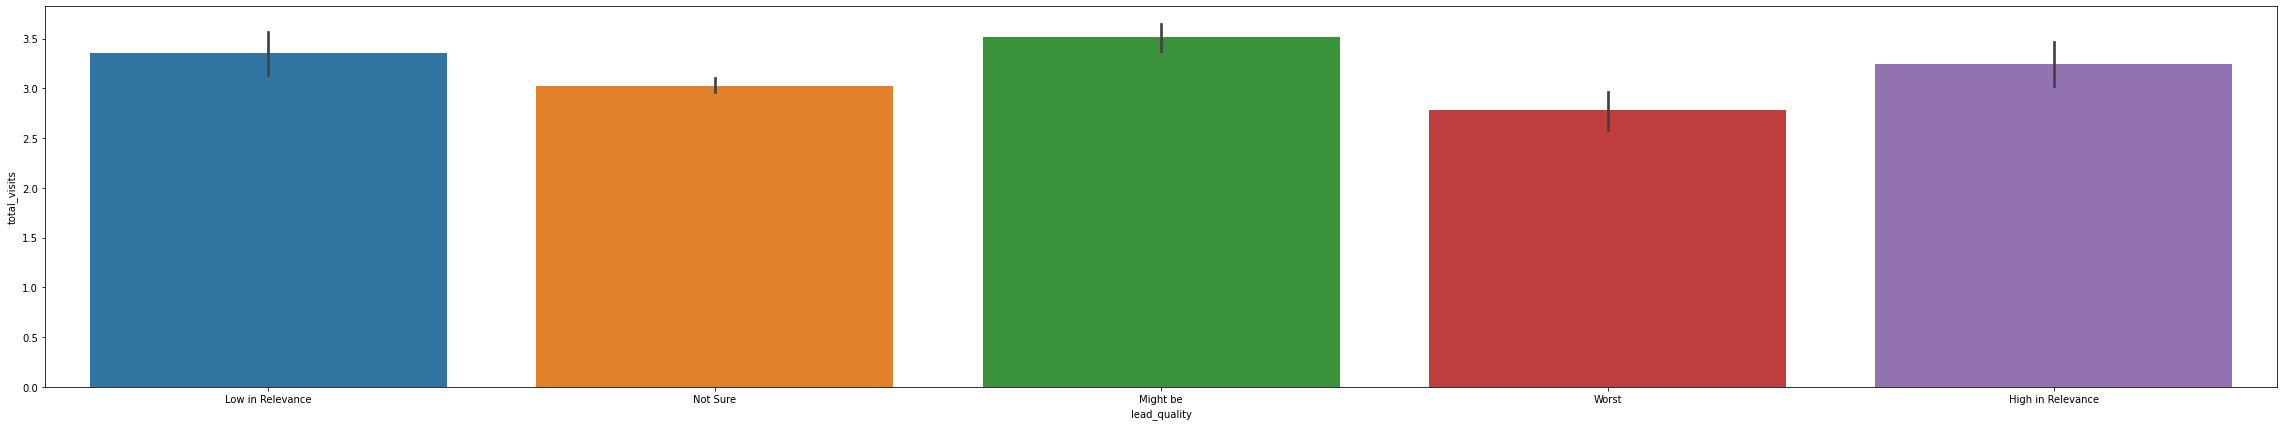

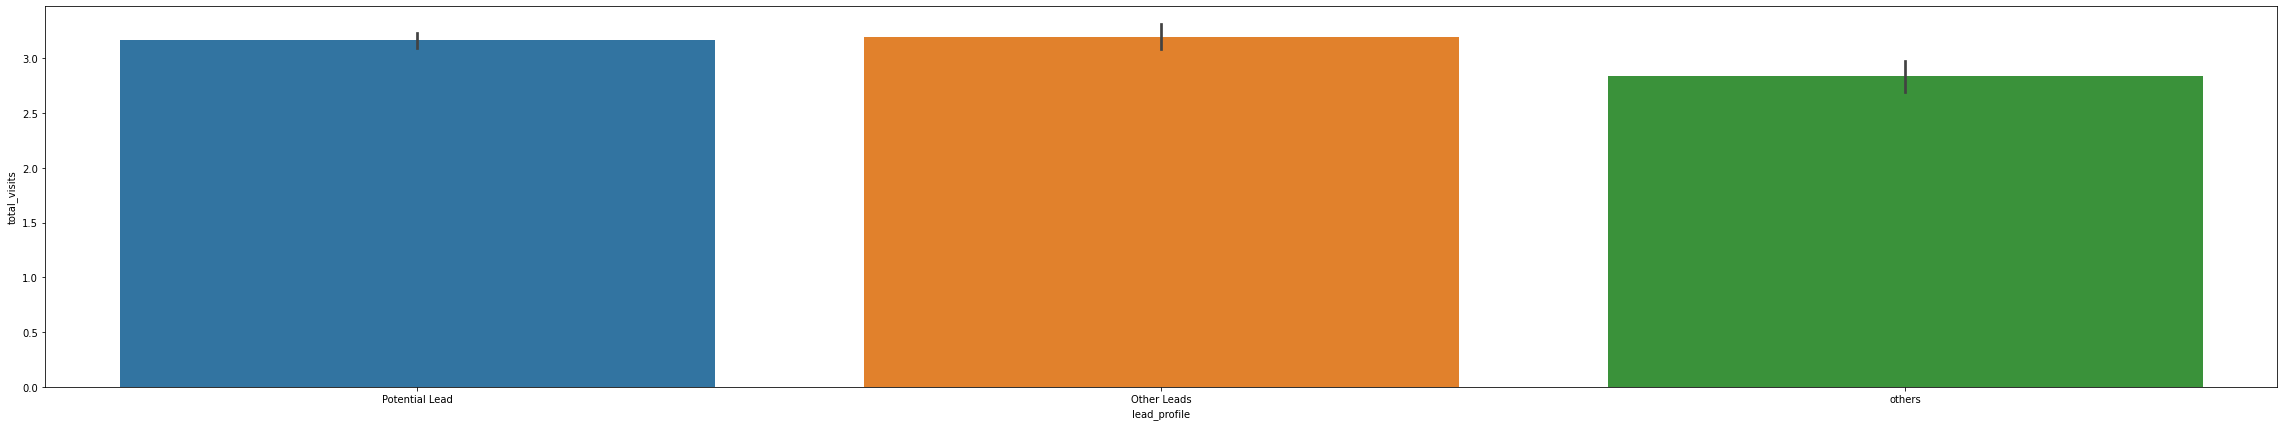

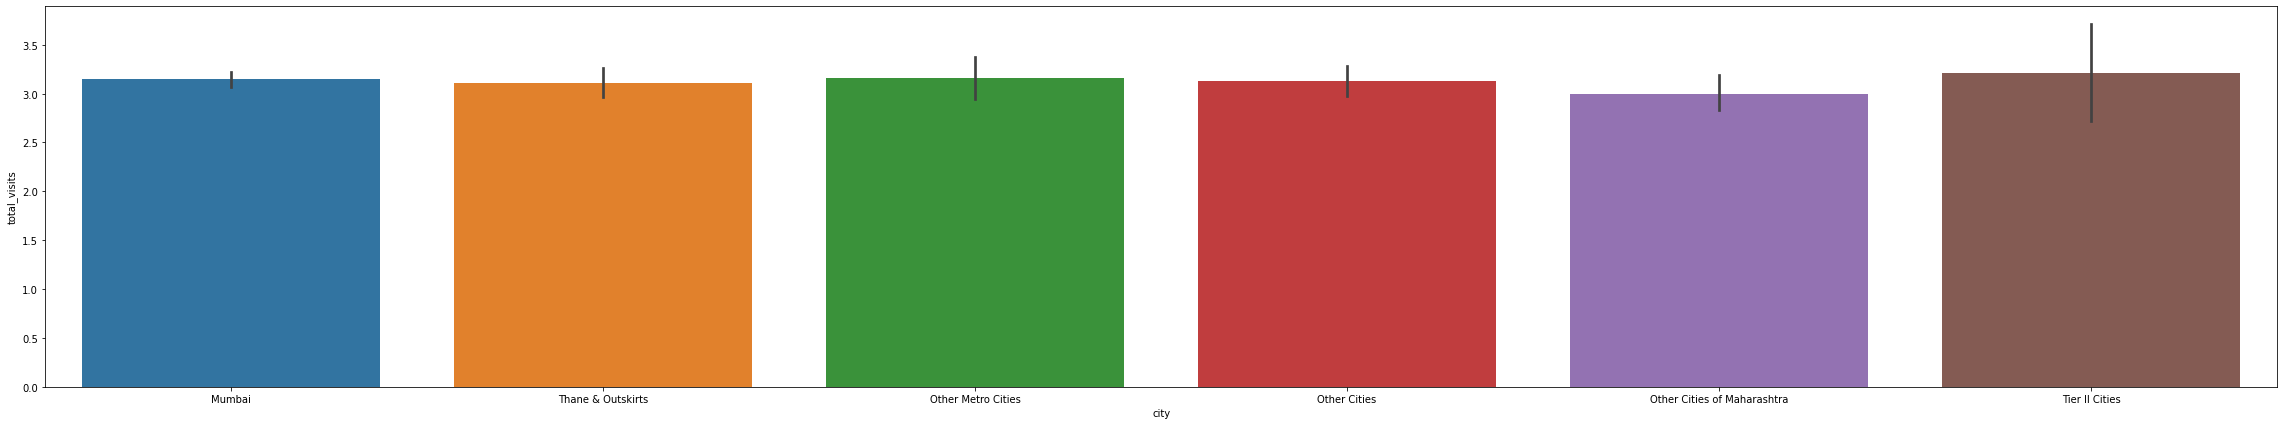

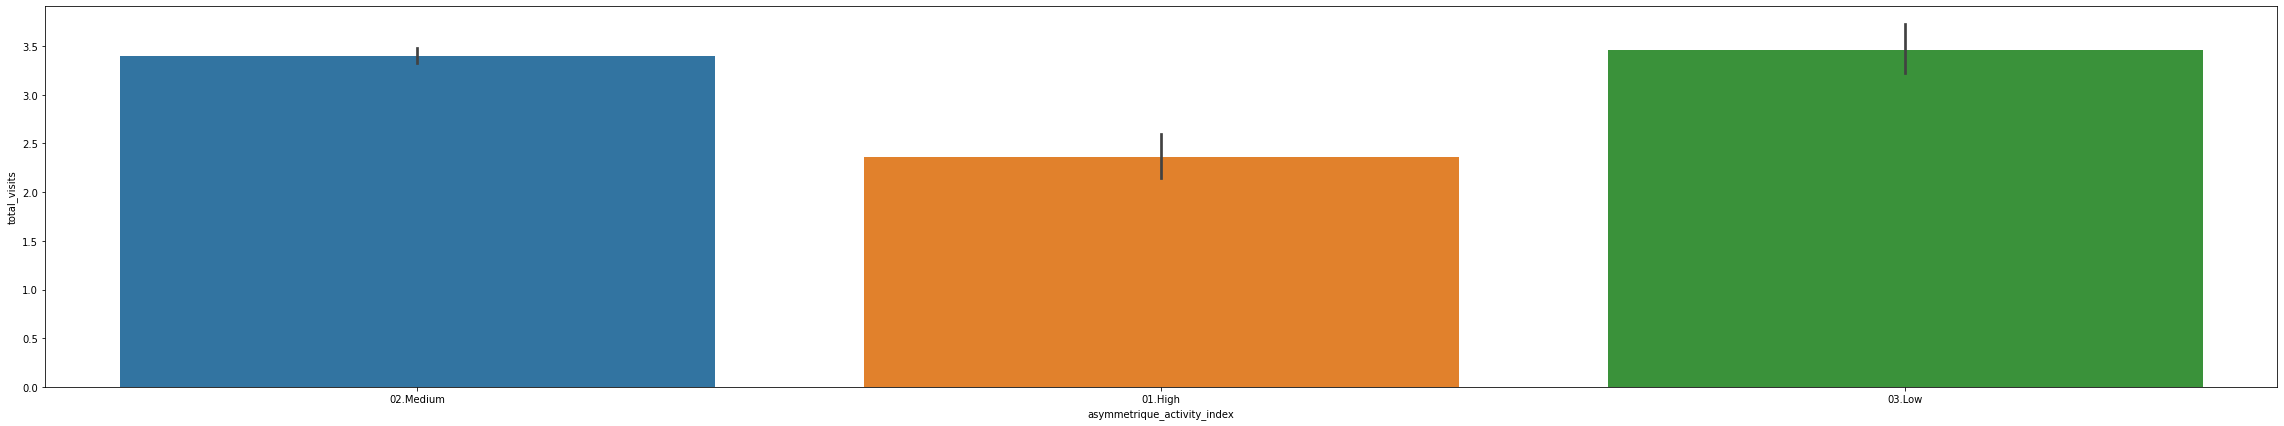

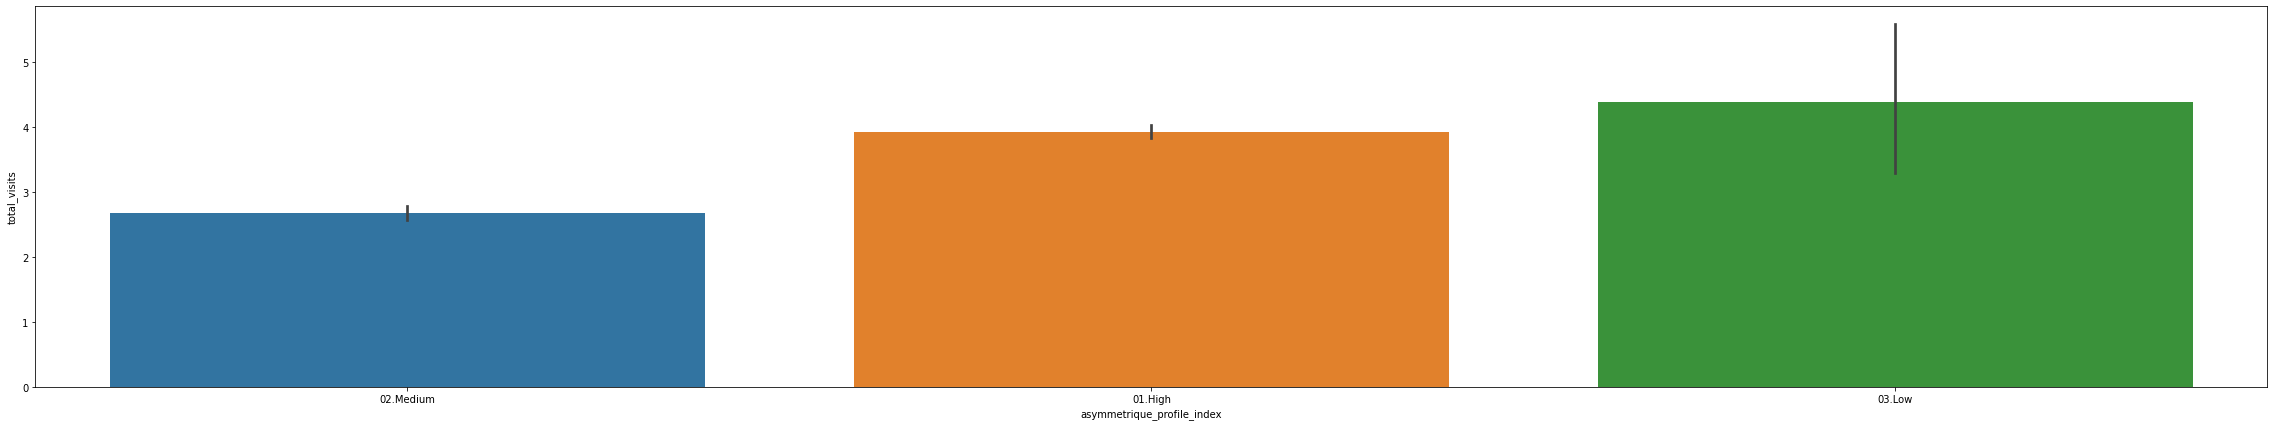

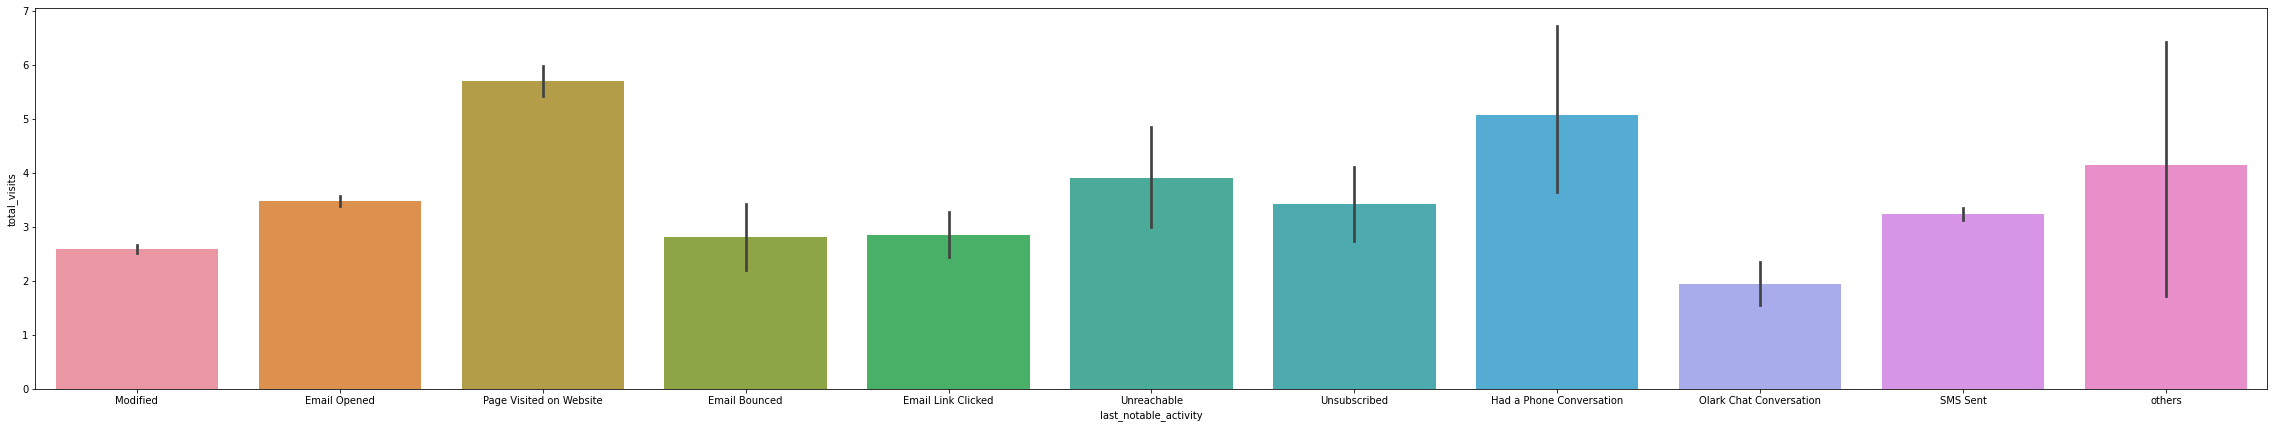

In [ ]:
for i in LS_cat.columns:
  fig=plt.subplots(figsize=(40,7))
  sns.barplot(x=LS_cat[i],y=LS_num['total_visits'])
  #sns.stripplot(LS_cat[i], y=LS_num['total_visits'],ax=ax[1])
  plt.show()

**Inference from Bivariate Analysis of Categorical vs Numerical Columns:**

1. Total visit vs Lead Origin ~ API , Landing Page submission and Others the highest source of Total visits on the website. 
2. Total visit vs Lead Source ~ Customers through Organic Search and Direct Traffic has visited the websites most.
3. Total visit vs How did you hear about X Education ~ Students who spent significant amount of time on the website heard about X Education through Word Of Mouth, Student of Some School and others
4. Total visit vs What is your current occupation ~ Most of the leads who have visited the website are unemployed (5600) or others
5. Total visit vs Tags ~People who spent a significant amount of time on the website Will revert after reading the email or not has responded on touchpoint call. 
6. Total visit vs Lead Quality ~ People who have visited the max number of times are assessed as relevant leads. 
7. Total visit vs Lead Profile ~ People who have visited the max number of times on the website are Potential leads and other leads.
8. Total visit vs City ~ Customer from Tier2 cities have visited the website max times.


In [ ]:
for i in LS_cat.columns:
  fig,ax =  plt.subplots(1,2, figsize=(35,12))
  sns.boxplot(x=LS_cat[i],y=LS_num['total_time_spent_on_website'], ax=ax[0])
  sns.stripplot(LS_cat[i], y=LS_num['total_time_spent_on_website'], ax=ax[1])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

1.Total Time spent on Website vs Lead Origin ~ Leads from Landing Page Submission and API spend the highest time on the website. 
2.Total Time spent on Website vs Lead Score ~ Organic Search , Direct Traffic and Google students spend the highest time on the website. 
3.Total Time spent on Website vs last Activity In reference to the time spent on the website the student most specific activity was SMS Sent, Page Visited on Website and Email Opened.
4. Total Time spent on Website vs How did you hear about X Education ~ Students who spent significant amount of time on the website heard about X Education through Online Search , Word Of Mouth or Student of Some School.
5. Total Time spent on Website vs What is your current occupation ~ A significant number of students who have visited the website are unemployed and Working Professional
6. Total Time spent on Website vs Tags ~People who spent a significant amount of time on the website Will revert after reading the email.
7.Total Time spent on website vs Lead Quality ~ People who have spent high time on the website are assessed as relevant leads. 

8. Total Time spent on website vs Lead Profile ~ People who have spent high time on the website on the website are Potential leads and other leads.

9. Total Time spent on website vs City ~ Leads from Mumbai have spent high time on the website.

10. Total Time spent on website vs Last Notable Activity- Leads who have spent high time on website notable open Emails, send SMS, and Modify accounts



In [ ]:
LS.asymmetrique_profile_index.value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: asymmetrique_profile_index, dtype: int64

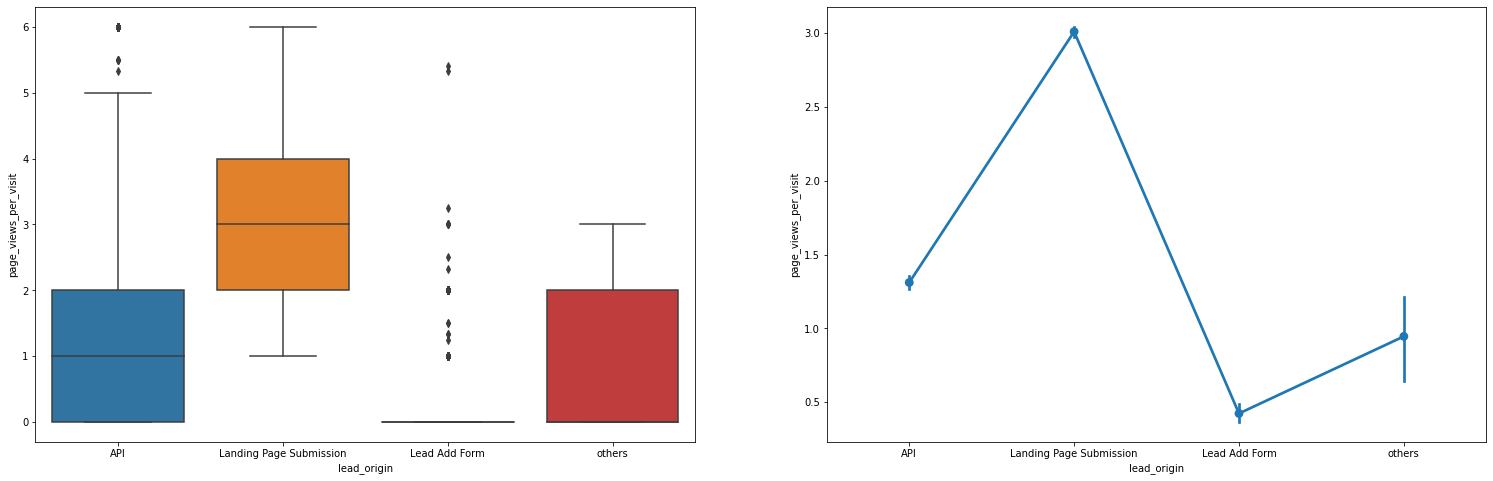

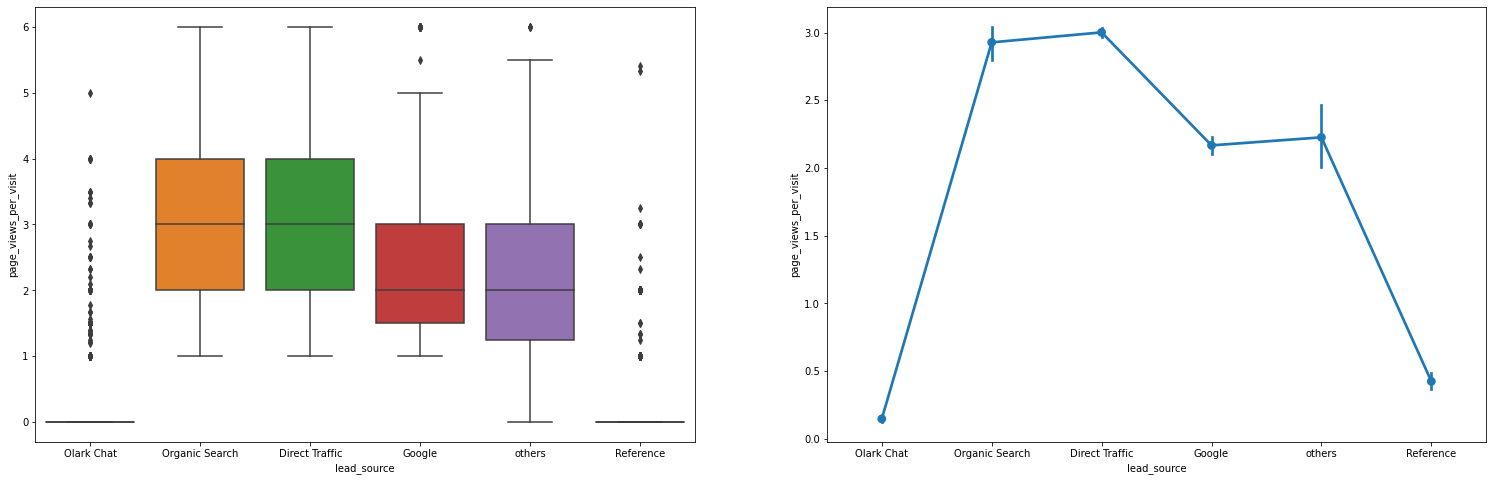

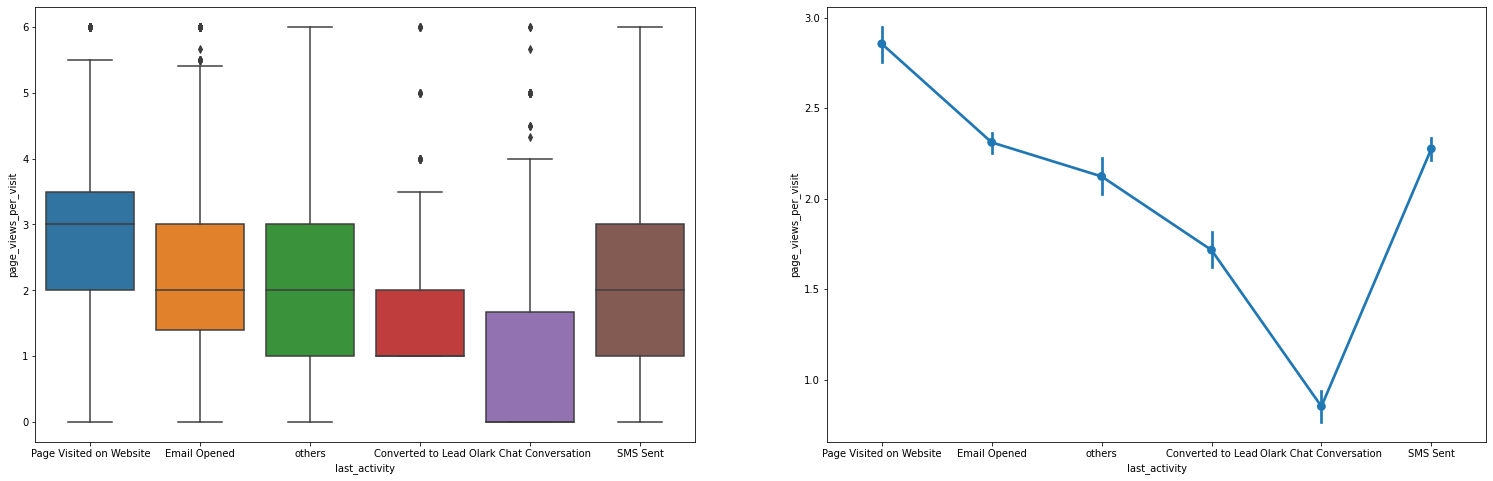

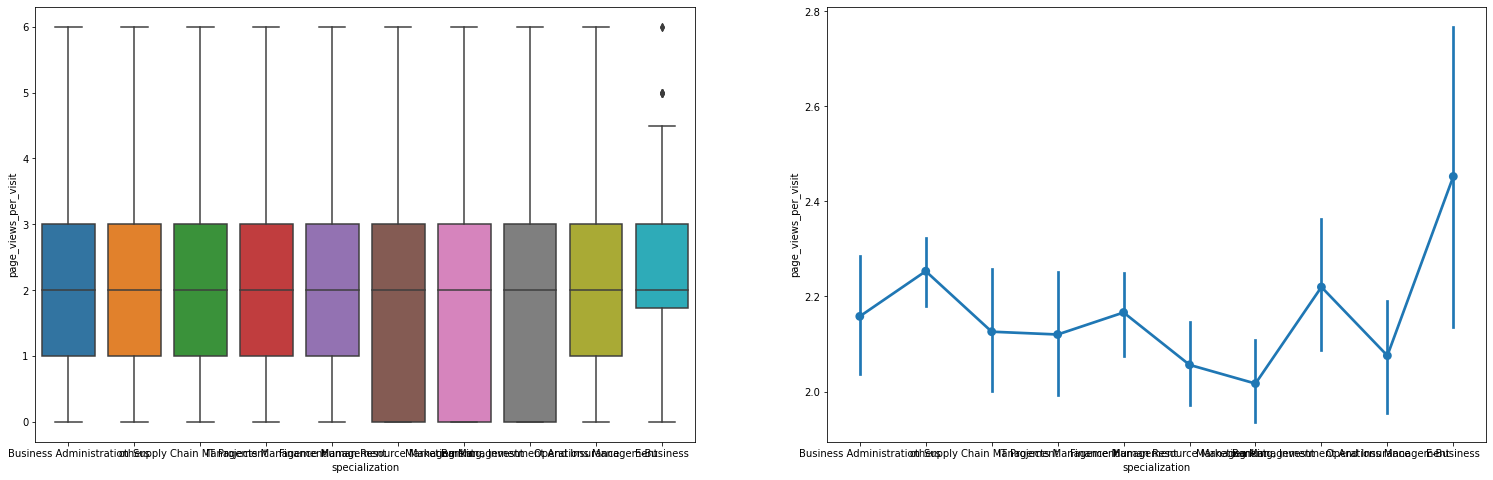

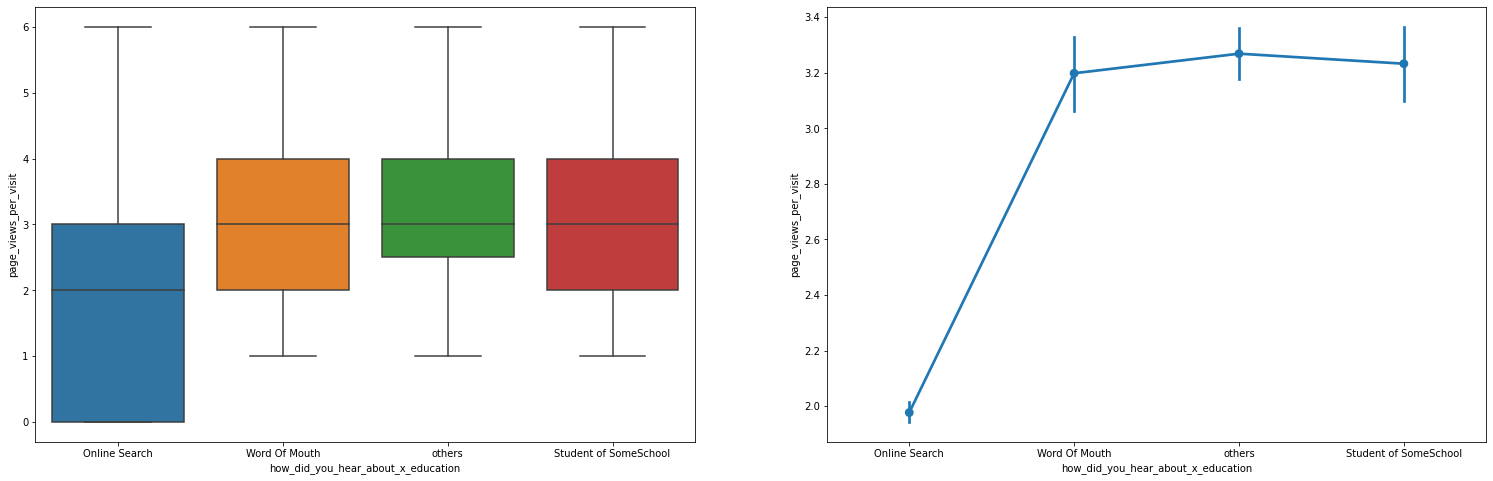

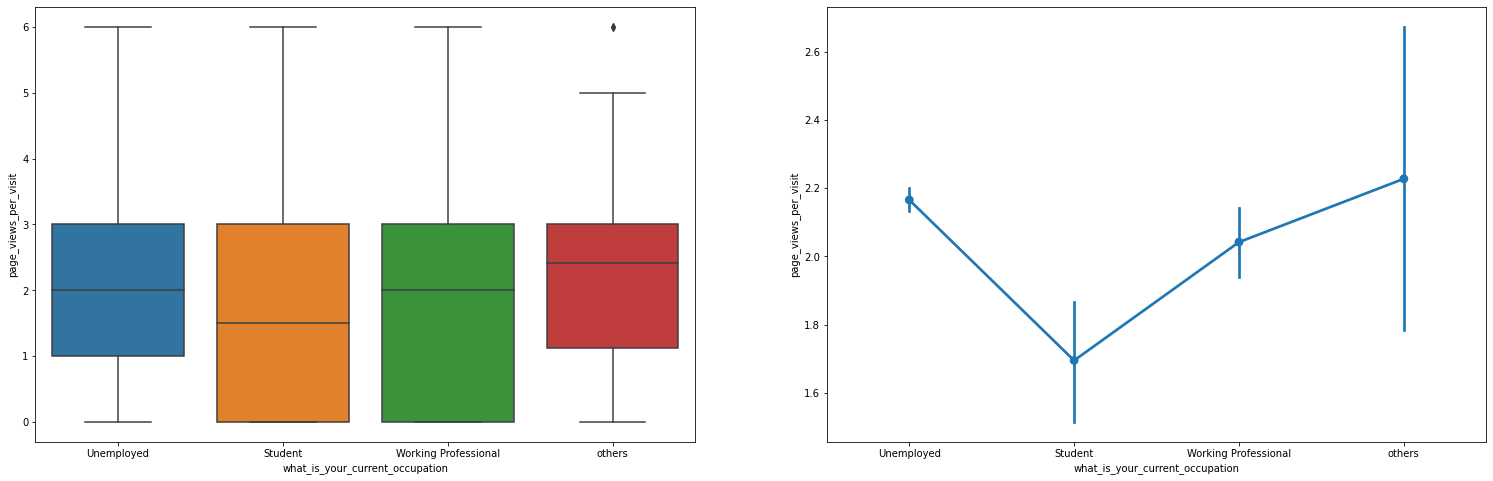

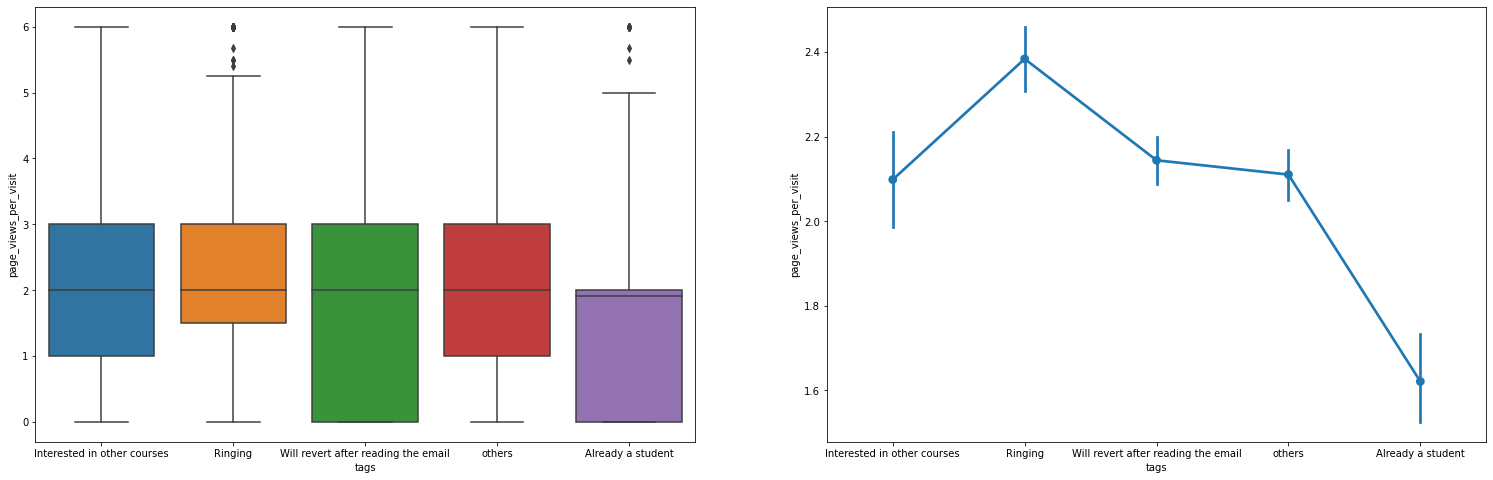

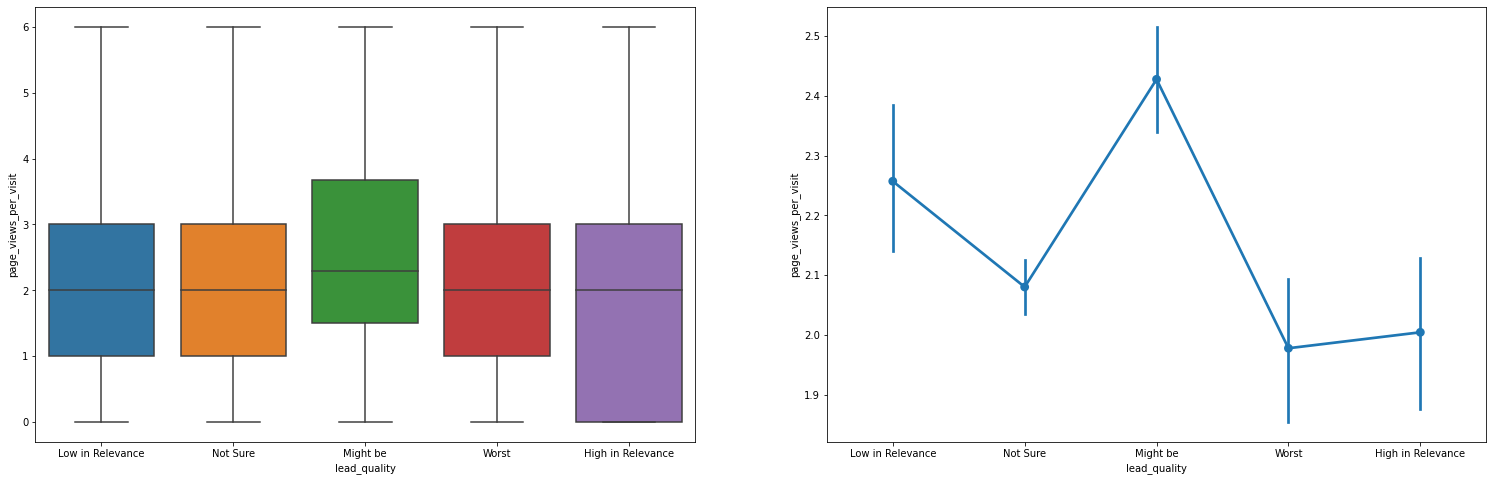

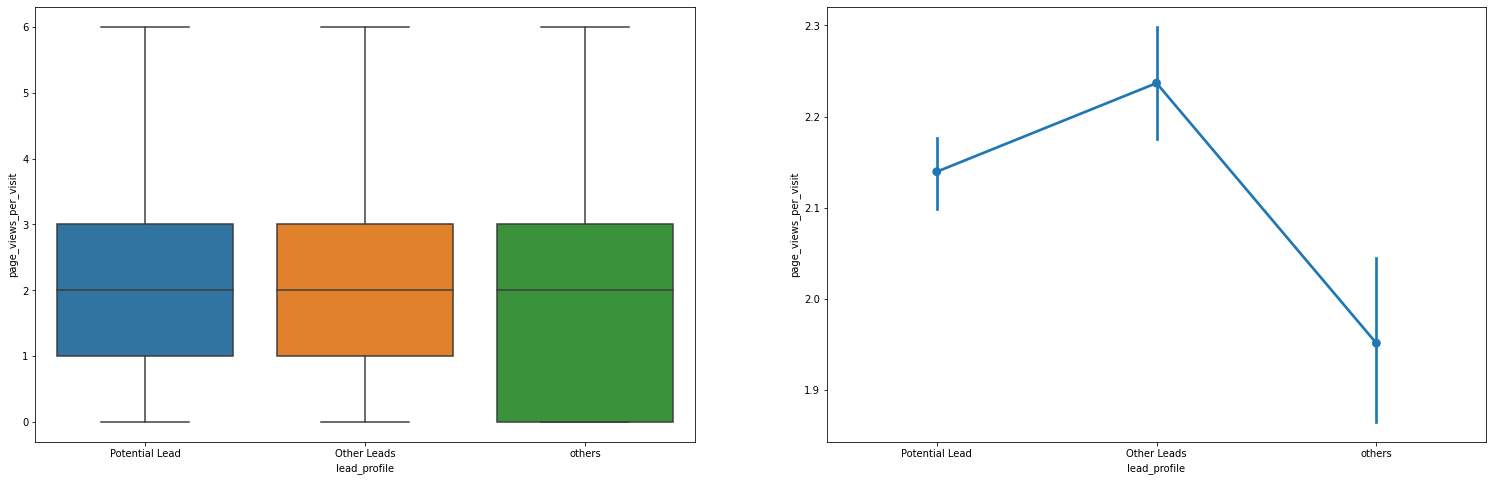

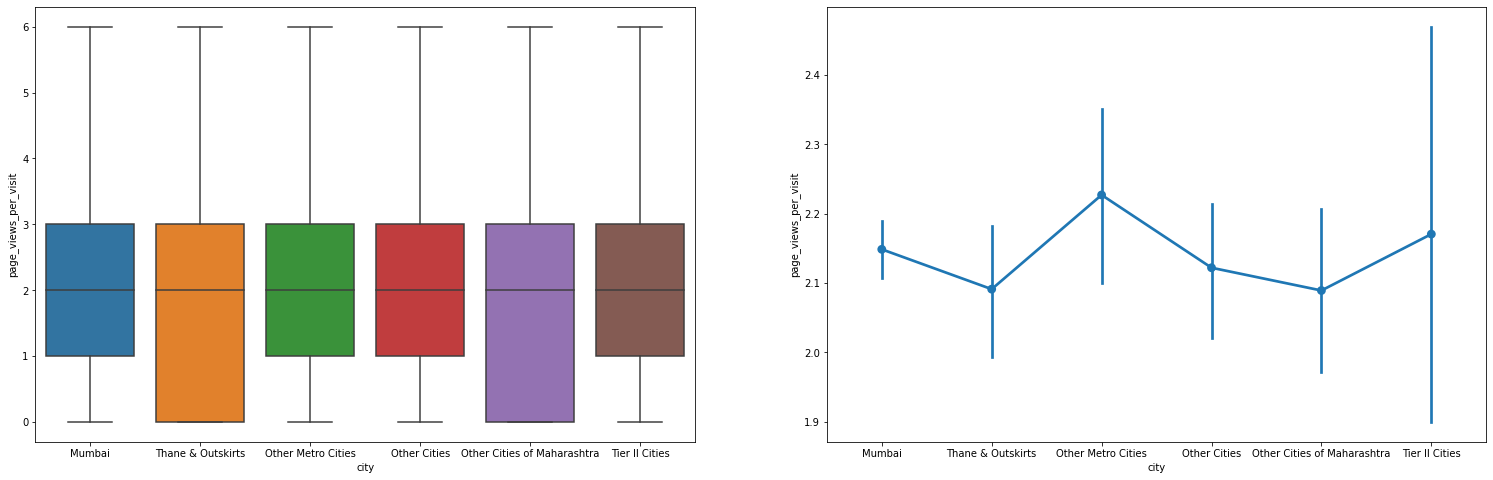

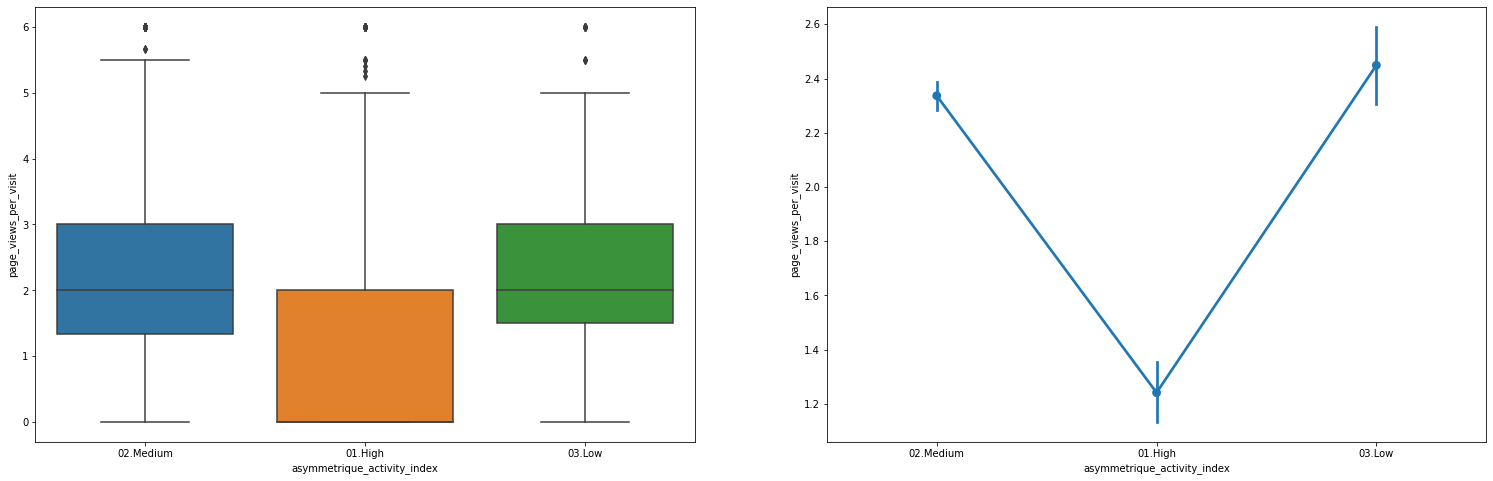

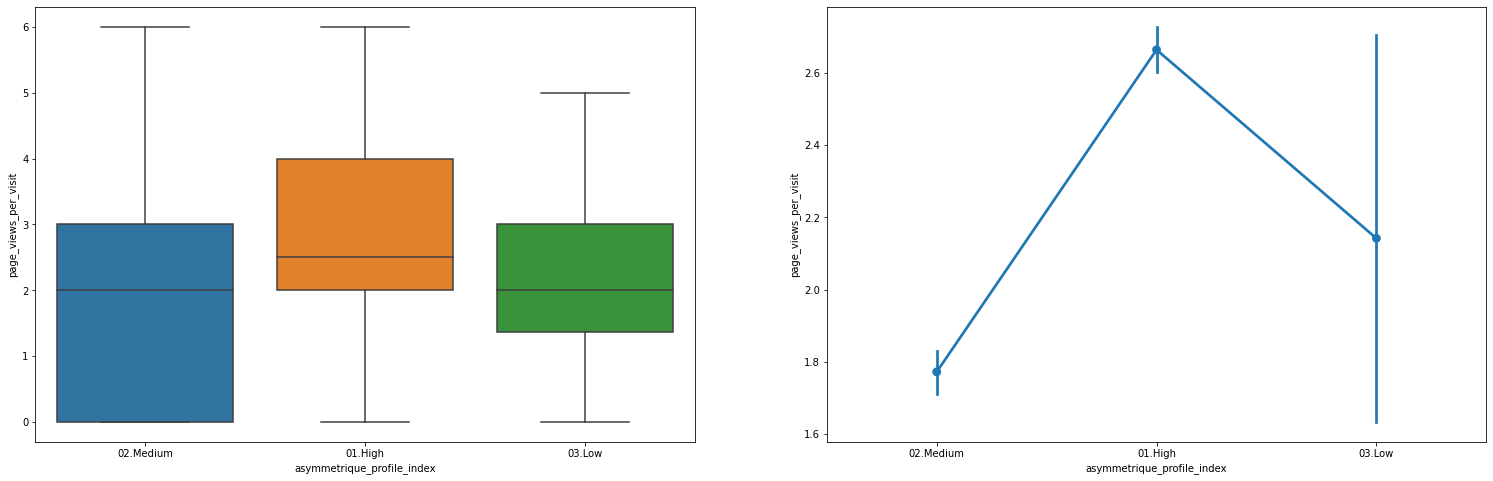

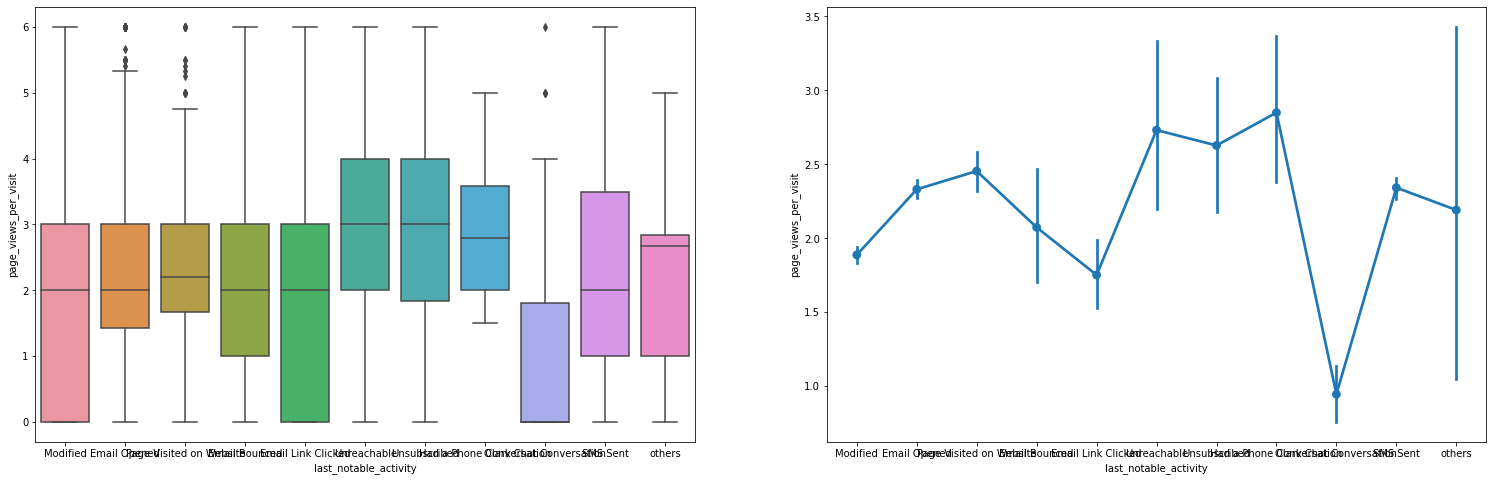

In [ ]:
for i in LS_cat.columns:
  fig, ax=  plt.subplots(1, 2, figsize=(26,8))
  sns.boxplot(x=LS_cat[i],y=LS_num['page_views_per_visit'],ax=ax[0])
  sns.pointplot(LS_cat[i], y=LS_num['page_views_per_visit'], ax=ax[1])
  plt.show()

1. Page views per visit vs Lead Origin ~ Leads from Landing Page Submission spend the highest time on the website. 
2. Page views per visit vs Lead Score ~ Direct Traffic generates the highest views 
3. Page views per visit vs How did you hear about X Education ~ Word Of Mouth and Student of Some School generates lower views. Other sources generate the highest views
4. Page views per visit vs What is your current occupation ~ Unemployed and Working Professional generates lower views. Other occupation has generated the highest views
5. Page views per visit on Website vs Tags ~ Will revert after reading mail generates lower views. Touchpoint call/Ringing has generated the highest views
6. Page views per visit vs Lead Quality ~ Leads who generate high page visits, generally who compare between courses, are assessed as might be
7. Page views per visit vs Lead Profile ~ Leads who generate high page visits, generally who compare between courses, are assigned to Other Leads

8. Page views per visit vs City ~ Leads from Mumbai generates lower views. Other cities has generated the highest views

## Categorical- Categorical



In [ ]:
LS_cat.columns

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city',
       'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'last_notable_activity'],
      dtype='object')

In [ ]:
LS_cat.drop(['asymmetrique_activity_index', 'asymmetrique_profile_index'],axis=1,inplace=True)

In [ ]:
LS_cat.columns

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city',
       'last_notable_activity'],
      dtype='object')

<Figure size 1800x1080 with 0 Axes>

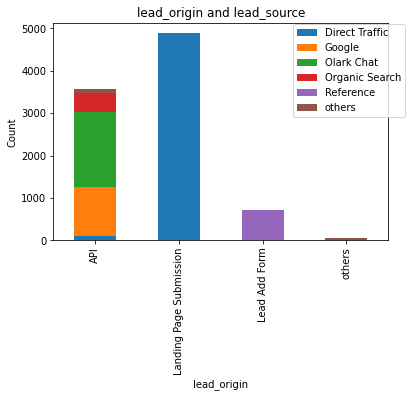

<Figure size 1800x1080 with 0 Axes>

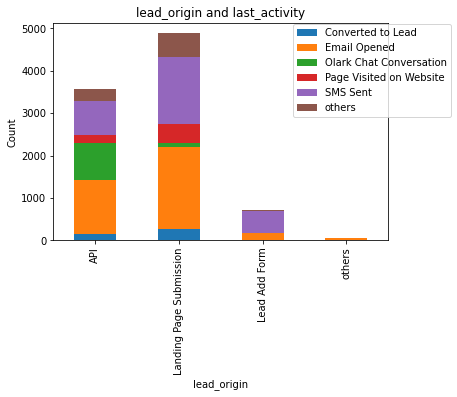

<Figure size 1800x1080 with 0 Axes>

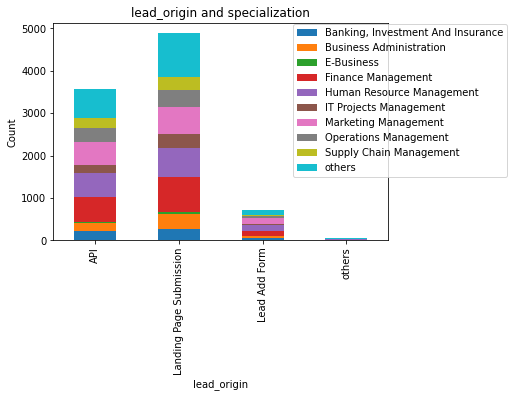

<Figure size 1800x1080 with 0 Axes>

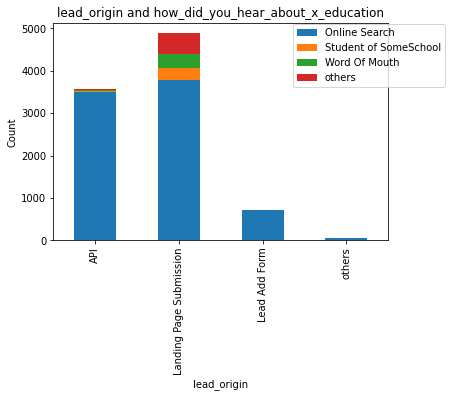

<Figure size 1800x1080 with 0 Axes>

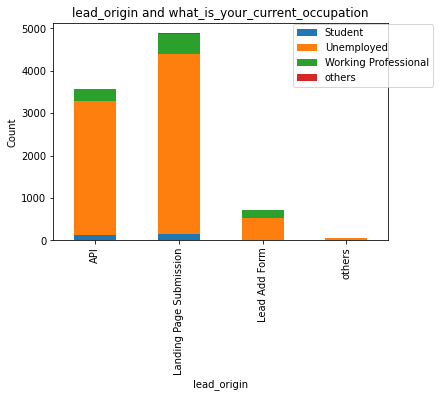

<Figure size 1800x1080 with 0 Axes>

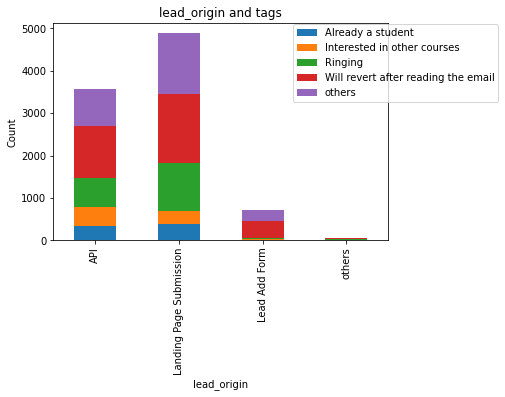

<Figure size 1800x1080 with 0 Axes>

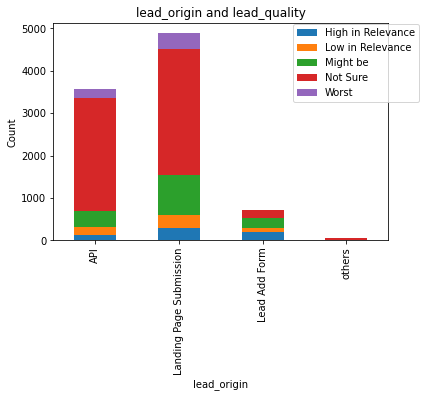

<Figure size 1800x1080 with 0 Axes>

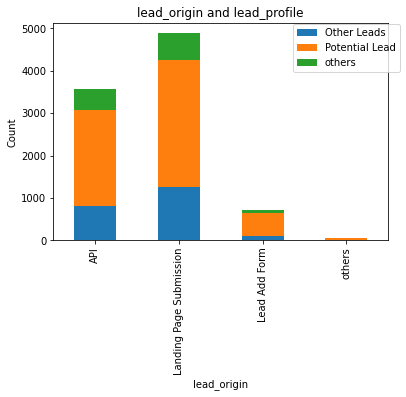

<Figure size 1800x1080 with 0 Axes>

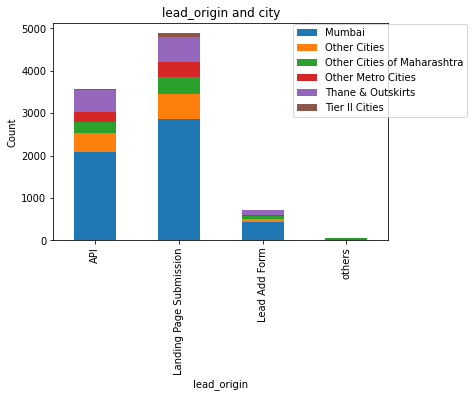

<Figure size 1800x1080 with 0 Axes>

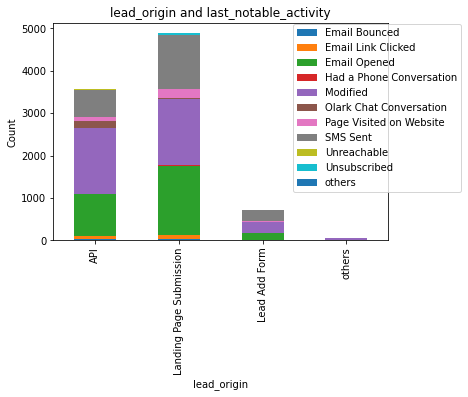

In [ ]:
for i in LS_cat.columns[1:]:
    tab = pd.crosstab(index=LS['lead_origin'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('lead_origin')
    plt.ylabel('Count')
    plt.title('lead_origin and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

**Lead_origin inferences:  Majority of the leads who were from Landing page submissions and API**
1.	lead source: Majority of the leads were from Landing page submissions and API with the source for leads being Google, Direct Traffic to X education website and also from sources like Olark chat and organic search
2.	last_activity:, their last activity majorly was with opening the emails and interaction through SMS.
3.	specialization: Human Resource Management and Marketing Management and highest in Others
4.	how_did_you_hear_about_x_education: Online Search and Others.
5.	Lead_origin and what_is_your_current_occupation : Unemployed.
6.	tags: tagged as Would revert  back after reading the mail and Others
7.	lead_quality assessed as  Not Sure.
8.	lead_profile: assigned as Potential Lead
9.	city: Majority of the leads who were from Landing page submissions and API have their city to be Mumbai.
10.	last_notable_activity: Majority of the leads who were from Landing page submissions and API have opened the Email, sent SMS and Modified.


<Figure size 1800x1080 with 0 Axes>

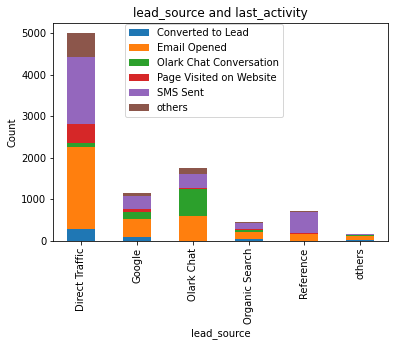

<Figure size 1800x1080 with 0 Axes>

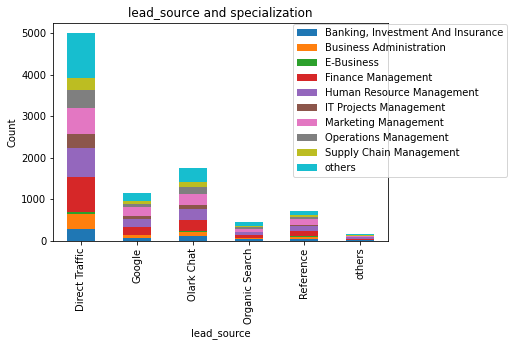

<Figure size 1800x1080 with 0 Axes>

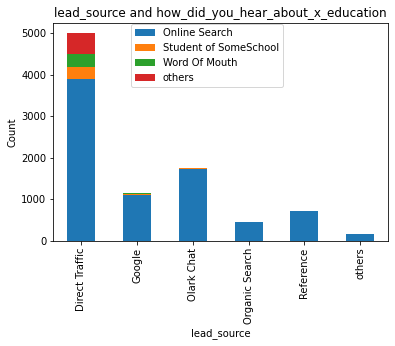

<Figure size 1800x1080 with 0 Axes>

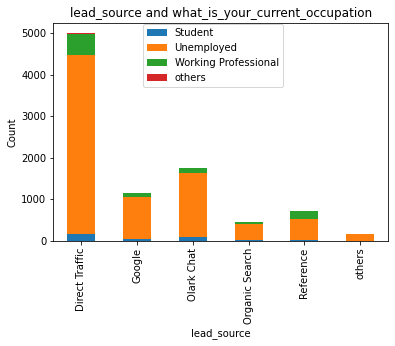

<Figure size 1800x1080 with 0 Axes>

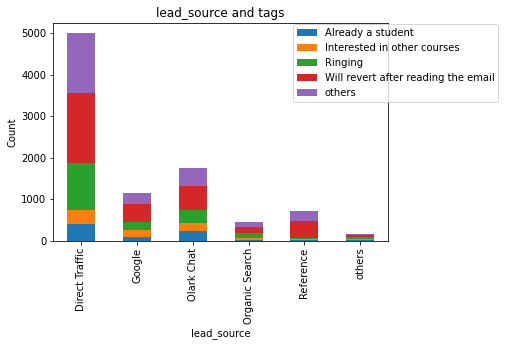

<Figure size 1800x1080 with 0 Axes>

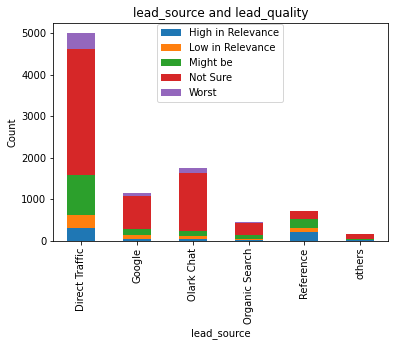

<Figure size 1800x1080 with 0 Axes>

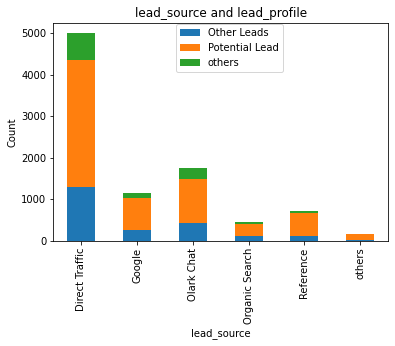

<Figure size 1800x1080 with 0 Axes>

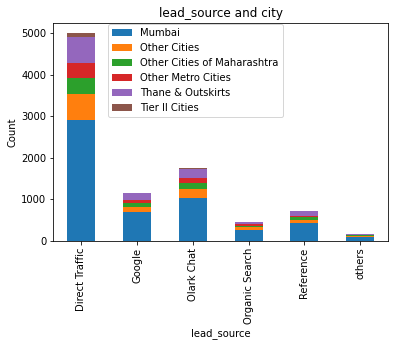

<Figure size 1800x1080 with 0 Axes>

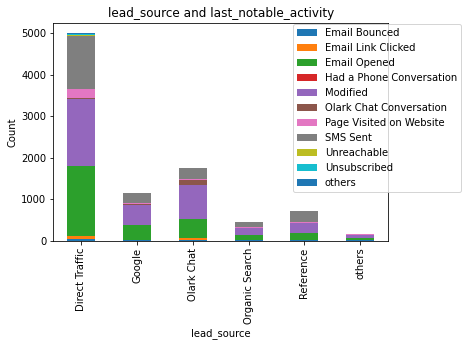

In [ ]:
for i in LS_cat.columns[2:]:
    tab = pd.crosstab(index=LS['lead_source'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('lead_source')
    plt.ylabel('Count')
    plt.title('lead_source and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

**Lead_source inferences: Majority of the lead source were from Direct Traffic, Olark Chat and Google**
1.	last_activity: majorly was with opening the emails and interaction through SMS.
2.	specialization: specialize in Finance Management and Human Resource Management but highest numbers is for Others
3.	how_did_you_hear_about_x_education: Online search
4.	 what_is_your_current_occupation: Unemployed
5.	tags: tagged as Would revert back after reading the mail and Others
6.	lead source and lead_quality: assigned to the lead have their lead_quality to be Not Sure.
7.	lead source and lead_profile: assigned as Potential Lead
8.	lead source and city: their city to be Mumbai.
9.	last_notable_activity: have Modified, opened Email or sent SMS


<Figure size 1800x1080 with 0 Axes>

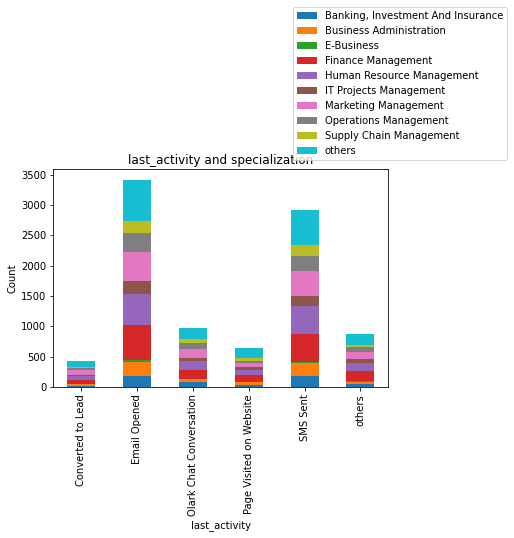

<Figure size 1800x1080 with 0 Axes>

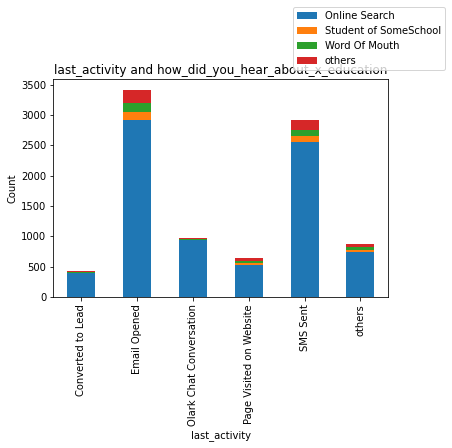

<Figure size 1800x1080 with 0 Axes>

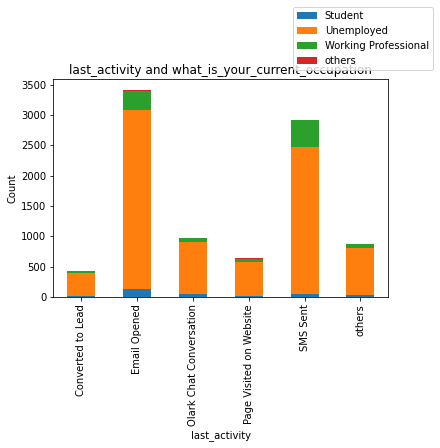

<Figure size 1800x1080 with 0 Axes>

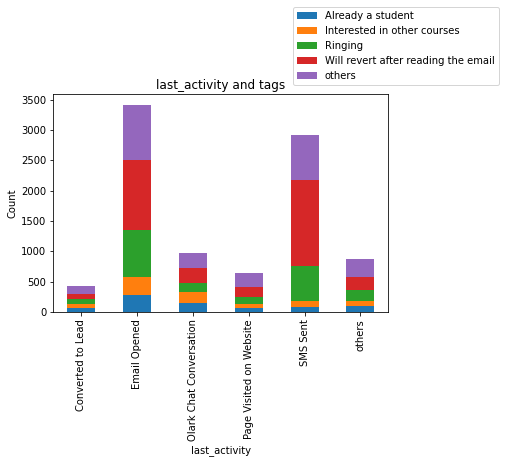

<Figure size 1800x1080 with 0 Axes>

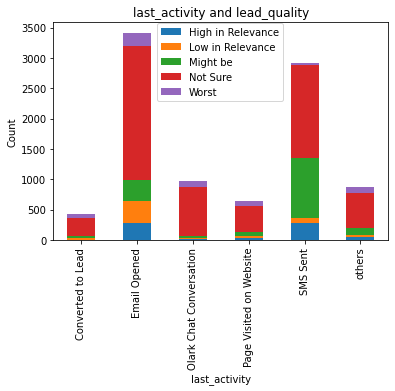

<Figure size 1800x1080 with 0 Axes>

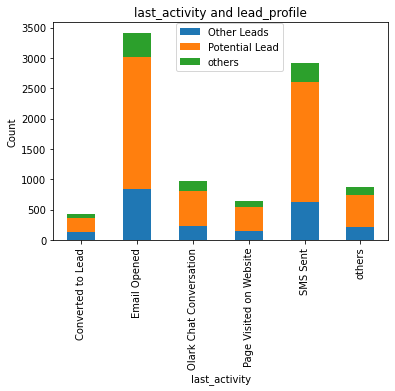

<Figure size 1800x1080 with 0 Axes>

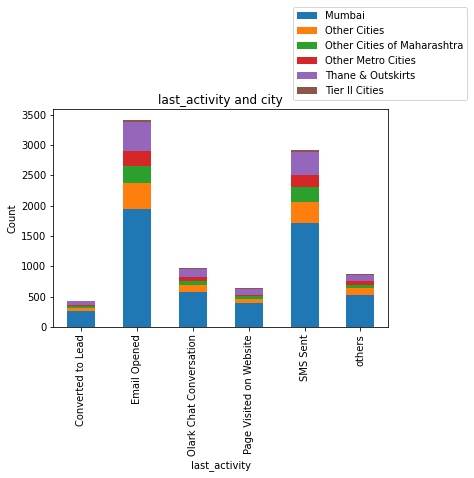

<Figure size 1800x1080 with 0 Axes>

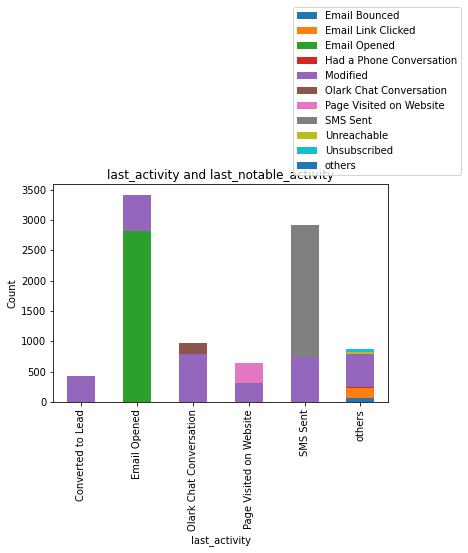

In [ ]:
for i in LS_cat.columns[3:]:
    tab = pd.crosstab(index=LS['last_activity'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('last_activity')
    plt.ylabel('Count')
    plt.title('last_activity and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

**Last_activity inferences:   Modified,  Email Opened or Sent SMS**
1.	specialization: specialize in Finance Management and Human Resource Management but highest numbers is for Others
2.	how_did_you_hear_about_x_education: Online search
3.	what_is_your_current_occupation: Unemployed
4.	tags: tagged as Would revert back after reading the mail, Ringing and Others
5.	lead source and lead_quality: Most leads who opened their Email were assigned lead quality as Not Sure ad who  Sent SMS were assigned Not Sure and Might Be
6.	lead source and lead_profile: assigned as Potential Lead
7.	lead source and city: their city to be Mumbai.
8.	last_notable_activity: Leads generally Modified account after Email opening, sending SMS or Converted to Lead 


<Figure size 1800x1080 with 0 Axes>

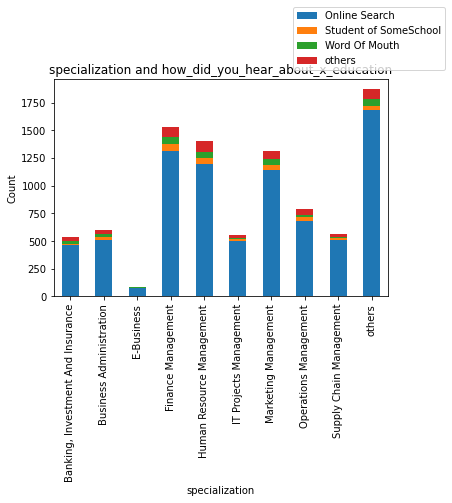

<Figure size 1800x1080 with 0 Axes>

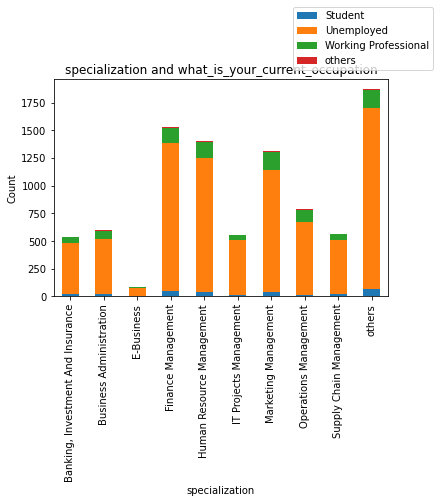

<Figure size 1800x1080 with 0 Axes>

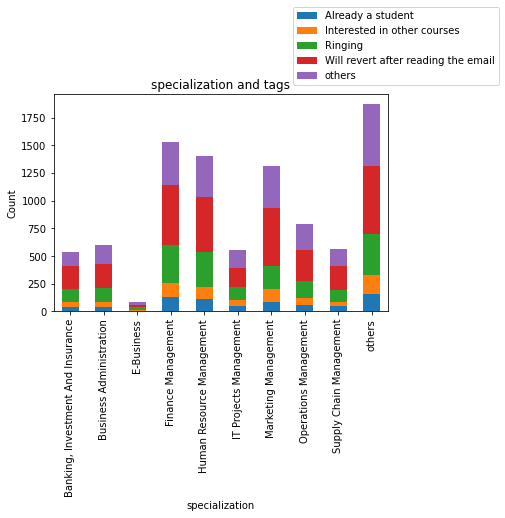

<Figure size 1800x1080 with 0 Axes>

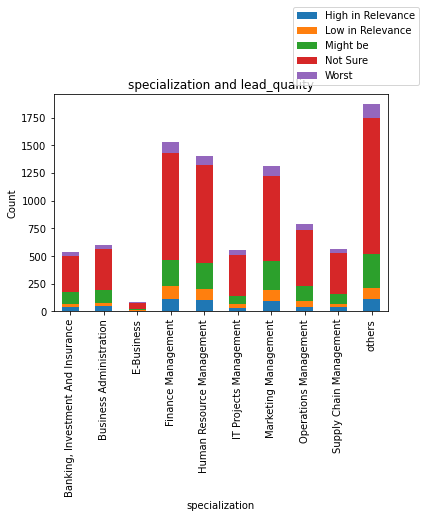

<Figure size 1800x1080 with 0 Axes>

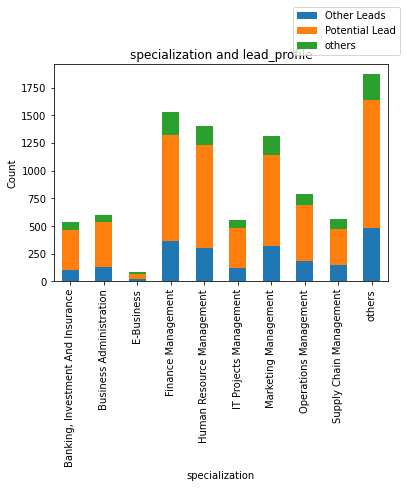

<Figure size 1800x1080 with 0 Axes>

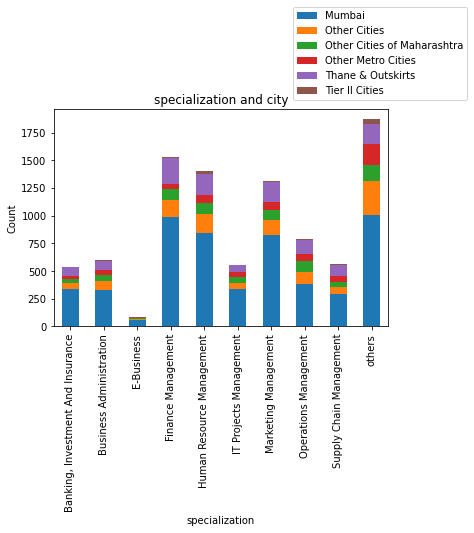

<Figure size 1800x1080 with 0 Axes>

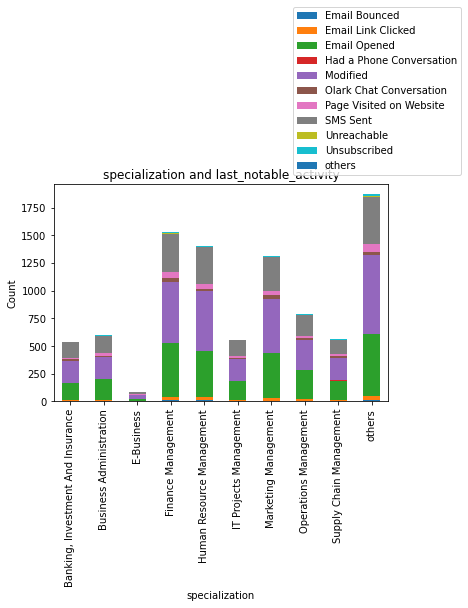

In [ ]:
for i in LS_cat.columns[4:]:
    tab = pd.crosstab(index=LS['specialization'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('specialization')
    plt.ylabel('Count')
    plt.title('specialization and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

**Specialization: majority of the lead have previously worked before in Finance Management, Human Resource Management and Marketing Management, but highest number of leads have worked in Others domain**
1.	how_did_you_hear_about_x_education: Online search
2.	what_is_your_current_occupation: Unemployed
3.	tags: tagged as Would revert back after reading the mail, Ringing and highest in Others
4.	lead_quality:  assigned lead quality as Not Sure 
5.	lead_profile: assigned as Potential Lead and few as other leads 
6.	city: their city to be Mumbai.
7.	last_notable_activity: have Modified, opened Email or sent SMS


<Figure size 1800x1080 with 0 Axes>

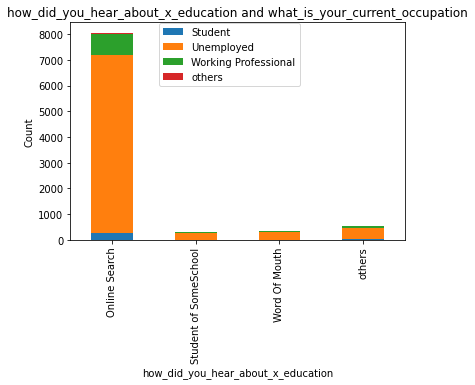

<Figure size 1800x1080 with 0 Axes>

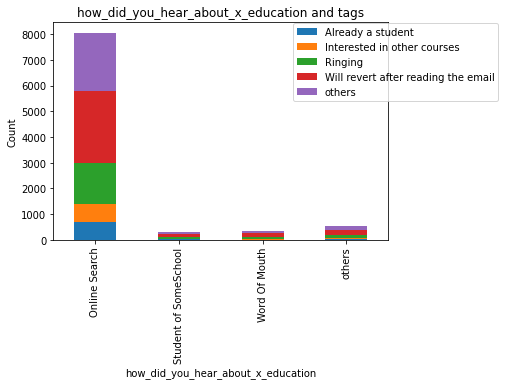

<Figure size 1800x1080 with 0 Axes>

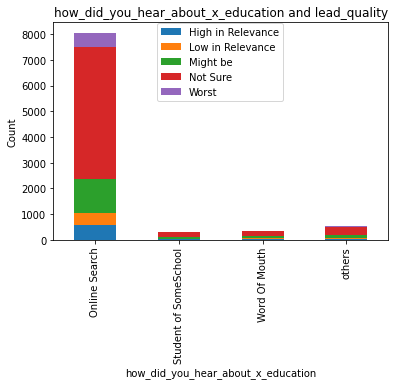

<Figure size 1800x1080 with 0 Axes>

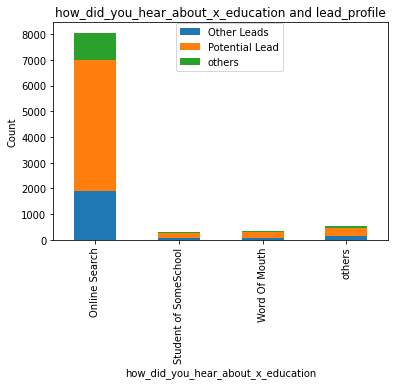

<Figure size 1800x1080 with 0 Axes>

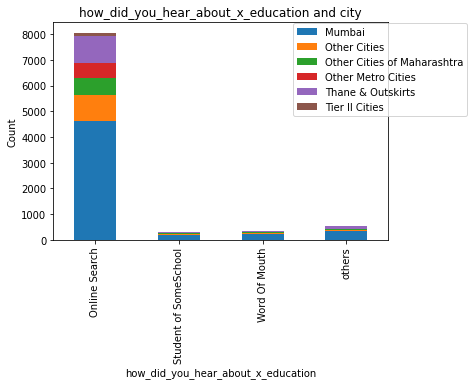

<Figure size 1800x1080 with 0 Axes>

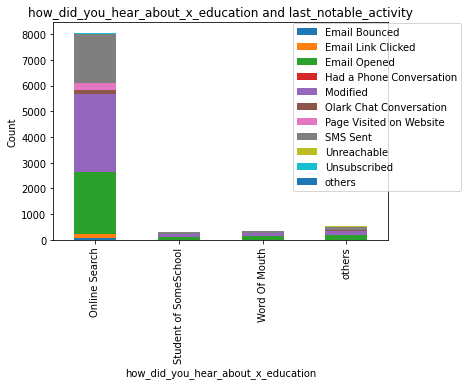

In [ ]:
for i in LS_cat.columns[5:]:
    tab = pd.crosstab(index=LS['how_did_you_hear_about_x_education'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('how_did_you_hear_about_x_education')
    plt.ylabel('Count')
    plt.title('how_did_you_hear_about_x_education and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()


**How did you hear about X Education: Maximum leads heard about X education through Word of Mouth, Student of some school and Online Search**
1.	what_is_your_current_occupation: Unemployed people look for online education
2.	tags: tagged as Would revert back after reading the mail, Ringing and highest in Others
3.	lead_quality:  assigned lead quality as Not Sure 
4.	lead_profile: assigned as Potential Lead and few as other leads 
5.	city: their city to be Mumbai.
6.	last_notable_activity: have Modified, opened Email or sent SMS


In [ ]:
LS_cat.columns

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city',
       'last_notable_activity'],
      dtype='object')

<Figure size 1800x1080 with 0 Axes>

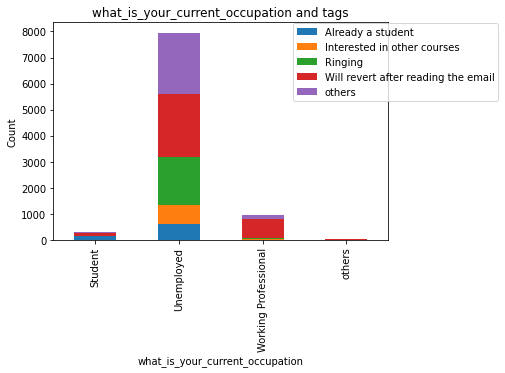

<Figure size 1800x1080 with 0 Axes>

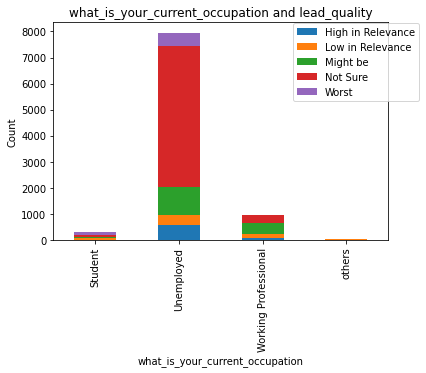

<Figure size 1800x1080 with 0 Axes>

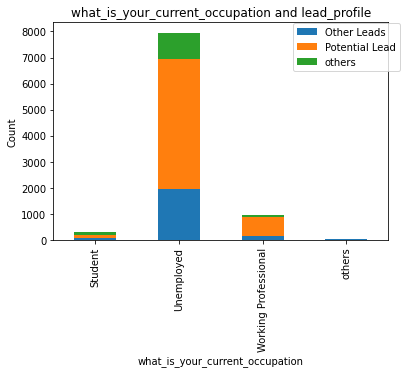

<Figure size 1800x1080 with 0 Axes>

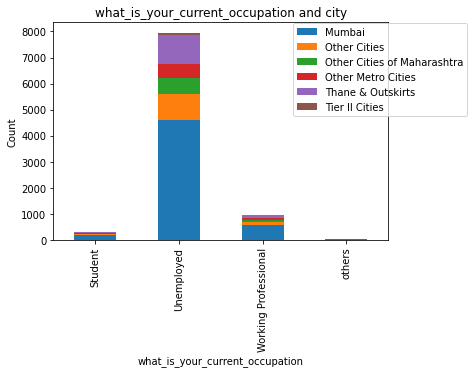

<Figure size 1800x1080 with 0 Axes>

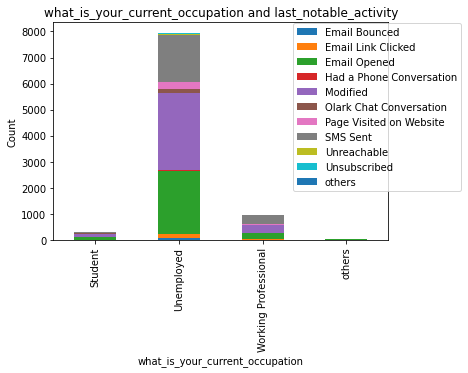

In [ ]:
for i in LS_cat.columns[6:]:
    tab = pd.crosstab(index=LS['what_is_your_current_occupation'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('what_is_your_current_occupation')
    plt.ylabel('Count')
    plt.title('what_is_your_current_occupation and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

**What is your current occupation? Majority are  unemployed**
1.	tags: tagged as Would revert back after reading the mail, Ringing and highest in Others
2.	lead_quality:  assigned lead quality as Not Sure 
3.	lead_profile: assigned as Potential Lead and few as other leads 
4.	city: their city to be Mumbai.
5.	last_notable_activity: have Modified, opened Email or sent SMS


<Figure size 1800x1080 with 0 Axes>

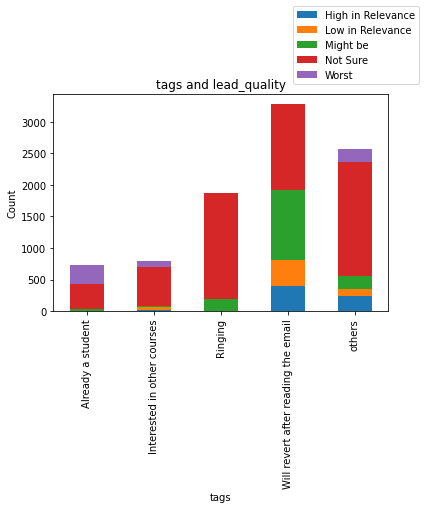

<Figure size 1800x1080 with 0 Axes>

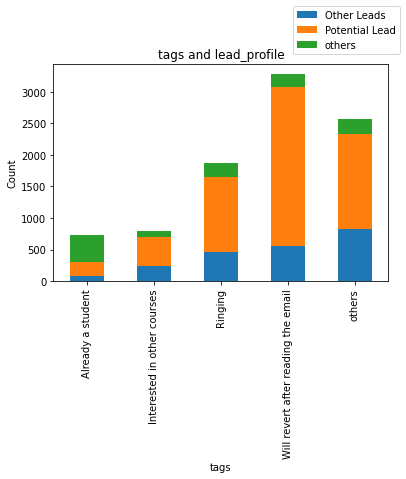

<Figure size 1800x1080 with 0 Axes>

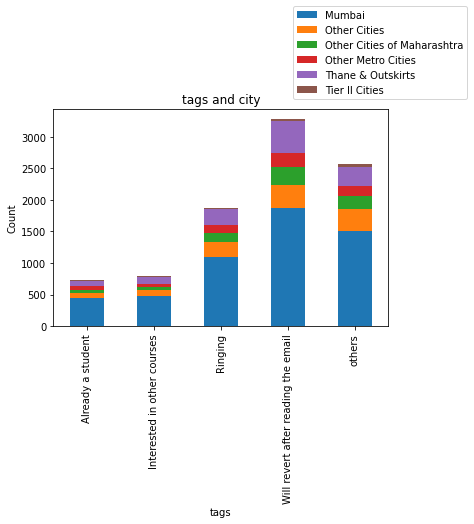

<Figure size 1800x1080 with 0 Axes>

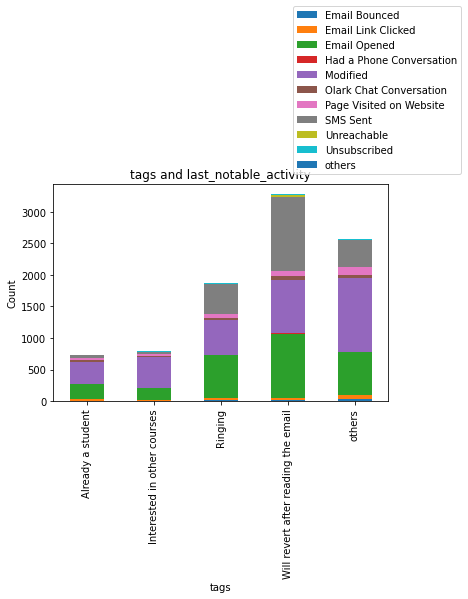

In [ ]:
for i in LS_cat.columns[7:]:
    tab = pd.crosstab(index=LS['tags'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('tags')
    plt.ylabel('Count')
    plt.title('tags and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

**Tags:  tagged as Would revert back after reading the mail Ringing and Others**
1.	lead_quality:  assigned lead quality as Not Sure 
2.	lead_profile: assigned as Potential Lead and few as other leads 
3.	city: their city to be Mumbai.
4.	last_notable_activity: have Modified, opened Email or sent SMS


<Figure size 1800x1080 with 0 Axes>

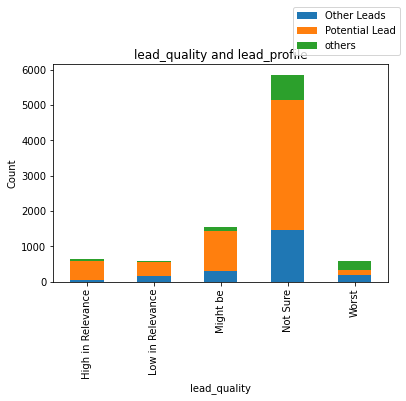

<Figure size 1800x1080 with 0 Axes>

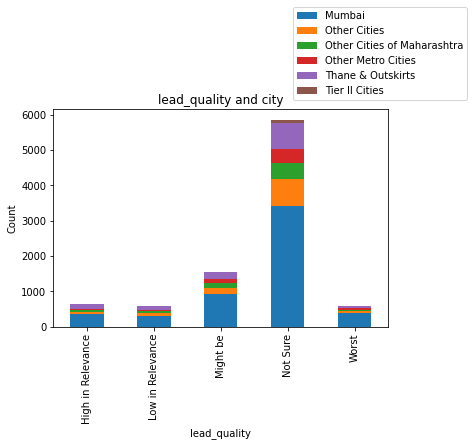

<Figure size 1800x1080 with 0 Axes>

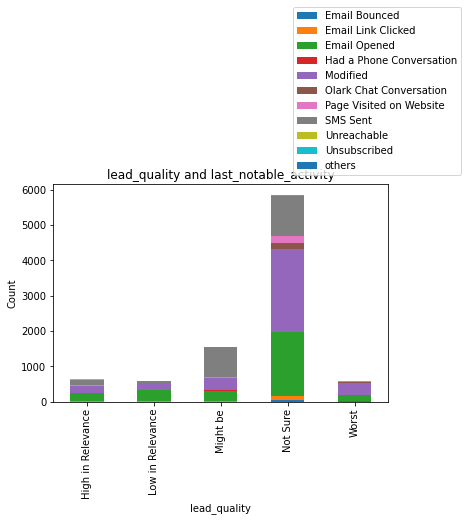

In [ ]:
for i in LS_cat.columns[8:]:
    tab = pd.crosstab(index=LS['lead_quality'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('lead_quality')
    plt.ylabel('Count')
    plt.title('lead_quality and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

**Lead Quality: maximum leads as assessed as Not sure**
1.	lead_profile: assigned as Potential Lead and few as other leads 
2.	city: their city to be Mumbai.
3.	last_notable_activity: have Modified, opened Email or sent SMS


<Figure size 1800x1080 with 0 Axes>

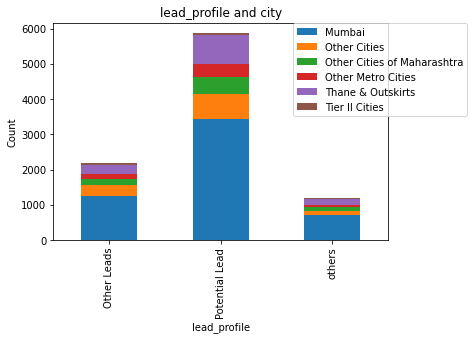

<Figure size 1800x1080 with 0 Axes>

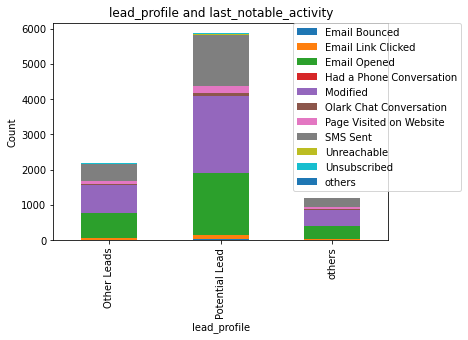

In [ ]:
for i in LS_cat.columns[9:]:
    tab = pd.crosstab(index=LS['lead_profile'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('lead_profile')
    plt.ylabel('Count')
    plt.title('lead_profile and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

**Lead Profile:  assigned as Potential Lead and few as other leads**
1.	city: their city to be Mumbai.
2.	last_notable_activity: have Modified, opened Email or sent SMS


In [ ]:
for i in LS_cat.columns[10:]:
    tab = pd.crosstab(index=LS['city'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('city')
    plt.ylabel('Count')
    plt.title('city and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

**Cities :  Max leads are from Mumbai**
1. last_notable_activity: have Modified, opened Email or sent SMS

# **Multivariate Analysis**

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot( x=LS_num['total_visits'],y=LS_num['total_time_spent_on_website'], hue =LS['converted'],orient='v')
plt.title('Total Time Spent Vs Total Visits based on Conversion')
plt.show()

Observation

From the above bar plot we can infer that:

The highest number of conversions happen when people are spending around 18 hours or above on the website

People who spent around 3 hours on the website didn't opt for any courses.

From the boxplot we can see better that the longer you stay on the website, the higher your chances of conversion as well.

Overall it is safe to say that the more time the user spends on the website, the better their chances of becoming a student.



In [ ]:

plt.subplots(figsize=(30,10))
sns.violinplot(x = LS_num['total_visits'], y=LS_num['page_views_per_visit'] , hue =LS['converted'] , split= True)
plt.show()

**1) The most  total visits on the website is 6.**

**2) Until total visits is 6,the conversion rate is higher when page views per visit is high.WHen total visits crosses 6,the conversion rate drops as total page views decreases.** 

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(LS1.corr(),annot=True)
plt.show()

1. Page_views_per_visit is highly correlated with total_visits.So we can drop anyone of them. Page_views_per_visit correlation with Converted is very low. It is not a good indicator for customers getting converted.So we are going to do ttest and verify whether this feature i significant or not.


In [ ]:
LS4=LS
LS4.drop(['asymmetrique_activity_score','asymmetrique_profile_score'],axis=1,inplace=True)

In [ ]:
sns.pairplot(LS4,diag_kind='kde',hue='converted')
plt.show()

**1) We infer that if total time spent on website is more,then total visits is also more.**


We need to do transformation as features are overlapping.

In [ ]:
def 
(dataframe) : 
    cor0=dataframe.corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)

    
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [ ]:
convertedCondition= LS1['converted']==1
print('Correlations for converted Leads')
correlation(LS1[convertedCondition])[1:30:2].style.background_gradient(cmap='GnBu').hide_index()



In [ ]:
#Correlations for un-Converted Leads 
unconvertedCondition=LS1['converted']==0
print('Correlations for Non-Converted Leads')
correlation(LS1[unconvertedCondition])[1:30:2].style.background_gradient(cmap='GnBu').hide_index()

In [ ]:
#Exporting CSV file
LS1.to_csv("LS1.xls")
from google.colab import files
files.download("LS1.xls")

# Statistics Test:

In [ ]:
import scipy.stats as stats

In [ ]:
LS2=pd.concat([LS_cat,LS['converted'],LS_num,LS['do_not_email'],LS['country'],LS['a_free_copy_of_mastering_the_interview'],LS['what_matters_most_to_you_in_choosing_a_course']],1)


In [ ]:
len(LS2.columns)

19

# Chi square for Lead origin and Converted

In [ ]:
cont = pd.crosstab(LS2["lead_origin"],LS2['converted'])
stats.chi2_contingency(cont)


(980.3478278524261,
 3.297968402797898e-212,
 3,
 array([[2200.30519481, 1379.69480519],
        [3002.98636364, 1883.01363636],
        [ 441.29025974,  276.70974026],
        [  34.41818182,   21.58181818]]))

# Chi square for Lead Source and Converted

In [ ]:

cont = pd.crosstab(LS2["lead_source"],LS2['converted'])
stats.chi2_contingency(cont)

(1041.4306080235256,
 6.4377126536389006e-223,
 5,
 array([[3070.59350649, 1925.40649351],
        [ 711.71883117,  446.28116883],
        [1077.41201299,  675.58798701],
        [ 280.26233766,  175.73766234],
        [ 441.29025974,  276.70974026],
        [  97.72305195,   61.27694805]]))

### Chi square for last activity and Converted

In [ ]:
cont = pd.crosstab(LS2["last_activity"],LS2['converted'])
stats.chi2_contingency(cont)

(1533.4325672563914, 0.0, 5, array([[ 263.05324675,  164.94675325],
        [2099.50909091, 1316.49090909],
        [ 597.4012987 ,  374.5987013 ],
        [ 390.2775974 ,  244.7224026 ],
        [1792.81850649, 1124.18149351],
        [ 535.94025974,  336.05974026]]))

## Chi square for last notable activity and Converted

In [ ]:
cont = pd.crosstab(LS2["last_notable_activity"],LS2['converted'])
stats.chi2_contingency(cont)

(1345.5796078359374,
 5.55895202495475e-283,
 10,
 array([[  36.87662338,   23.12337662],
        [ 106.3275974 ,   66.6724026 ],
        [1737.50357143, 1089.49642857],
        [   8.60454545,    5.39545455],
        [2093.9775974 , 1313.0224026 ],
        [ 112.4737013 ,   70.5262987 ],
        [ 195.4461039 ,  122.5538961 ],
        [1334.93376623,  837.06623377],
        [  19.66753247,   12.33246753],
        [  28.88668831,   18.11331169],
        [   4.30227273,    2.69772727]]))

## Chi square for specialization and Converted

In [ ]:
cont = pd.crosstab(LS2["specialization"],LS2['converted'])
stats.chi2_contingency(cont)

(24.24844922075495,
 0.003925326000894326,
 9,
 array([[ 330.04577922,  206.95422078],
        [ 369.38084416,  231.61915584],
        [  51.62727273,   32.37272727],
        [ 941.58311688,  590.41688312],
        [ 861.68376623,  540.31623377],
        [ 342.9525974 ,  215.0474026 ],
        [ 805.75422078,  505.24577922],
        [ 482.46915584,  302.53084416],
        [ 344.79642857,  216.20357143],
        [1148.70681818,  720.29318182]]))

## Chi square for how_did_you_hear_about_x_education and Converted

In [ ]:
cont = pd.crosstab(LS2['how_did_you_hear_about_x_education'],LS2['converted'])
stats.chi2_contingency(cont)

(13.052010909894562,
 0.004525468280084786,
 3,
 array([[4952.53051948, 3105.46948052],
        [ 190.52922078,  119.47077922],
        [ 213.88441558,  134.11558442],
        [ 322.05584416,  201.94415584]]))

## Chi square for what_is_your_current_occupation and Converted

In [ ]:
cont = pd.crosstab(LS2['what_is_your_current_occupation'],LS2['converted'])
stats.chi2_contingency(cont)

(527.9145078809921,
 4.2546452161316175e-114,
 3,
 array([[ 180.08084416,  112.91915584],
        [4888.61103896, 3065.38896104],
        [ 582.03603896,  364.96396104],
        [  28.27207792,   17.72792208]]))

## Chi square for tags and Converted

In [ ]:
cont = pd.crosstab(LS2["tags"],LS2['converted'])
stats.chi2_contingency(cont)

(2599.164708586438, 0.0, 4, array([[ 448.66558442,  281.33441558],
        [ 483.08376623,  302.91623377],
        [1151.16525974,  721.83474026],
        [2017.1512987 , 1264.8487013 ],
        [1578.93409091,  990.06590909]]))

## Chi square for lead quality and Converted

In [ ]:
cont = pd.crosstab(LS2["lead_quality"],LS2['converted'])
stats.chi2_contingency(cont)

(3225.6050029622493, 0.0, 4, array([[ 391.50681818,  245.49318182],
        [ 358.31785714,  224.68214286],
        [ 958.79220779,  601.20779221],
        [3601.00227273, 2257.99772727],
        [ 369.38084416,  231.61915584]]))

## Chi square for lead profile and Converted

In [ ]:
cont = pd.crosstab(LS2["lead_profile"],LS2['converted'])
stats.chi2_contingency(cont)

(183.53649186701506,
 1.3981609784024118e-40,
 2,
 array([[1338.00681818,  838.99318182],
        [3610.83603896, 2264.16396104],
        [ 730.15714286,  457.84285714]]))

## Chi square for city and Converted

In [ ]:
cont = pd.crosstab(LS2["city"],LS2['converted'])
stats.chi2_contingency(cont)

(7.5608684239161175,
 0.18215545393865212,
 5,
 array([[3314.59383117, 2078.40616883],
        [ 693.28051948,  434.71948052],
        [ 454.19707792,  284.80292208],
        [ 377.98538961,  237.01461039],
        [ 765.18993506,  479.81006494],
        [  73.75324675,   46.24675325]]))

In [ ]:
Cat=[]
for i in LS2.columns:
    if LS2[i].dtype=='object':
        Cat.append(i)
print(Cat)


['lead_origin', 'lead_source', 'last_activity', 'specialization', 'how_did_you_hear_about_x_education', 'what_is_your_current_occupation', 'tags', 'lead_quality', 'lead_profile', 'city', 'last_notable_activity', 'do_not_email', 'country', 'a_free_copy_of_mastering_the_interview', 'what_matters_most_to_you_in_choosing_a_course']


In [ ]:
LS3=LS2[Cat]
LS3

In [ ]:
import scipy.stats as stats
for col in LS3:
    cont = pd.crosstab(LS3[col],LS2['converted'])
    print(col, stats.chi2_contingency(cont)[1])
  


In [ ]:
stats.chi2_contingency(pd.crosstab([i],LS2['converted']))

# TTest on numerical features

In [ ]:
from scipy.stats import ttest_ind
LS0=LS2[LS2['converted']==0]
LS1=LS2[LS2['converted']==1]

for col in LS2.iloc[:, -3:]:
    print(col, ttest_ind(LS0[col], LS1[col])[1])

In [ ]:
sns.distplot(LS2['page_views_per_visit'])

In [ ]:
sns.distplot(LS2['total_time_spent_on_website'])

In [ ]:
sns.distplot(LS2['total_visits'])

In [ ]:
LS2.columns

In [ ]:
from scipy.stats import anderson
s=LS2.iloc[:,12:15]
print(s)
for i in s.columns:
    print(i," ",anderson(s[i]))

      total_visits  total_time_spent_on_website  page_views_per_visit
0              0.0                          0.0                  0.00
1              5.0                        674.0                  2.50
2              2.0                       1532.0                  2.00
3              1.0                        305.0                  1.00
4              2.0                       1428.0                  1.00
...            ...                          ...                   ...
9235           8.0                       1845.0                  2.67
9236           2.0                        238.0                  2.00
9237           2.0                        199.0                  2.00
9238           3.0                        499.0                  3.00
9239           6.0                       1279.0                  3.00

[9240 rows x 3 columns]
total_visits   AndersonResult(statistic=227.70211923769784, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_le

The hypotheses for the AD-test are:

H0: The data comes from a normal distribution.

H1: The data does not come from a normal distribution.

So with 5% signifinance level,we reject the null hypothesis because the test stats is greater than the critical value.Hence the data is not normal for numerical features.

# Transformation and Scaling:

In [ ]:
LS2.columns

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city', 'last_notable_activity',
       'converted', 'total_visits', 'total_time_spent_on_website',
       'page_views_per_visit', 'do_not_email', 'country',
       'a_free_copy_of_mastering_the_interview',
       'what_matters_most_to_you_in_choosing_a_course'],
      dtype='object')

In [ ]:
LS2.shape

(9240, 19)

In [ ]:
LS=LS2.drop(['converted'],1)

In [ ]:
LS_num=LS.select_dtypes(include=np.number)

In [ ]:
LS_num.columns
LS_num.skew()


total_visits                   0.746427
total_time_spent_on_website    0.956450
page_views_per_visit           0.323787
dtype: float64

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
LS_num_pt=pd.DataFrame(pt.fit_transform(LS_num),columns=LS_num.columns)
LS_num_pt


total_visits  total_time_spent_on_website  page_views_per_visit
0        -1.447852                    -1.473767             -1.460157
1         0.812110                     0.729628              0.337853
2        -0.216838                     1.306093              0.046968
3        -0.721778                     0.264936             -0.613575
4        -0.216838                     1.252499             -0.613575
...            ...                          ...                   ...
9235      1.527680                     1.451936              0.432250
9236     -0.216838                     0.135767              0.046968
9237     -0.216838                     0.046959              0.046968
9238      0.182937                     0.543662              0.609816
9239      1.073368                     1.170162              0.609816

[9240 rows x 3 columns]

In [ ]:
LS_num_pt.skew()


total_visits                  -0.082398
total_time_spent_on_website   -0.304689
page_views_per_visit          -0.117414
dtype: float64

In [ ]:
LS_cat=LS.select_dtypes(exclude=np.number)

In [ ]:
LS1=pd.concat([LS_num_pt,LS_cat,LS2['converted']],axis=1)
LS1.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city', 'last_notable_activity',
       'do_not_email', 'country', 'a_free_copy_of_mastering_the_interview',
       'what_matters_most_to_you_in_choosing_a_course', 'converted'],
      dtype='object')

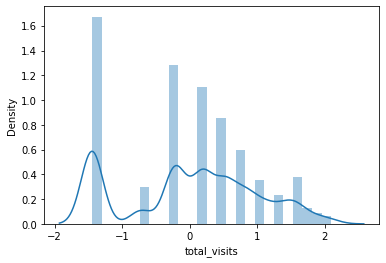

In [ ]:
sns.distplot(LS1['total_visits'])

   Pairplot of Numerical features with target variable  


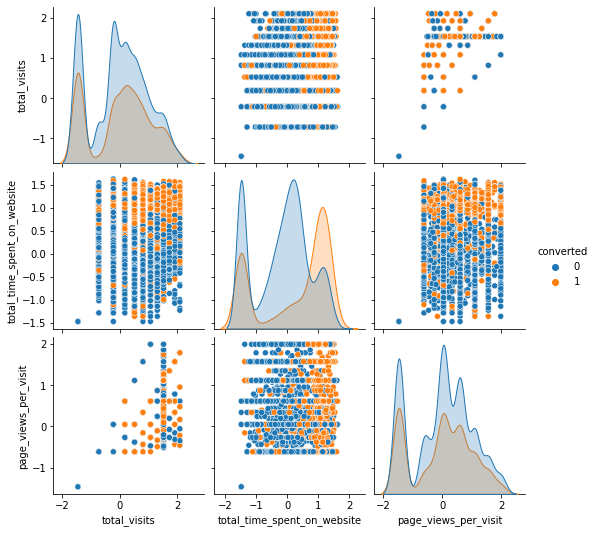

In [ ]:
print("   Pairplot of Numerical features with target variable  ")
#plt.figure(figsize=(30,15))
sns.pairplot(LS1,hue='converted')
plt.show()

In [ ]:
Cat=[]
for i in LS1.columns:
    if LS1[i].dtype=='object':
        Cat.append(i)
df1=LS1
df1=pd.get_dummies(data=df1,drop_first=True)


In [ ]:
df1.shape

(9240, 61)

In [ ]:
df1.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'converted', 'lead_origin_Landing Page Submission',
       'lead_origin_Lead Add Form', 'lead_origin_others', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Reference', 'lead_source_others',
       'last_activity_Email Opened', 'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'last_activity_others', 'specialization_Business Administration',
       'specialization_E-Business', 'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Operations Management',
       'specialization_Supply Chain Management', 'specialization_others',
       'how_did_you_hear_about_x_education_Student of SomeSchool',
       'how_did_you_hear_about_x_ed

In [ ]:
df1.isna().sum()

total_visits                                                               0
total_time_spent_on_website                                                0
page_views_per_visit                                                       0
converted                                                                  0
lead_origin_Landing Page Submission                                        0
                                                                          ..
last_notable_activity_others                                               0
do_not_email_Yes                                                           0
country_Non Indian                                                         0
a_free_copy_of_mastering_the_interview_Yes                                 0
what_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience    0
Length: 61, dtype: int64

# Separating target and independent variables

In [ ]:
x=df1.drop(['converted'],axis=1)
y=df1['converted']
x.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_others', 'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Reference',
       'lead_source_others', 'last_activity_Email Opened',
       'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'last_activity_others', 'specialization_Business Administration',
       'specialization_E-Business', 'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Operations Management',
       'specialization_Supply Chain Management', 'specialization_others',
       'how_did_you_hear_about_x_education_Student of SomeSchool',
       'how_did_you_hear_about_x_education_Word 

# Splitting the data into train_test

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

## **Base Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold
LR=LogisticRegression()
model1=LR.fit(xtrain,ytrain)
model1


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(LR,x,y,cv=kf,scoring='roc_auc')
print("bias error:",(1-np.mean(score)),"variance error:",np.std(score,ddof=1))

bias error: 0.0664553467247917 variance error: 0.0029123864890076034


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_predicted=LR.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Logistic Regression base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Logistic Regression base model= 87.77056277056276


array([[1552,  130],
       [ 209,  881]])

In [ ]:
NB=GaussianNB()
model3=NB.fit(xtrain,ytrain)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_predicted=NB.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Naive Bayes base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Naive Bayes base model= 81.0966810966811


array([[1439,  243],
       [ 281,  809]])

In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(NB,x,y,cv=kf,scoring='roc_auc')
print("bias error:",(1-np.mean(score)),"variance error:",np.std(score,ddof=1))

bias error: 0.12982003364426764 variance error: 0.006986148349882503


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
model4=dt.fit(xtrain,ytrain)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_predicted=dt.predict(xtest)
acc=accuracy_score(ytest,y_predicted)
print("Accuracy of Decission Tree base model=",acc*100)
cm=confusion_matrix(ytest,y_predicted)
cm

Accuracy of Decission Tree base model= 84.88455988455989


array([[1475,  207],
       [ 212,  878]])

In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(dt,x,y,cv=kf,scoring='roc_auc')
print("bias error:",(1-np.mean(score)),"variance error:",np.std(score,ddof=1))

bias error: 0.15288428625230954 variance error: 0.013686796370829838


Transformation and Scaling done on numerical variable and skewness reduced to total_visits                  -0.082398

total_time_spent_on_website   -0.304689

page_views_per_visit          -0.117414


We split the model into 70:30 ratio.

After fitting the data into different models ,we got the highest accuracy for Logistic Regression with 87%

For Naive Bayes ,the accuracy score is 81%

For Decision Tree model ,the accuracy is 85%



In [ ]:
u=[87,82,86]
#b=pd.concat(a)
l=['LogisticRegression','GaussianNB','DecisionTree']
h=pd.DataFrame(data=u,index=l,columns=['Accuracy'])
h

Accuracy
LogisticRegression        87
GaussianNB                82
DecisionTree              86

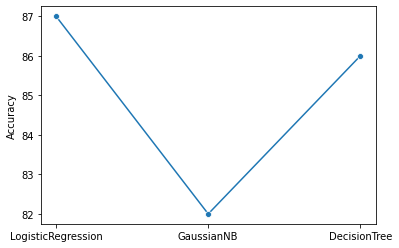

In [ ]:
sns.lineplot(y=h['Accuracy'],x=h.index,marker='o')
plt.show()

In [ ]:
BE=[0.06971378025644392,0.12647517678497588,0.15343311294270046]
VE=[0.0050639719710028445,0.0057819258576719615,0.012268556938324416]
l

['LogisticRegression', 'GaussianNB', 'DecisionTree']

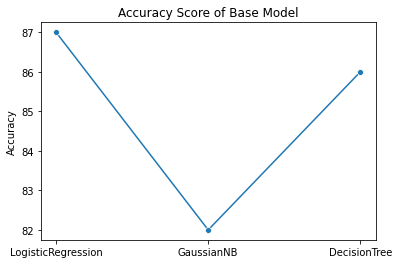

In [ ]:
d={'Accuracy':[87,82,86],'BE':[0.06971378025644392,0.12647517678497588,0.15343311294270046],'VE':[0.0050639719710028445,0.0057819258576719615,0.012268556938324416]}
R=pd.DataFrame(d,index=l)
R
sns.lineplot(y=R['Accuracy'],x=R.index,marker='o')
plt.title("Accuracy Score of Base Model")
plt.show()

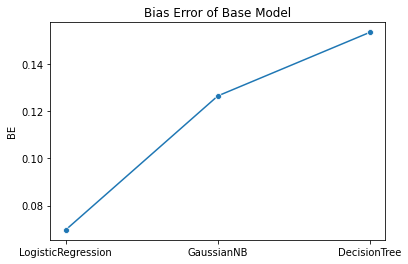

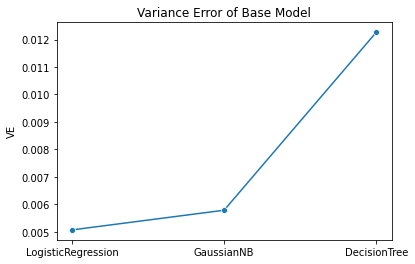

In [ ]:
sns.lineplot(y=R['BE'],x=R.index,marker='o')
plt.title("Bias Error of Base Model")
plt.show()
sns.lineplot(y=R['VE'],x=R.index,marker='o')
plt.title("Variance Error of Base Model")
plt.show()

In [ ]:
#Exporting CSV file
LS2.to_csv("LS2.xls")
from google.colab import files
files.download("LS2.xls")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>